<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [127]:
%matplotlib inline
import matplotlib
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import statistics
from itertools import takewhile
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community.quality import partition_quality
from networkx.algorithms.community import is_partition
import time

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [128]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=9
random.seed(seedno)
graphs=[]
for i in range(0,100):
    REG = nx.watts_strogatz_graph(n,d,0,seedno)
    if(nx.is_connected(REG)==True):
        graphs.append(REG)
        break
for i in range(0,100):
    RGER = nx.gnm_random_graph(n,M,seedno)
    if(nx.is_connected(RGER)==True):
        graphs.append(RGER)
        break
for i in range(0,100):
    RG_Gilbert=nx.gnp_random_graph(n,p,seedno)
    if(nx.is_connected(RG_Gilbert)==True):
        graphs.append(RG_Gilbert)
        break
for i in range(0,100):
    RGG = nx.random_geometric_graph(n,R,dim=2,pos=None,p=2,seed=seedno)
    if(nx.is_connected(RGG)==True):
        graphs.append(RGG)
        break
for i in range(0,100):
    SF=nx.barabasi_albert_graph(n,k,seedno)
    if(nx.is_connected(SF)==True):
        graphs.append(SF)
        break
for i in range(0,100):
    SW =nx.watts_strogatz_graph(n,d,p,seedno)
    if(nx.is_connected(SW)==True):
        graphs.append(SW)
        break
        

<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [129]:
#football network
football=nx.read_gml("football.gml")
graphs.append(football)

In [130]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1
graphs.append(got)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

In [131]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
eu.remove_edges_from(nx.selfloop_edges(eu))
nodes_left = max(nx.connected_components(eu), key=len)
b= nx.subgraph(eu,nodes_left)
eu_graph= nx.Graph()
eu_graph.add_nodes_from(b)
eu_graph.add_edges_from(b.edges)
names=["REG","RGER","RG_Gilbert","RGG","SF","SW","football","got","eu_graph"]
graphs.append(eu_graph)

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

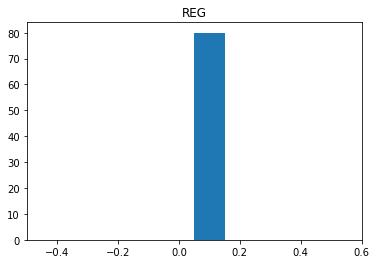

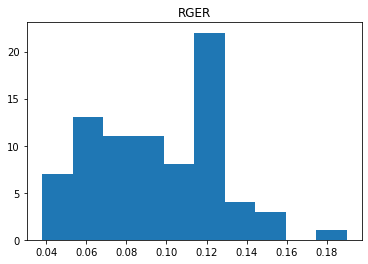

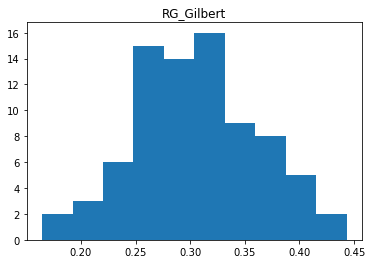

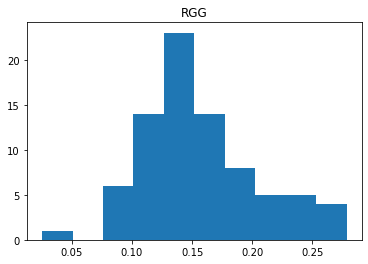

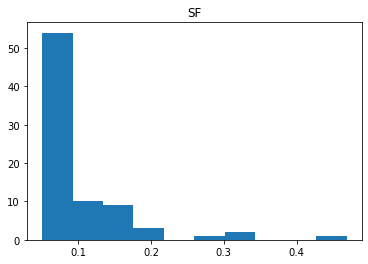

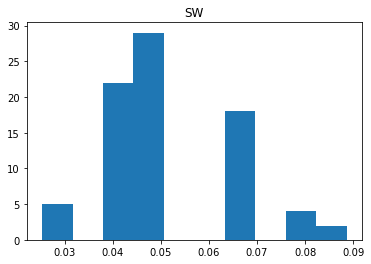

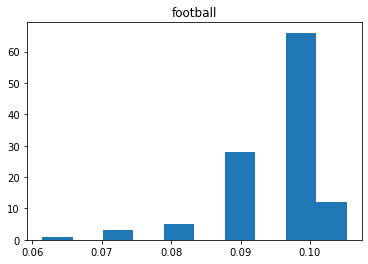

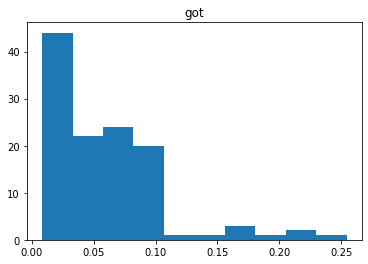

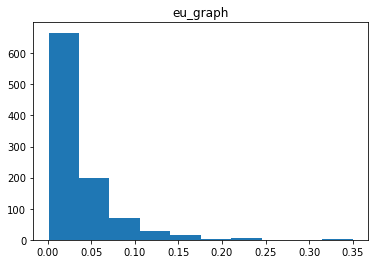

REG  mean degree centrality : 0.05063291139240506 

REG variance of degree centrality : 0.0 

RGER  mean degree centrality : 0.0949367088607595 

RGER variance of degree centrality : 0.0009167631769494908 

RG_Gilbert  mean degree centrality : 0.3031645569620253 

RG_Gilbert variance of degree centrality : 0.0032731690596484253 

RGG  mean degree centrality : 0.15 

RGG variance of degree centrality : 0.002308539486734315 

SF  mean degree centrality : 0.09620253164556962 

SF variance of degree centrality : 0.004943219501905528 

SW  mean degree centrality : 0.05063291139240506 

SW variance of degree centrality : 0.0001906542890116198 

football  mean degree centrality : 0.0935163996948894 

football variance of degree centrality : 6.059483420234448e-05 

got  mean degree centrality : 0.05640222190571144 

got variance of degree centrality : 0.00224881435637275 

eu_graph  mean degree centrality : 0.03308038426292975 

eu_graph variance of degree centrality : 0.0014143932683829388 



In [132]:
def find_degree(G):
    return nx.degree_centrality(G)
dc=[]
for i in range(0,len(names)):
    dc.append(find_degree(graphs[i]))
for i in range(0,len(names)):
    plt.title(names[i])
    plt.hist(dc[i].values())
    plt.show()
    
for i in range(0,len(names)):
    a=statistics.mean(dc[i].values())
    b=statistics.variance(dc[i].values())
    print(names[i]," mean degree centrality :",a,"\n")
    print(names[i],"variance of degree centrality :",b,"\n")

#### Όπως παρατηρούμε για τις συνθετικές τοπολογίες παίρνουμε τ' αποτελέσματα που περιμέναμε. Δηλαδή οι κατανομές γι' αυτές τις τοπολογίες είναι ίδιες με την πρώτη εργαστηριακή άσκηση. Ωστόσο μπορούμε να προσδιορίσουμε και τον τύπο δικτύου για τις πραγματικές τοπολογίες μέσω αυτών. Παρατηρούμε σχετικά με την τοπολογία football πως ο βαθμός κόμβου ακολουθεί κατανομή heavy tail. Ενώ στις τοπολογίες got και eu ο βαθμός κόμβου ακολουθεί κατανομή power law.

#### Σε σχέση με τις μέσες τιμές των κατανομών βαθμού κόμβου παρατηρούμε πως με αύξουσα σειρά θα ισχύει:

####      eu,REG,SW,got,football,RGER,SF,RGG,RG_Gilbert

#### Σε σχέση με τις τιμές της διασποράς των κατανομών βαθμού κόμβου παρατηρούμε πως με αύξουσα σειρά θα ισχύει:

####      REG,football,SW,RGER,eu_graph,got,RGG,RG_Gilbert,SF

#### Το γεγονός όμως πως το μέγεθος ορισμένων γράφων είναι πολύ μεγάλο σημαίνει πως δεν μπορούμε να βγάλουμε κάποιο ασφαλές συμπέρασμα στη σύγκριση μεταξύ συνθετικών και πραγματικών τοπολογιών παρά μόνο να ταυτοποιήσουμε τα πραγματικά δίκτυα και να έχουμε μια γενική ιδέα για το αποτέλεσμα διαφόρων μετρικών.

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

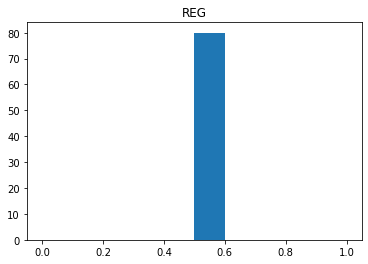

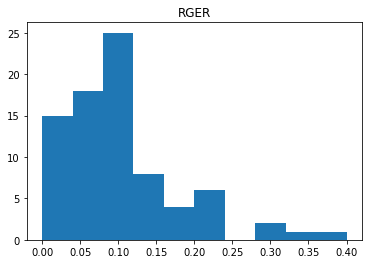

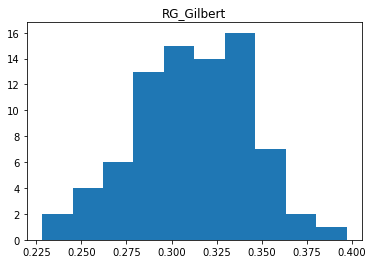

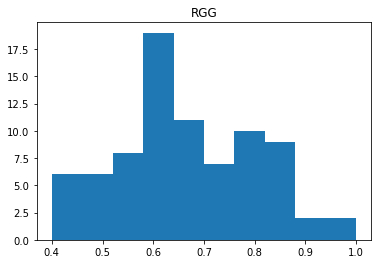

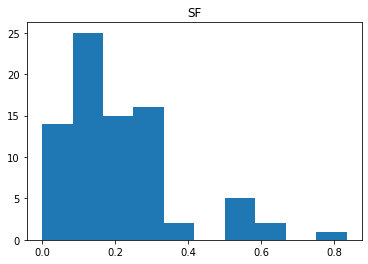

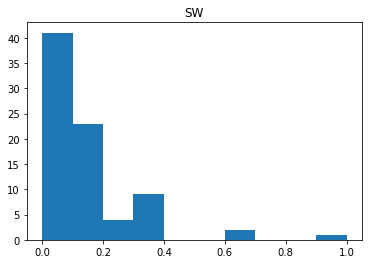

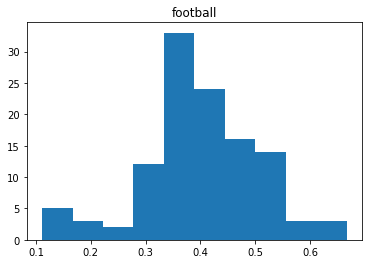

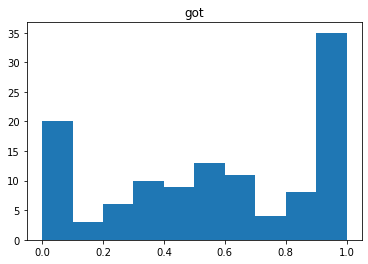

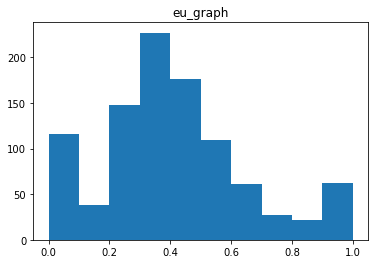

REG  mean correlation coefficient : 0.5 

REG correlation coefficient variance : 0.0 

RGER  mean correlation coefficient : 0.10068181818181818 

RGER correlation coefficient variance : 0.006289864097661785 

RG_Gilbert  mean correlation coefficient : 0.31174607162757645 

RG_Gilbert correlation coefficient variance : 0.0010662690971627142 

RGG  mean correlation coefficient : 0.6679021129369427 

RGG correlation coefficient variance : 0.01933262310962197 

SF  mean correlation coefficient : 0.21356992984166898 

SF correlation coefficient variance : 0.026959716957001646 

SW  mean correlation coefficient : 0.12089285714285714 

SW correlation coefficient variance : 0.030905877751944658 

football  mean correlation coefficient : 0.403216011042098 

football correlation coefficient variance : 0.010861949981582063 

got  mean correlation coefficient : 0.5744036387164707 

got correlation coefficient variance : 0.1271797973864082 

eu_graph  mean correlation coefficient : 0.40705044751953

In [133]:
def cc(G):
    return nx.clustering(G)

cco=[]
for i in range(0,len(names)):
    cco.append(cc(graphs[i]))
for i in range(0,len(names)):
    plt.title(names[i])
    plt.hist(cco[i].values())
    plt.show()
    
for i in range(0,len(names)):
    a=statistics.mean(cco[i].values())
    b=statistics.variance(cco[i].values())
    print(names[i]," mean correlation coefficient :",a,"\n")
    print(names[i],"correlation coefficient variance :",b,"\n")

#### Σε σχέση με τις μέσες τιμές των κατανομών των συντελεστών συσχέτισης έχουμε σε αύξουσα σειρά:

#### RGER,SW,SF,RG_Gilbert,football,eu,REG,got,RGG

#### Αντίστοιχα για τις διασπορές των παραπάνω κατανομών θα έχουμε σε αύξουσα σειρά:

#### REG,RG_Gilbert,RGER,football,RGG,SF,SW,eu,got

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

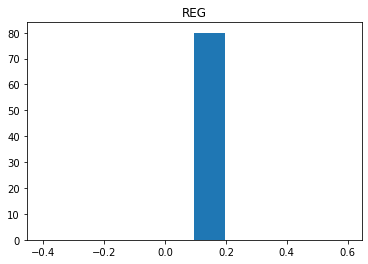

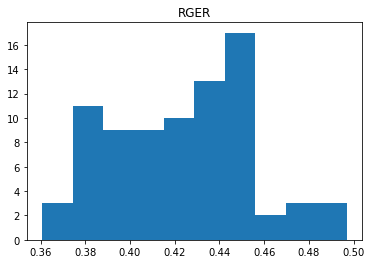

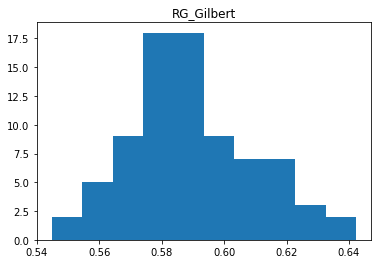

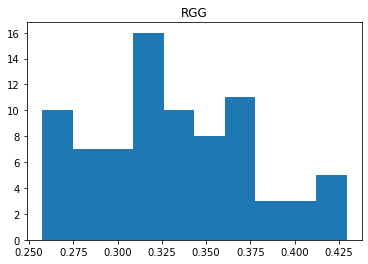

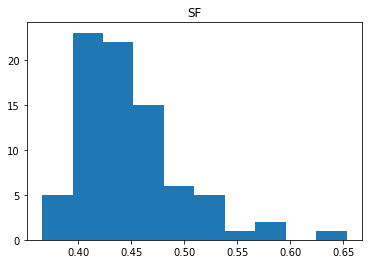

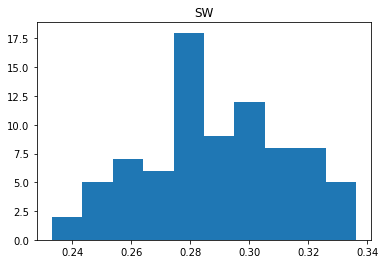

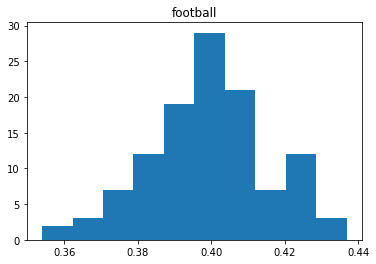

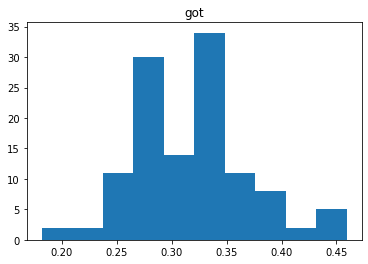

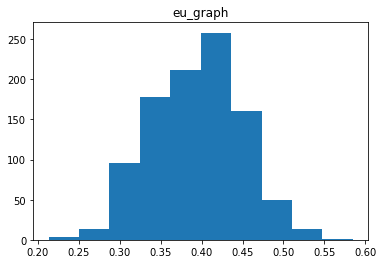

REG  mean closeness centrality : 0.09634146341463415 

REG variance of closeness centrality : 0.0 

RGER  mean closeness centrality : 0.4230665863229843 

RGER variance of closeness centrality : 0.0009830331997958347 

RG_Gilbert  mean closeness centrality : 0.59000201026405 

RG_Gilbert variance of closeness centrality : 0.00040526854190084947 

RGG  mean closeness centrality : 0.3321710918309225 

RGG variance of closeness centrality : 0.001911023905034126 

SF  mean closeness centrality : 0.44699529138082167 

SF variance of closeness centrality : 0.002454923069539148 

SW  mean closeness centrality : 0.28874892346770015 

SW variance of closeness centrality : 0.0005955893570631817 

football  mean closeness centrality : 0.39931907825186225 

football variance of closeness centrality : 0.00024832468671753176 

got  mean closeness centrality : 0.3190517048314076 

got variance of closeness centrality : 0.002675571500211715 

eu_graph  mean closeness centrality : 0.3944640412086963 



In [134]:
def find_closeness(G):
    return nx.closeness_centrality(G)

cce=[]

for i in range(0,len(names)):
    cce.append(find_closeness(graphs[i]))

for i in range(0,len(names)):
    plt.title(names[i])
    plt.hist(cce[i].values())
    plt.show()

for i in range(0,len(names)):
    c=statistics.mean(cce[i].values())
    d=statistics.variance(cce[i].values())
    print(names[i]," mean closeness centrality :",c,"\n")
    print(names[i],"variance of closeness centrality :",d,"\n")

#### Σε σχέση με τις μέσες τιμές των κατανομών εγγύτητας θα έχουμε σ' αύξουσα σειρά:

#### REG,SW,got,RGG,eu,football,RGER,SF,RG_Gilbert

#### Ακόμα σε σχέση με τις τιμές τις διασποράς σε κάθε μια από τις παραπάνω περιπτώσεις θα έχουμε σ' αύξουσα σειρά:

#### REG,football,RG_Gilbert,SW,RGER,SF,got,eu,RGG

###  Οπτικοποίηση Γράφων

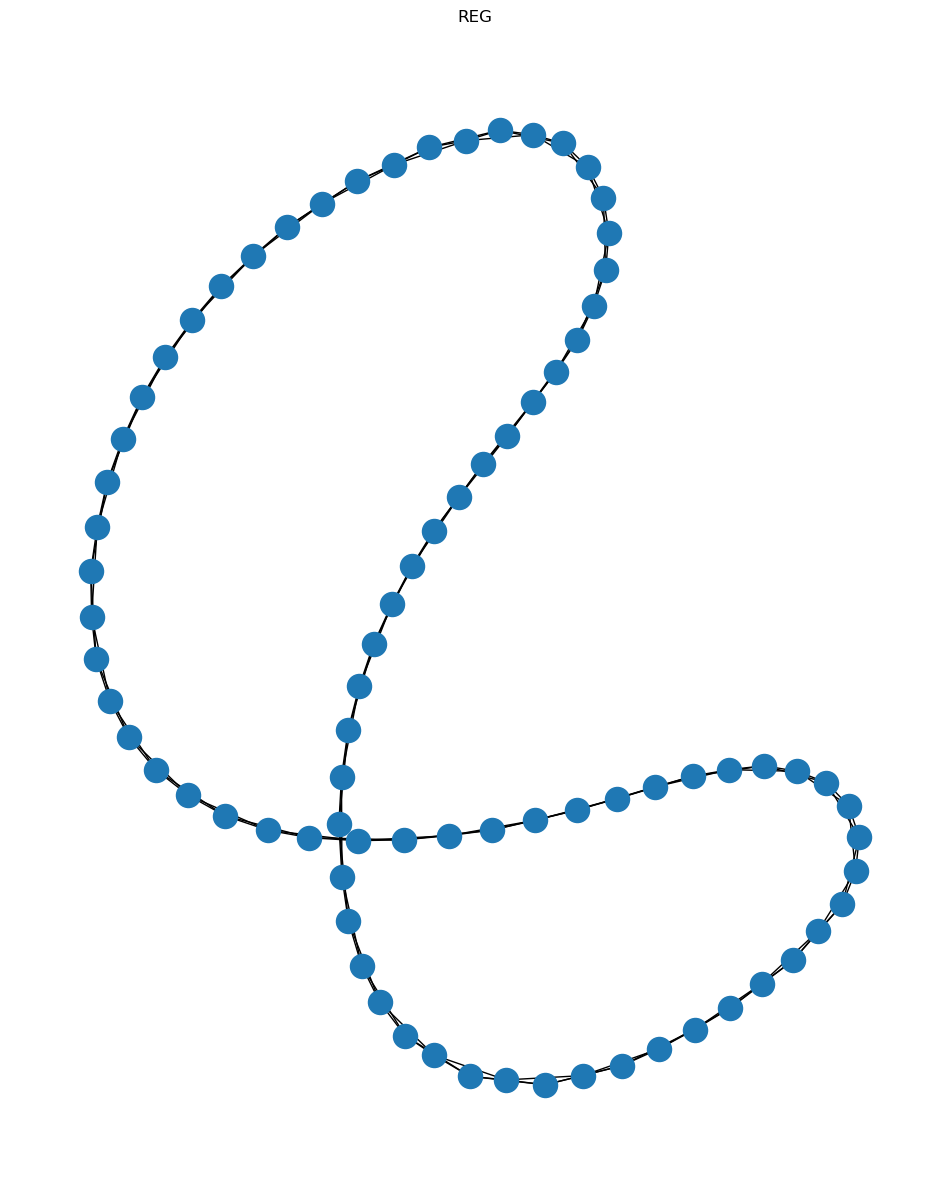

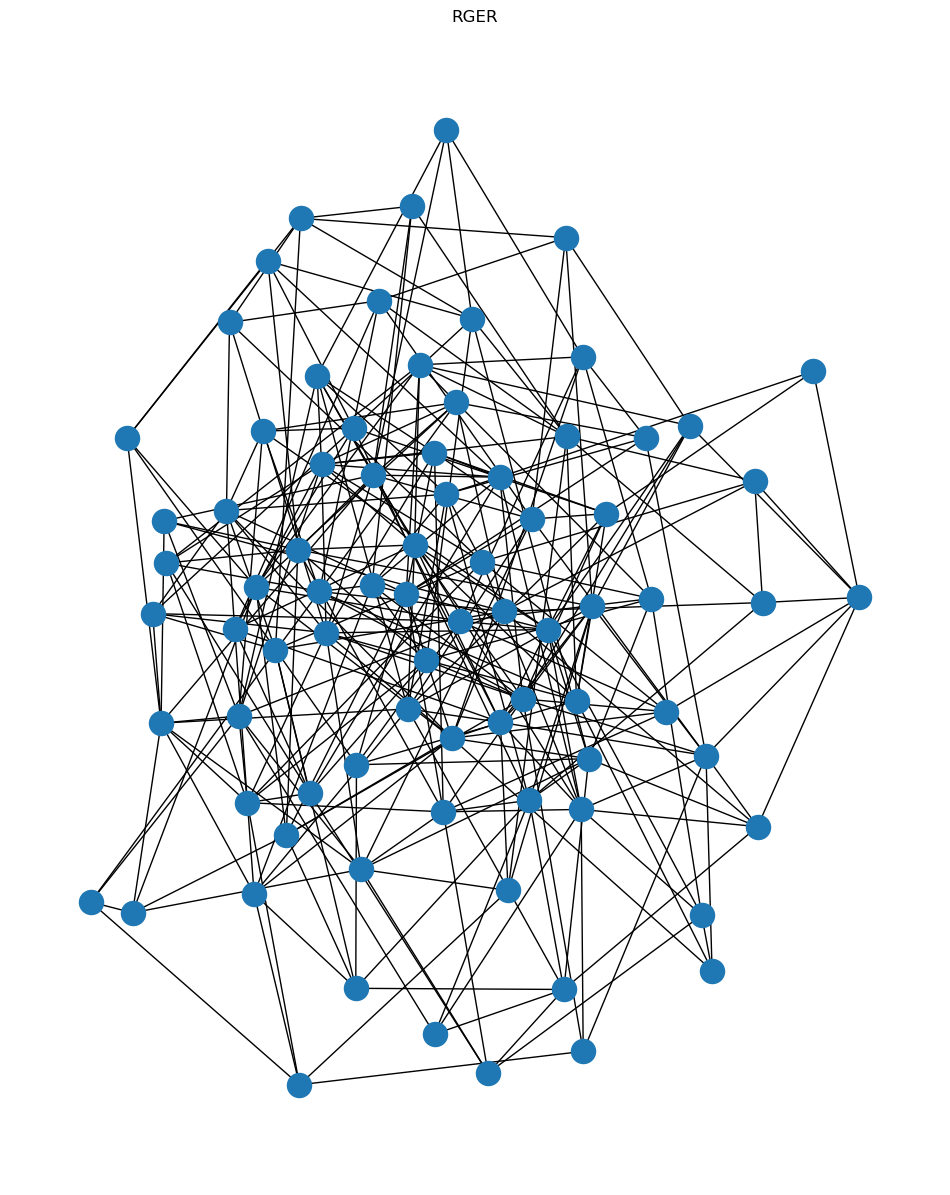

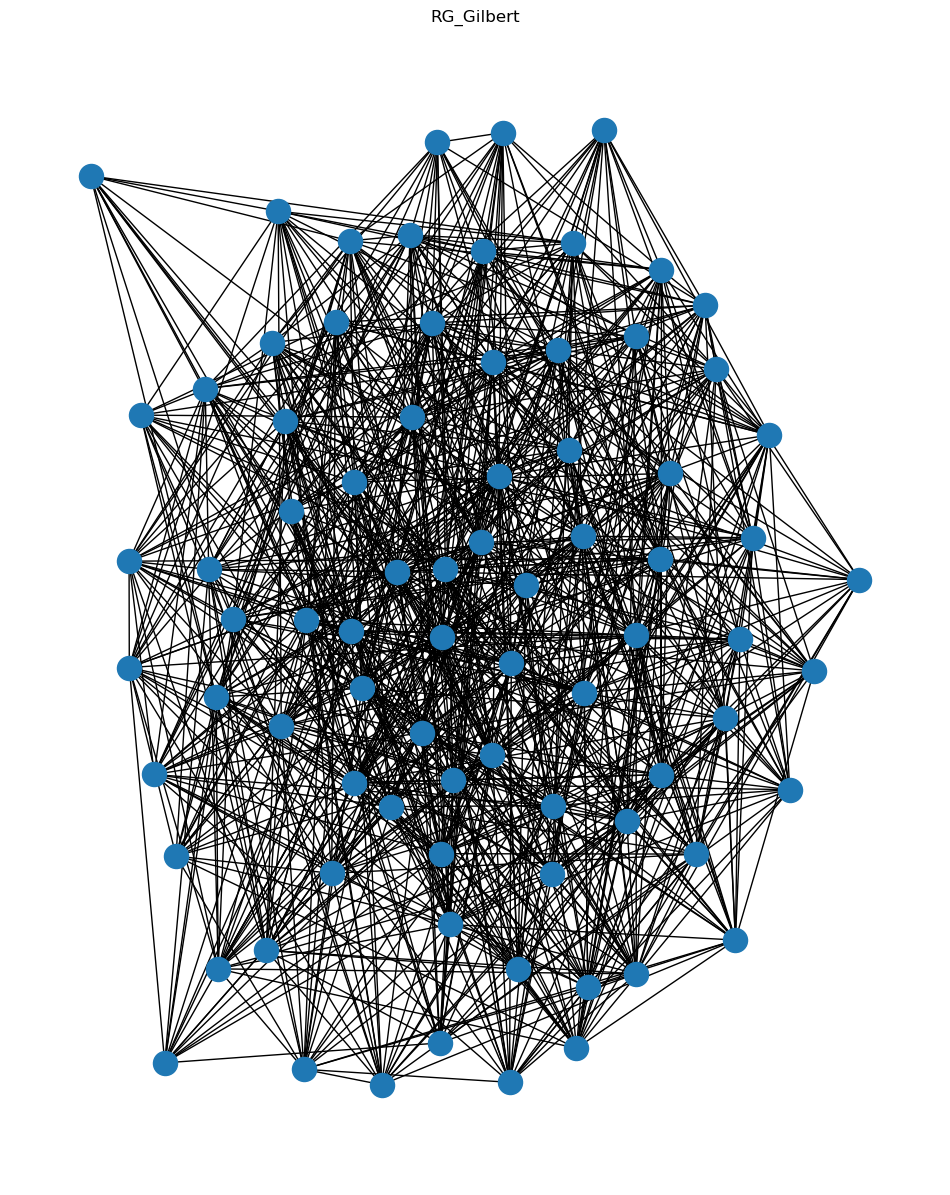

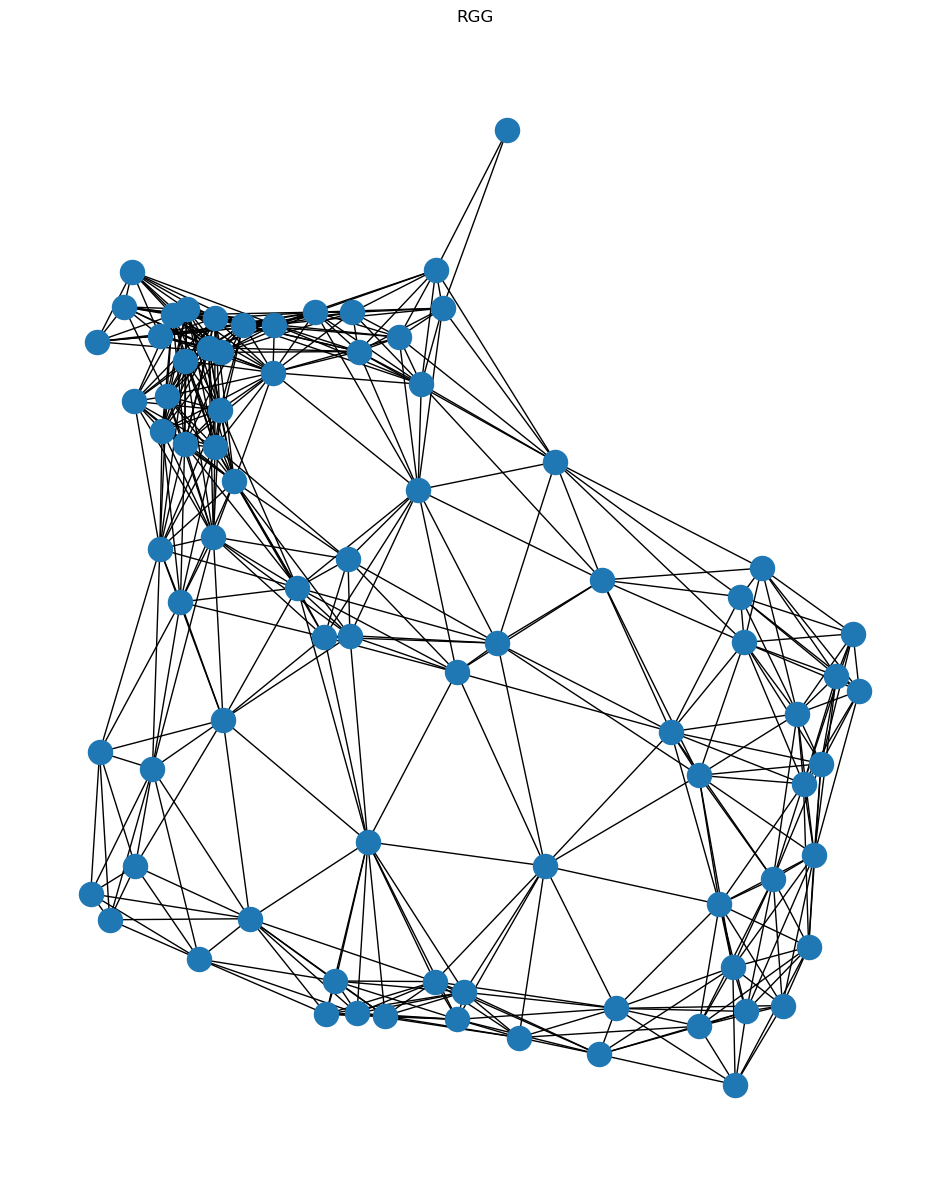

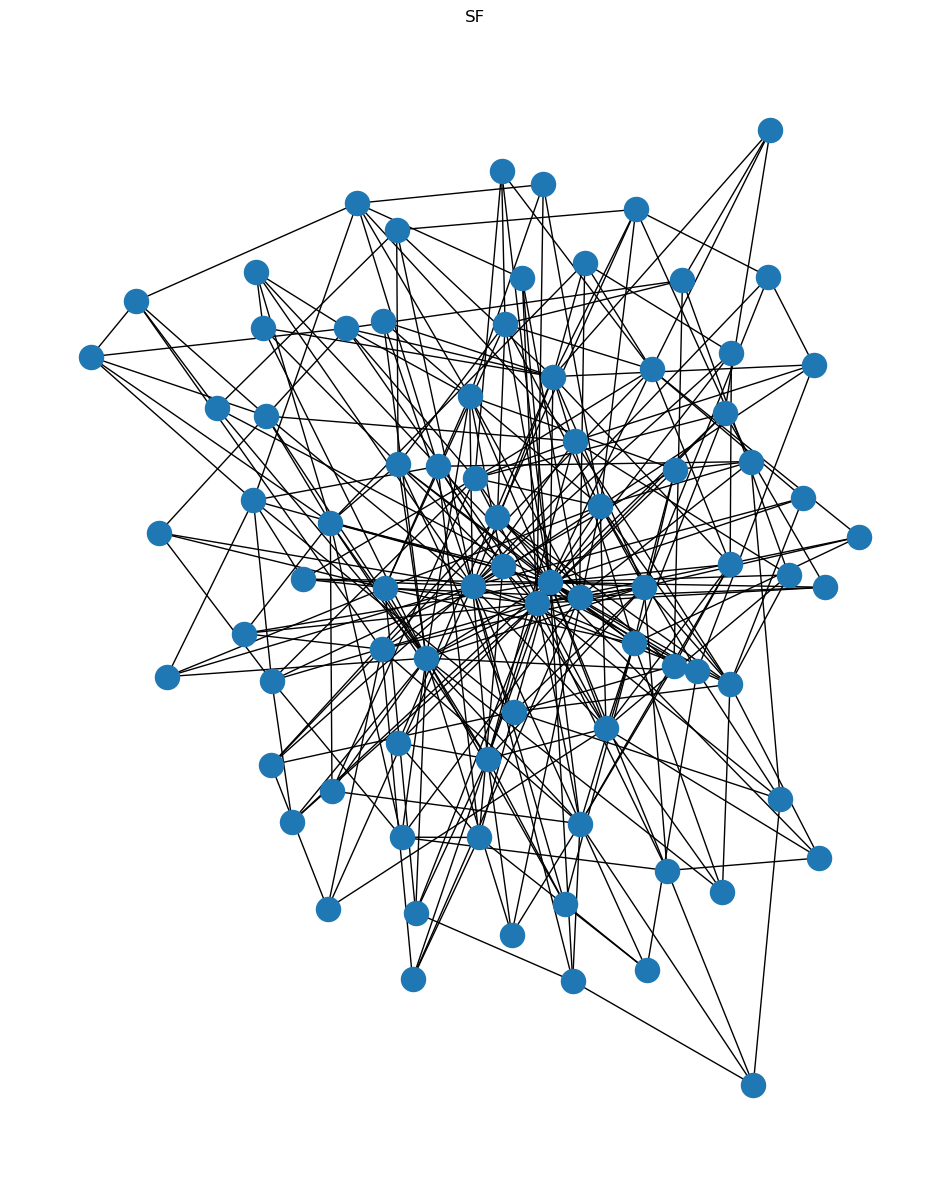

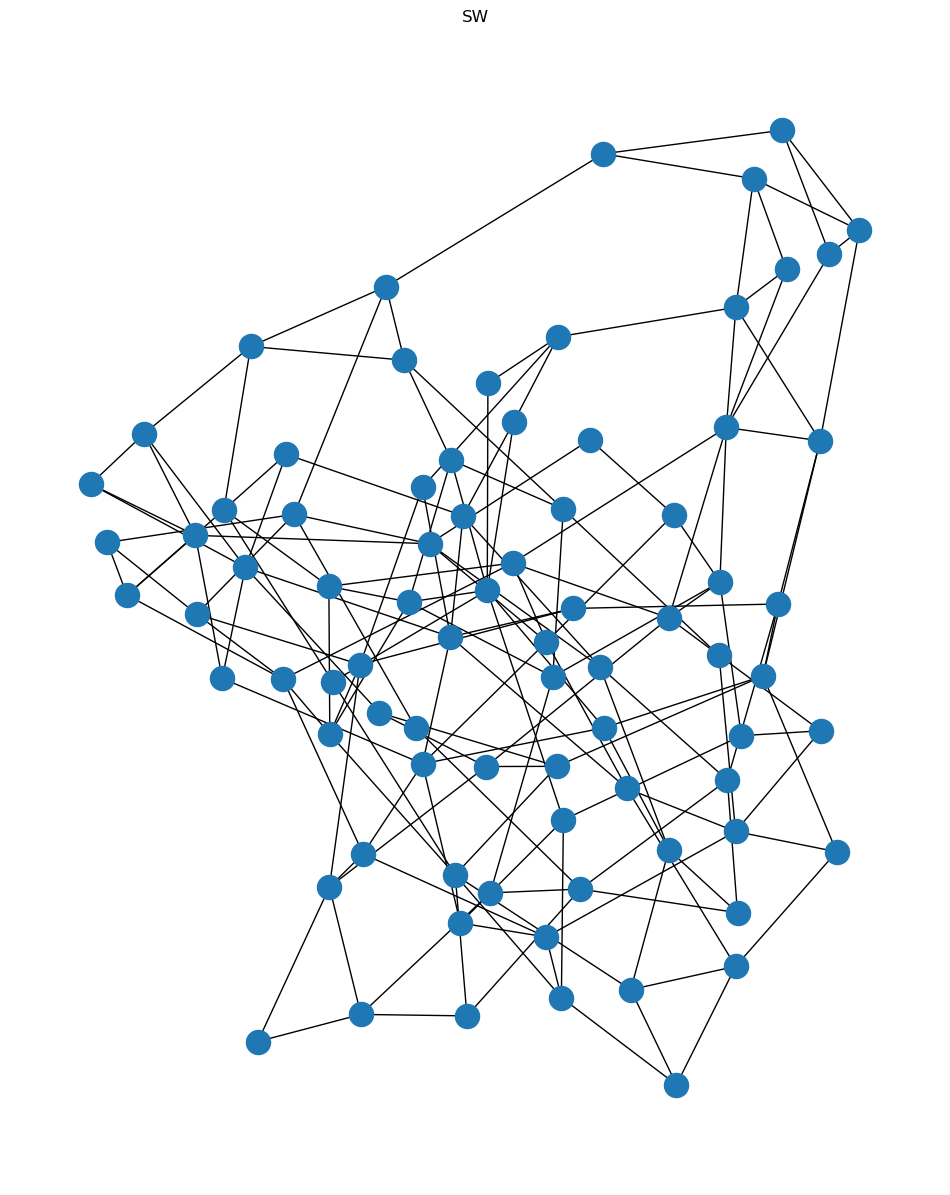

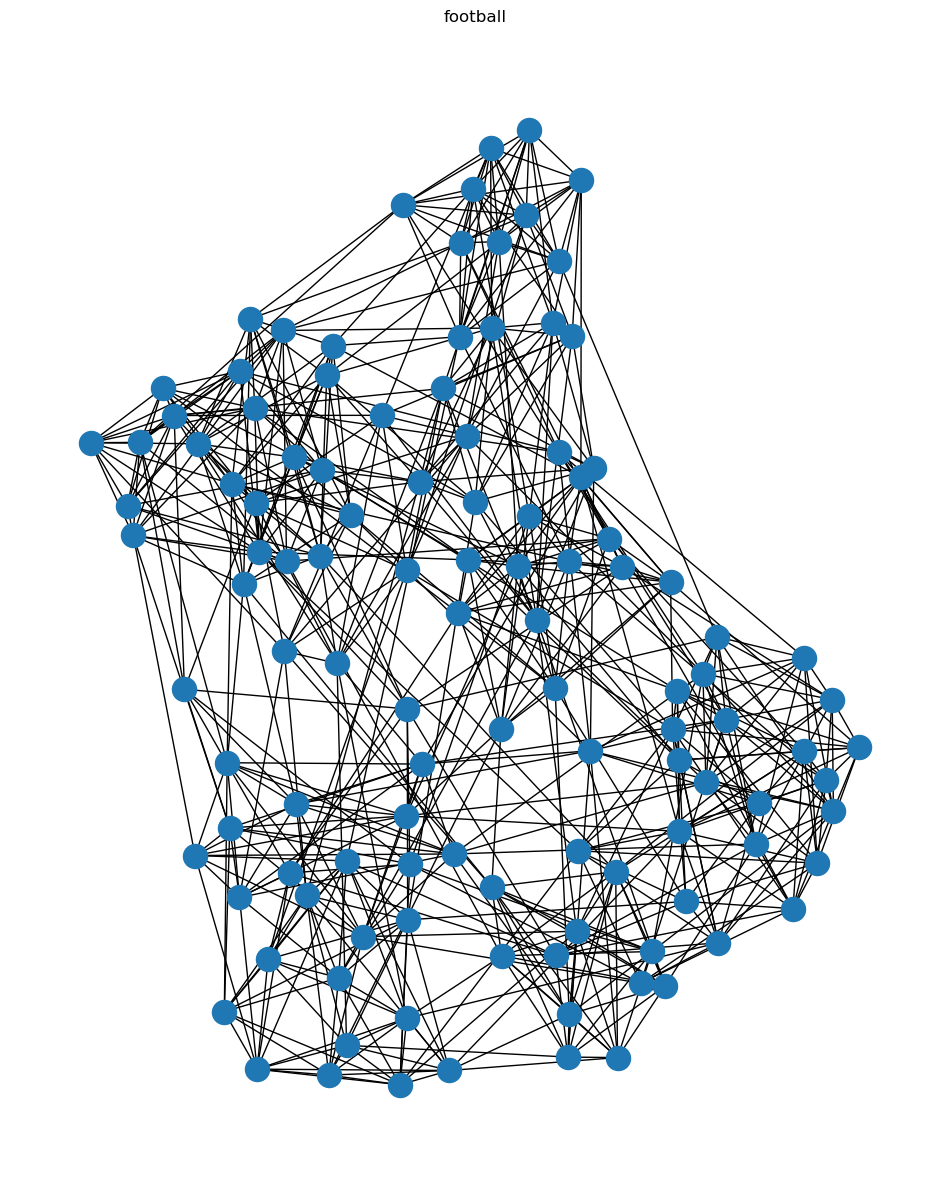

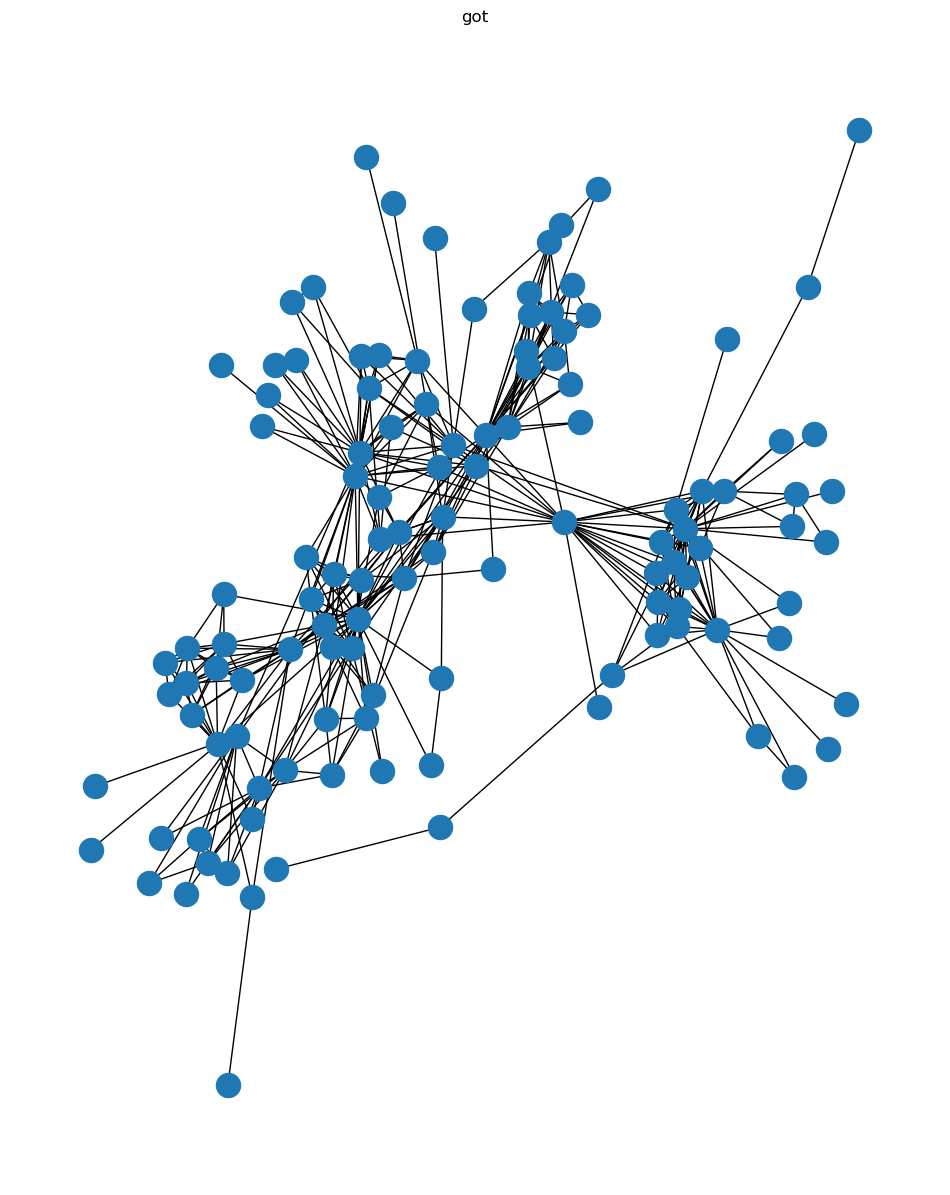

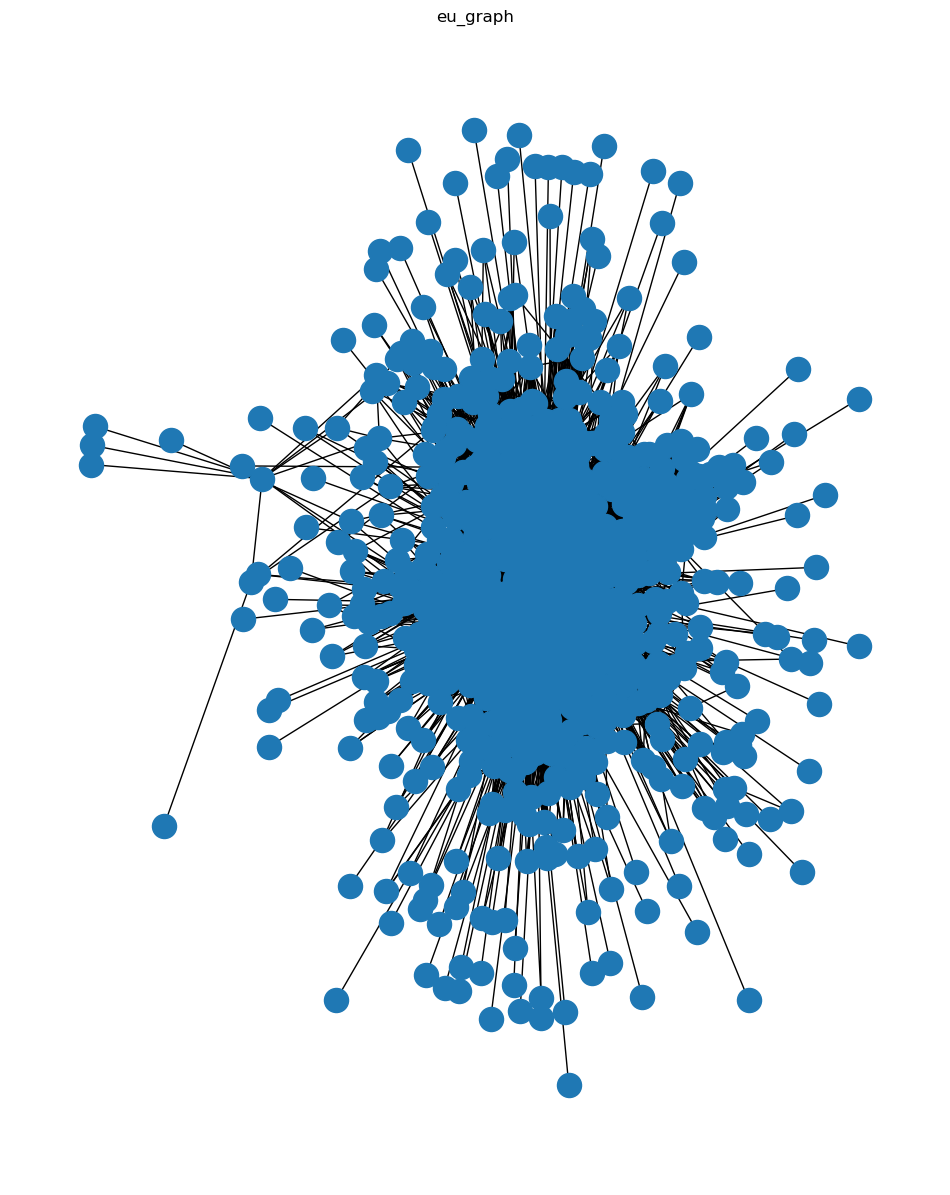

In [135]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 15)})
plt.title(names[0])
nx.draw(graphs[0],pos = nx.spring_layout(graphs[0]))
plt.show()
plt.title(names[1])
nx.draw(graphs[1],pos = nx.spring_layout(graphs[1]))
plt.show()
plt.title(names[2])
nx.draw(graphs[2],pos = nx.spring_layout(graphs[2]))
plt.show()
plt.title(names[3])
nx.draw(graphs[3],pos = nx.spring_layout(graphs[3]))
plt.show()
plt.title(names[4])
nx.draw(graphs[4],pos = nx.spring_layout(graphs[4]))
plt.show()
plt.title(names[5])
nx.draw(graphs[5],pos = nx.spring_layout(graphs[5]))
plt.show()
plt.title(names[6])
nx.draw(graphs[6],pos = nx.spring_layout(graphs[6]))
plt.show()
plt.title(names[7])
nx.draw(graphs[7],pos = nx.spring_layout(graphs[7]))
plt.show()
plt.title(names[8])
nx.draw(graphs[8],pos = nx.spring_layout(graphs[8]))
plt.show()

#### Απ' όλα τα παραπάνω διαγράμματα των μετρικών καταλήγουμε στο συμπέρασμα πως η τοπολογία football θα μπορούσε να χαρακτηριστεί ως SW (small world) και οι τοπολογίες got και football ως SF (scale free).

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [142]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

football_graph=conv2int(football,0)
football=football_graph[0]
got_graph=conv2int(got,0)
got=got_graph[0]
eu_graph=conv2int(eu_graph,0)
eu_graph=eu_graph[0]
graphs[6]=football
graphs[7]=got
graphs[8]=eu_graph

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [143]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

REG  total time :  0.4609675407409668


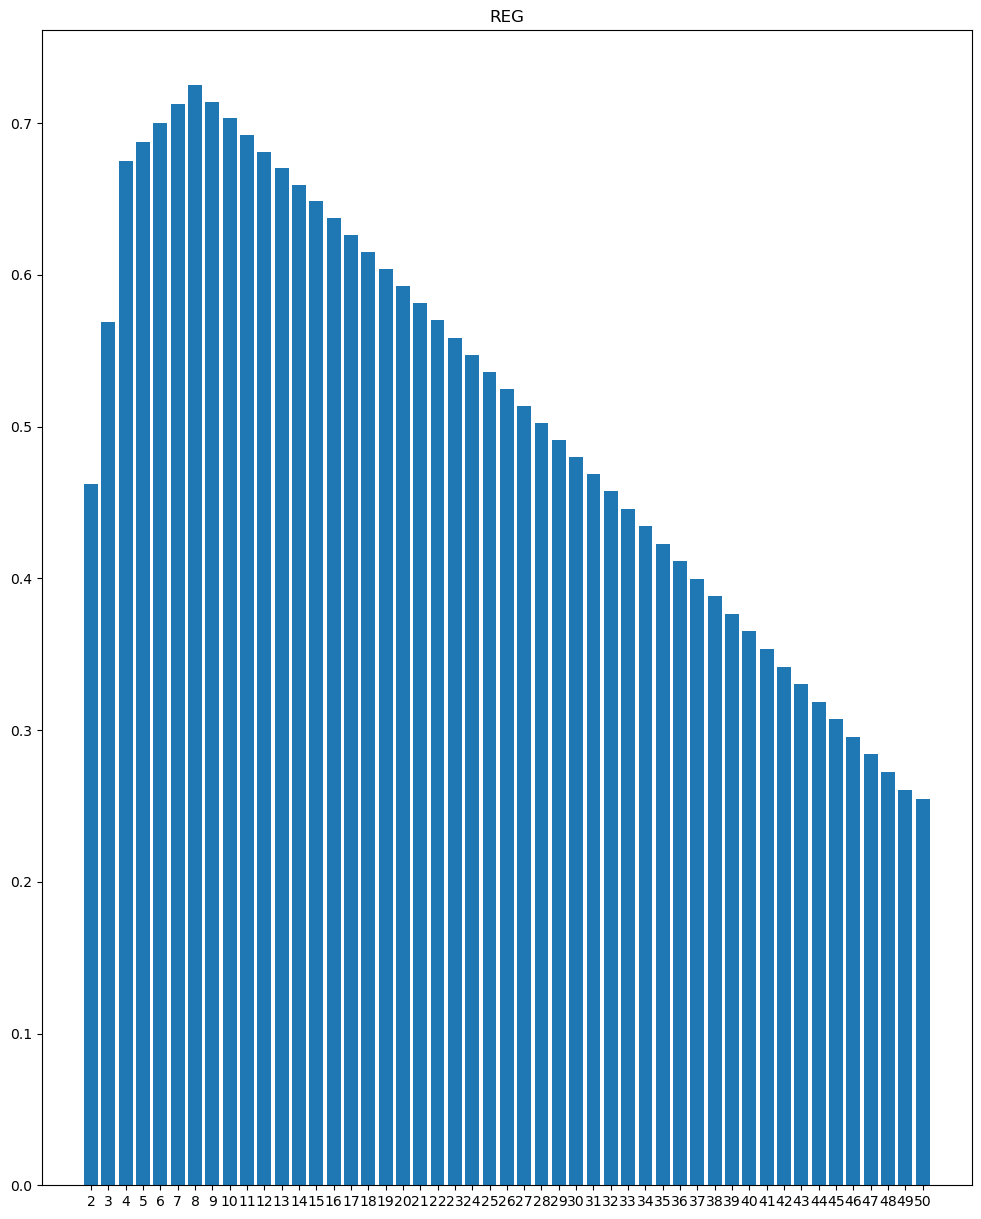

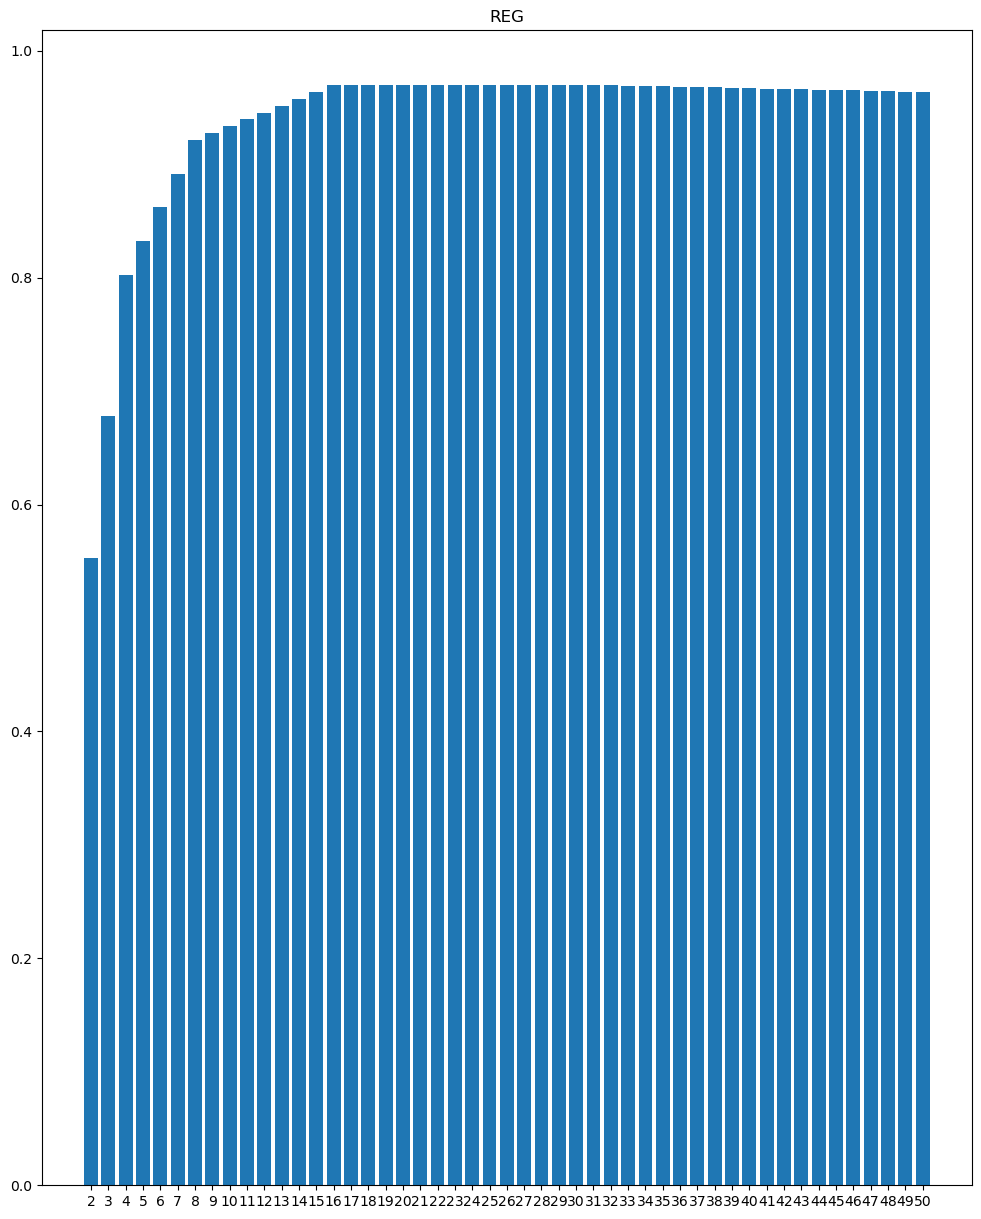

RGER  total time :  3.121485948562622


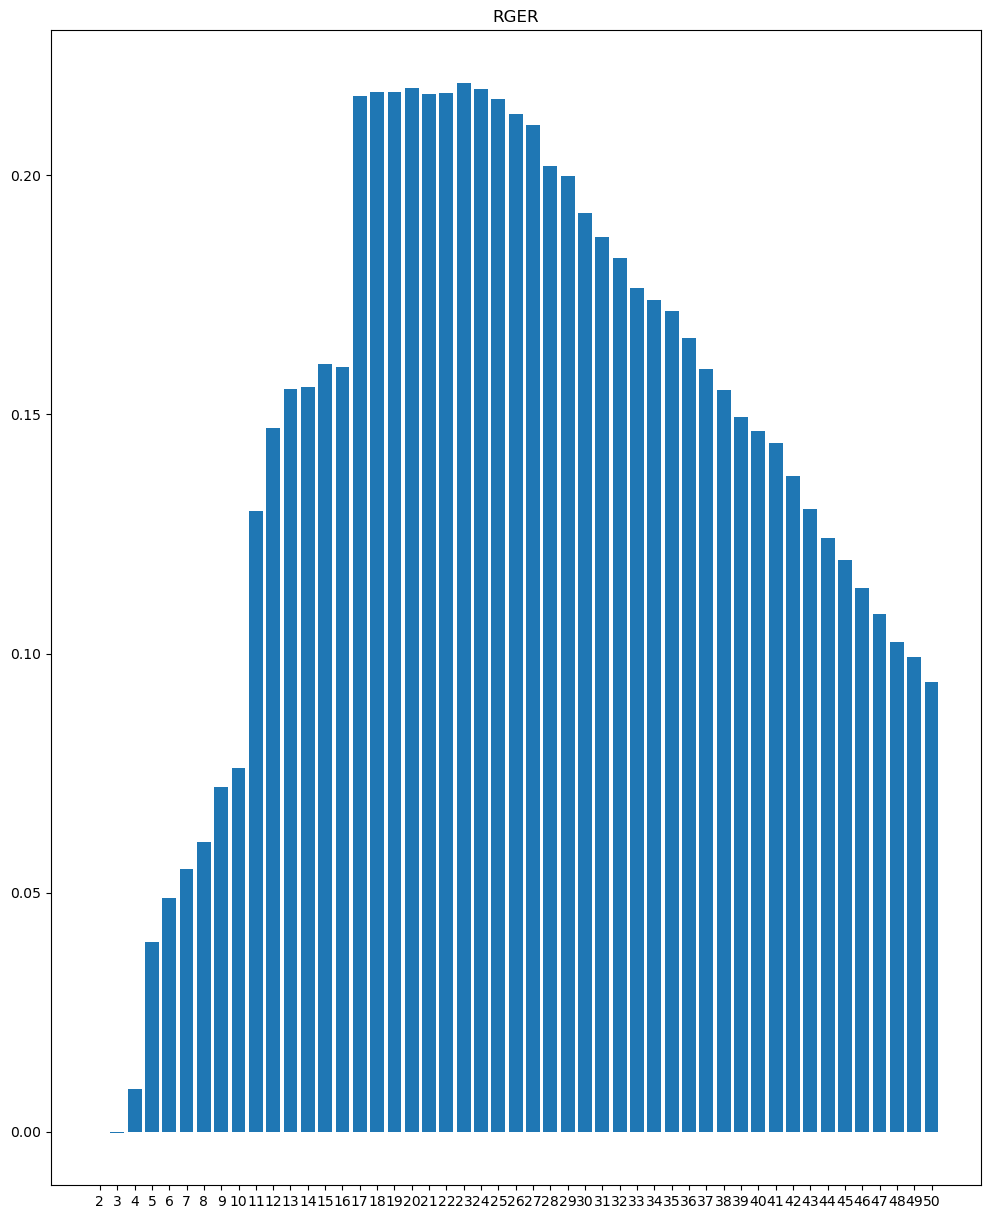

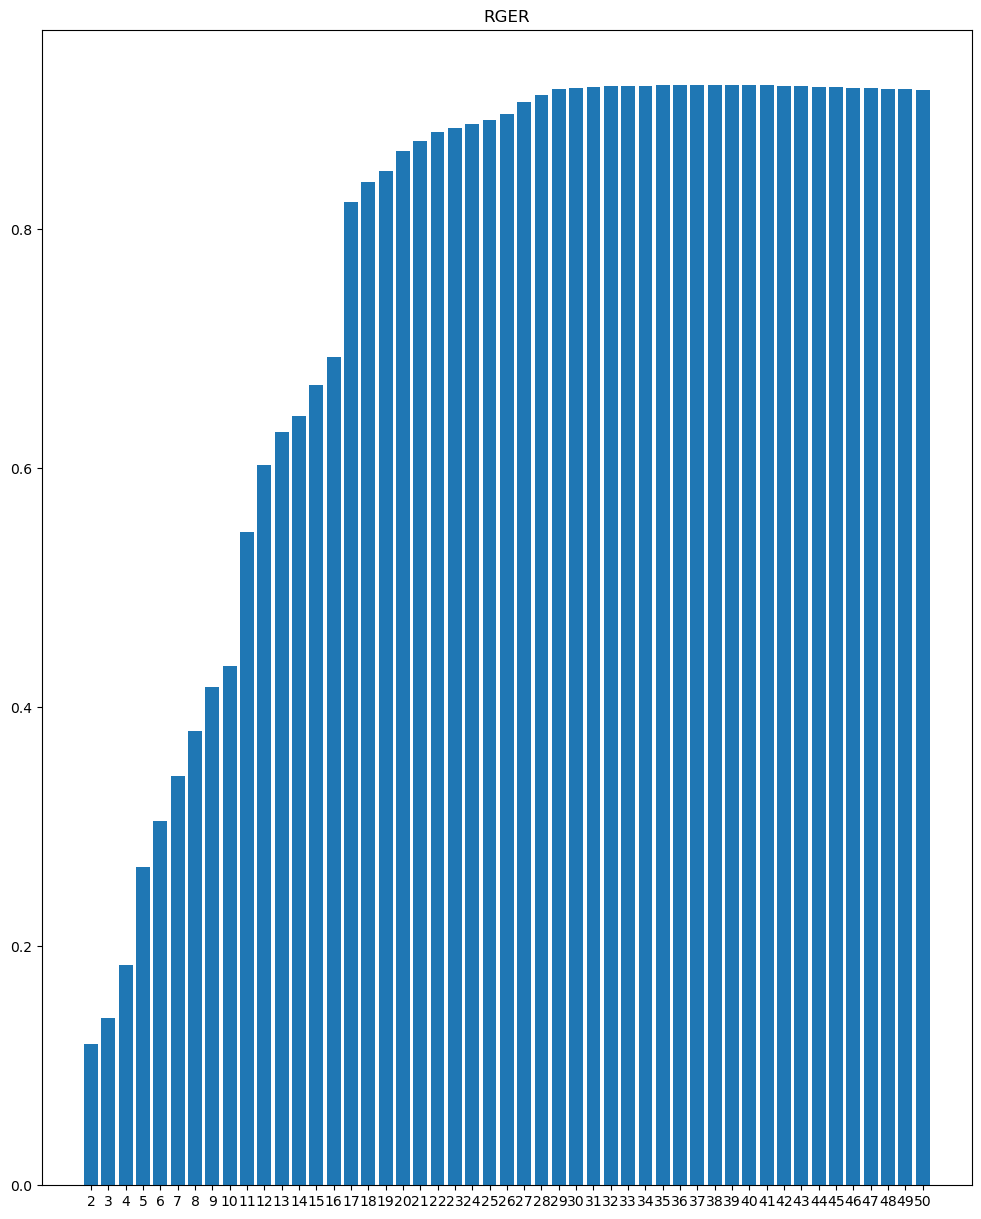

RG_Gilbert  total time :  20.036572694778442


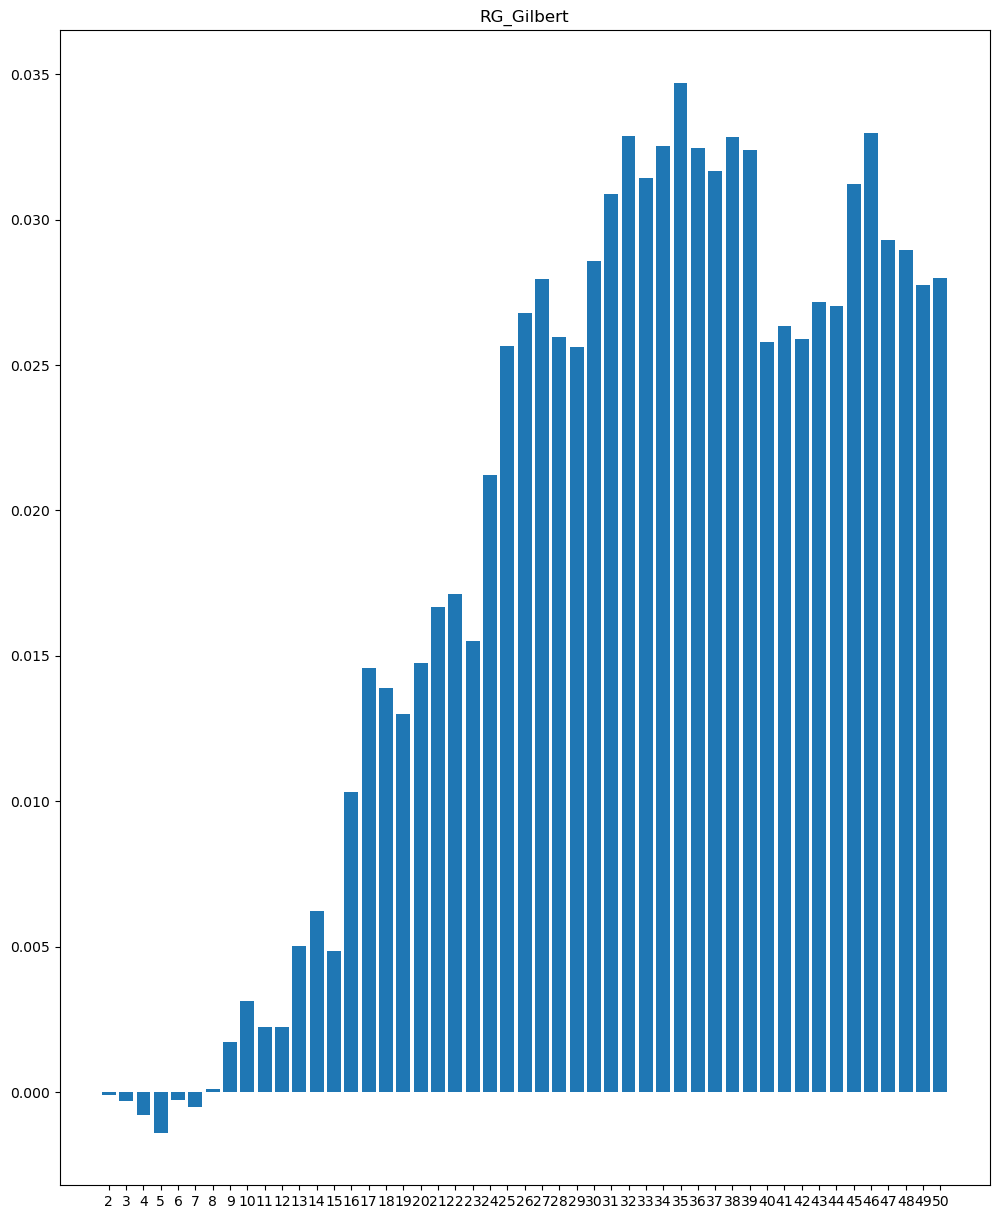

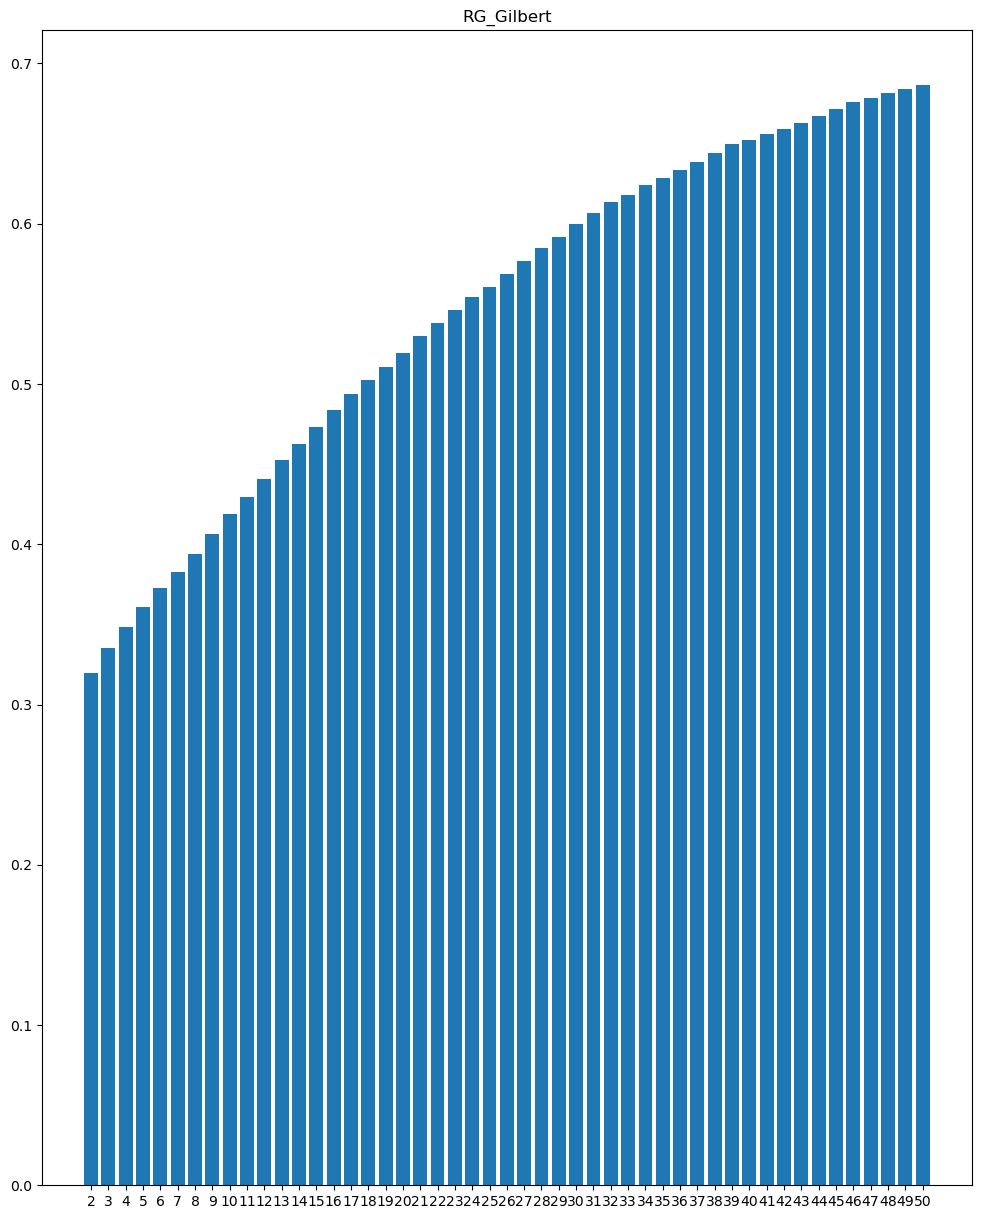

RGG  total time :  3.155758857727051


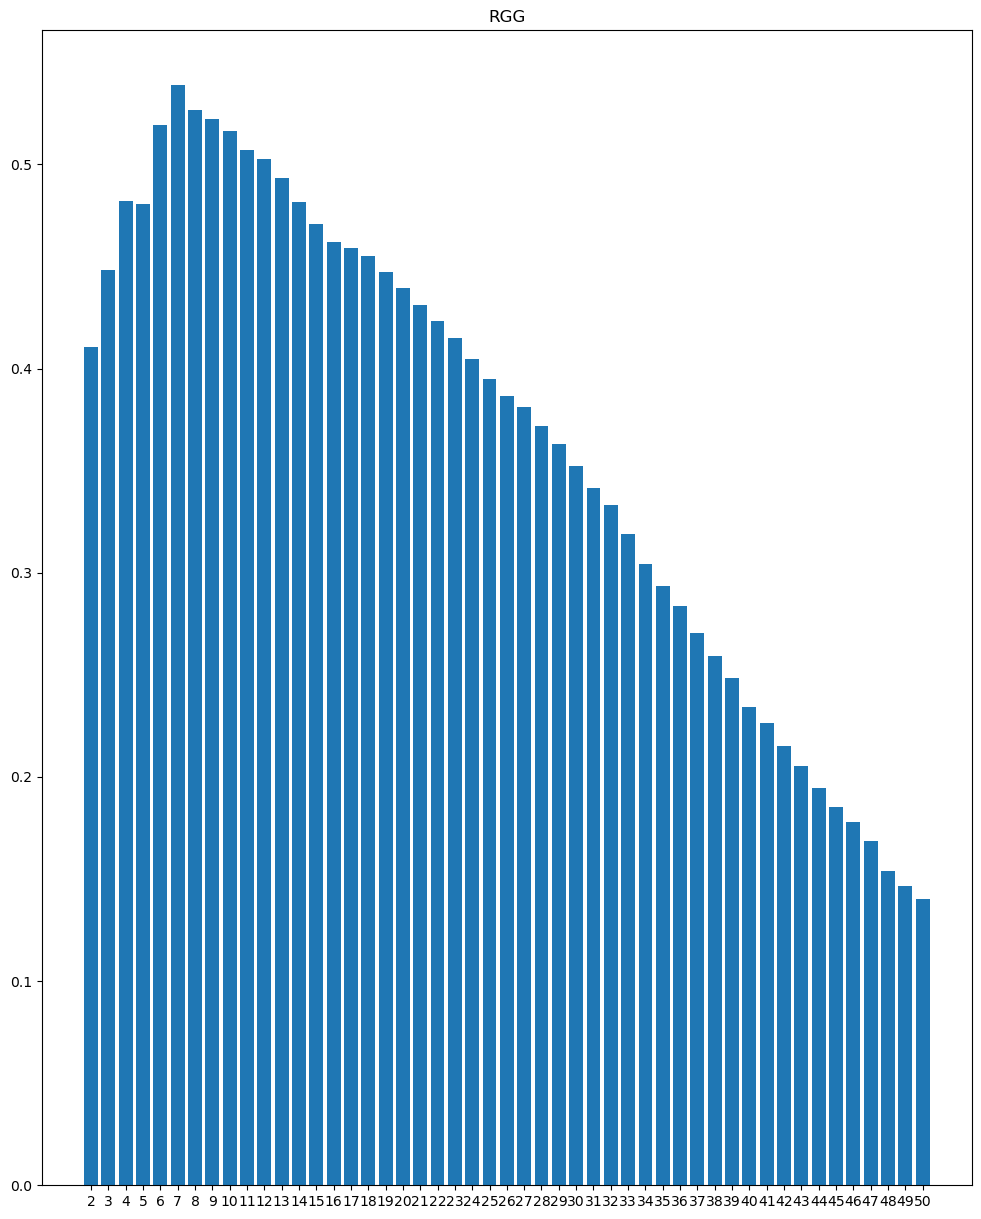

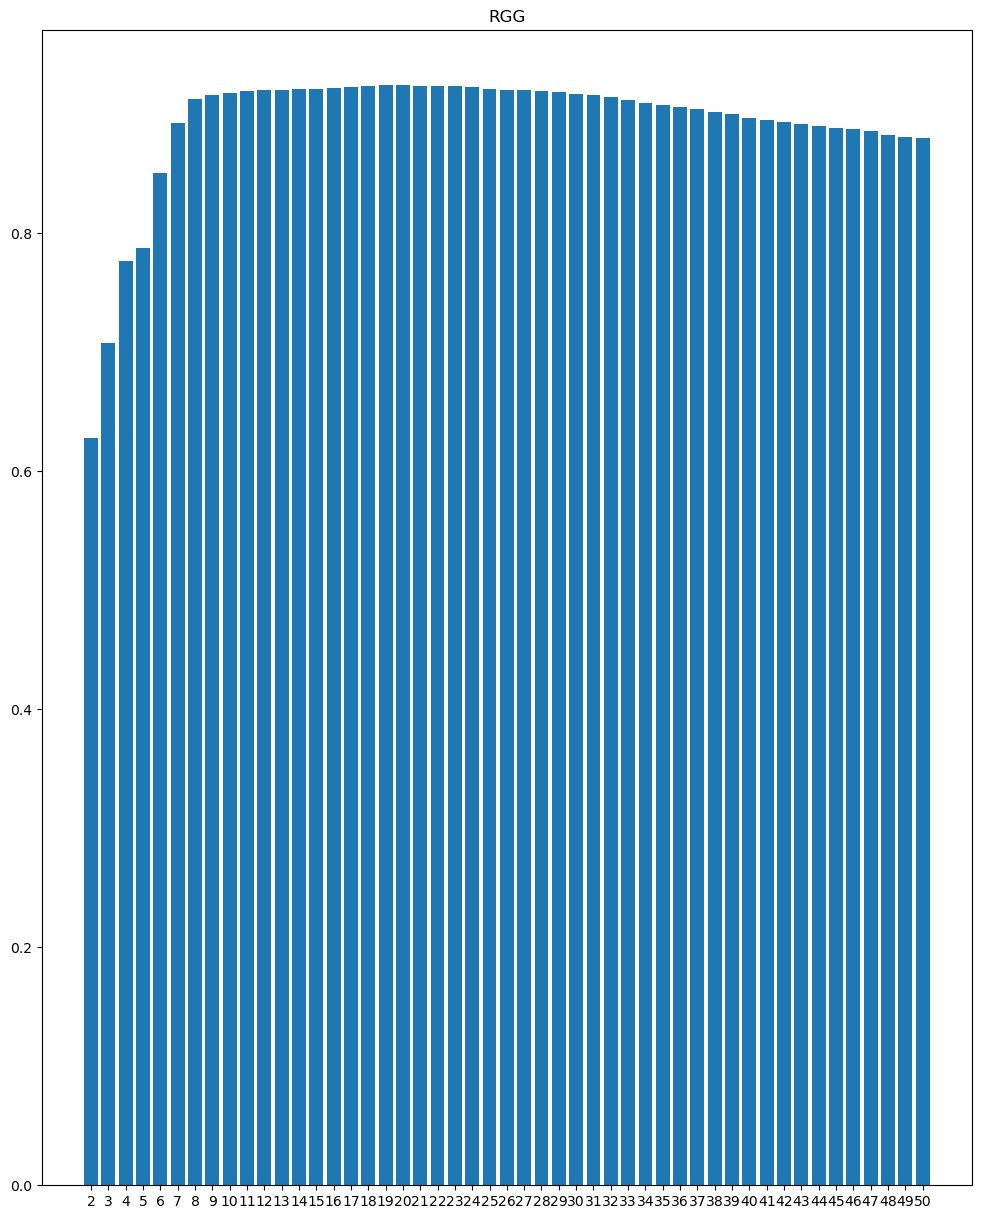

SF  total time :  3.4403538703918457


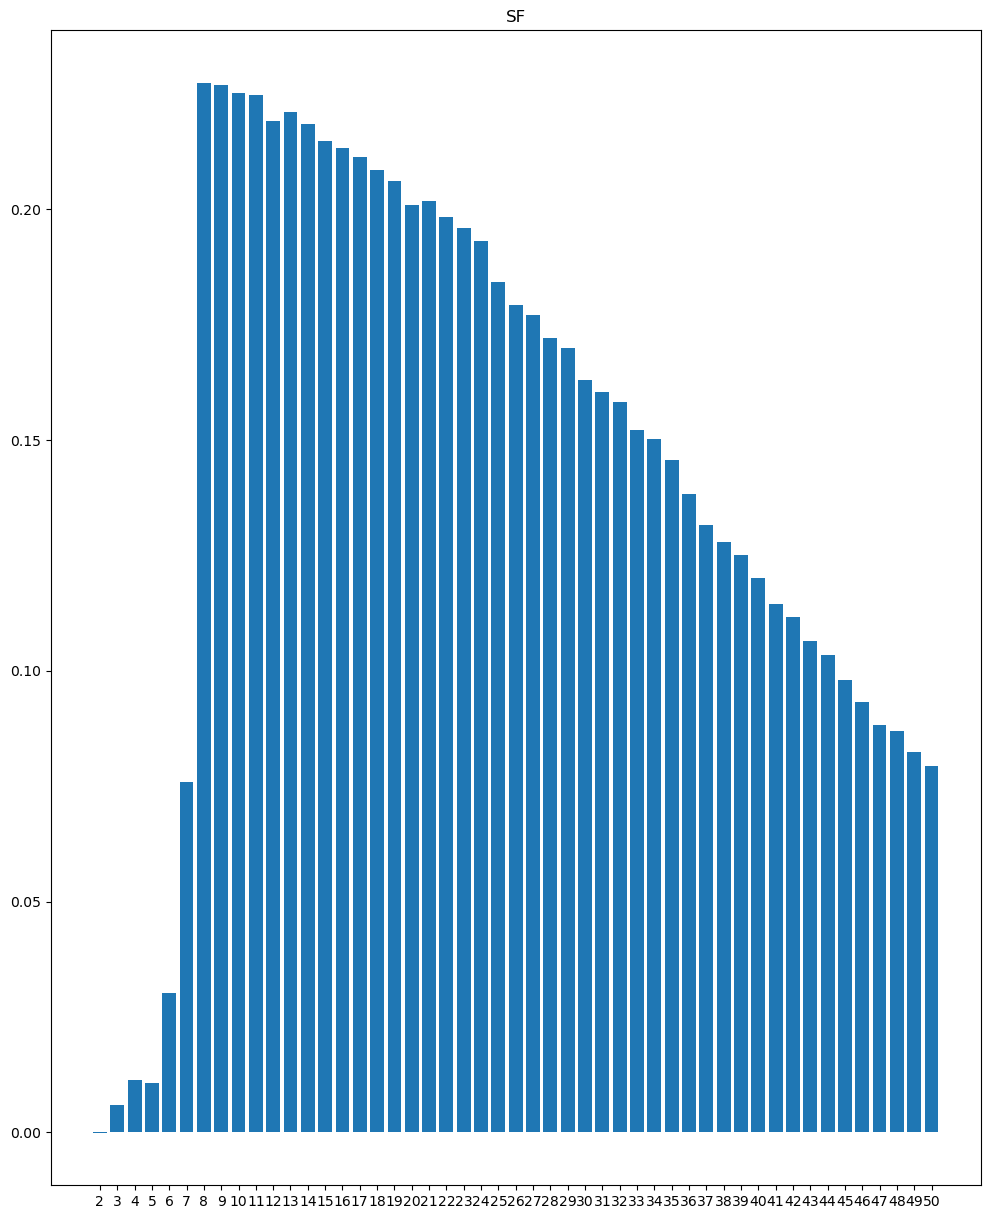

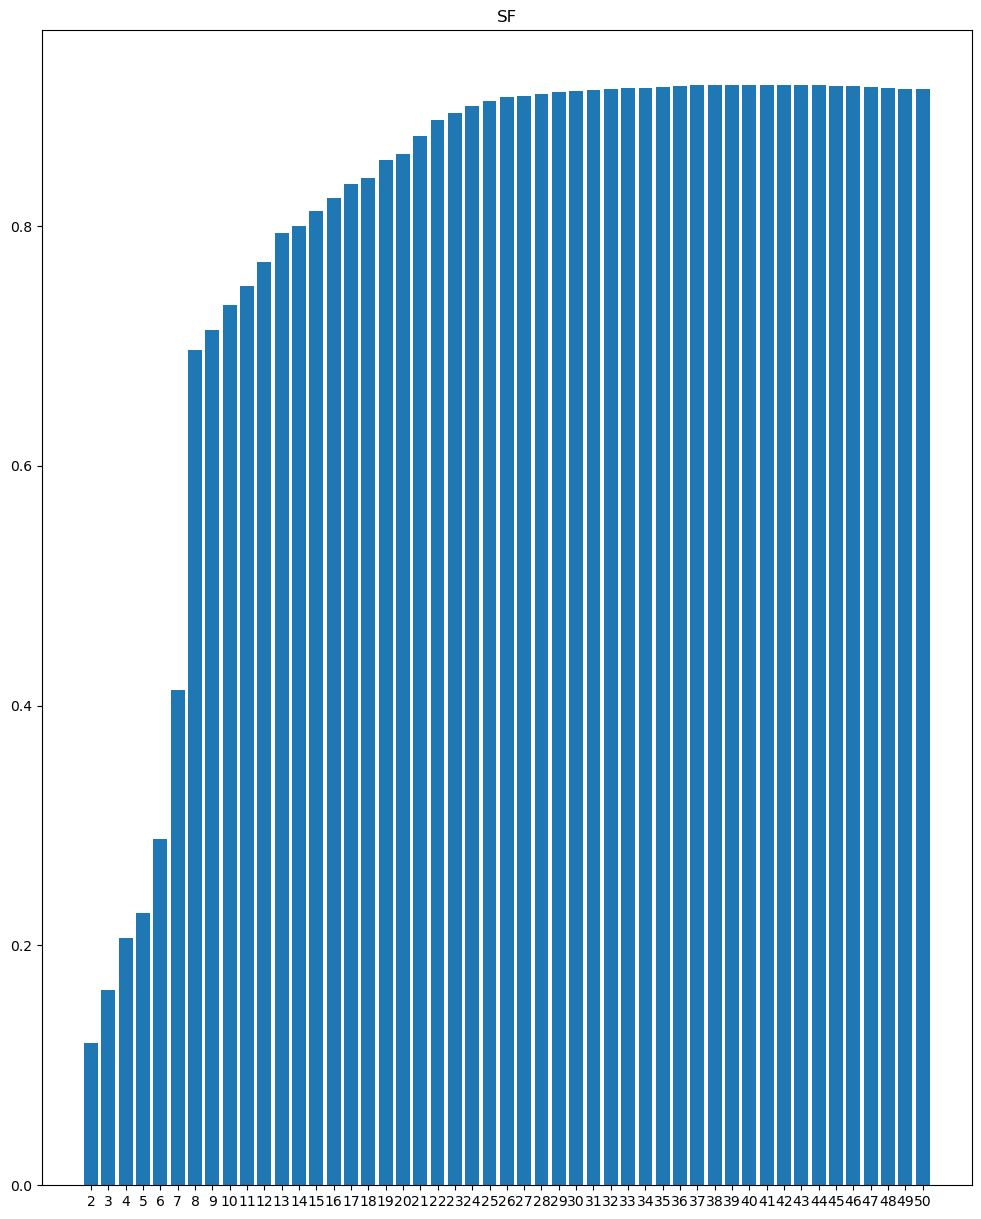

SW  total time :  0.8722889423370361


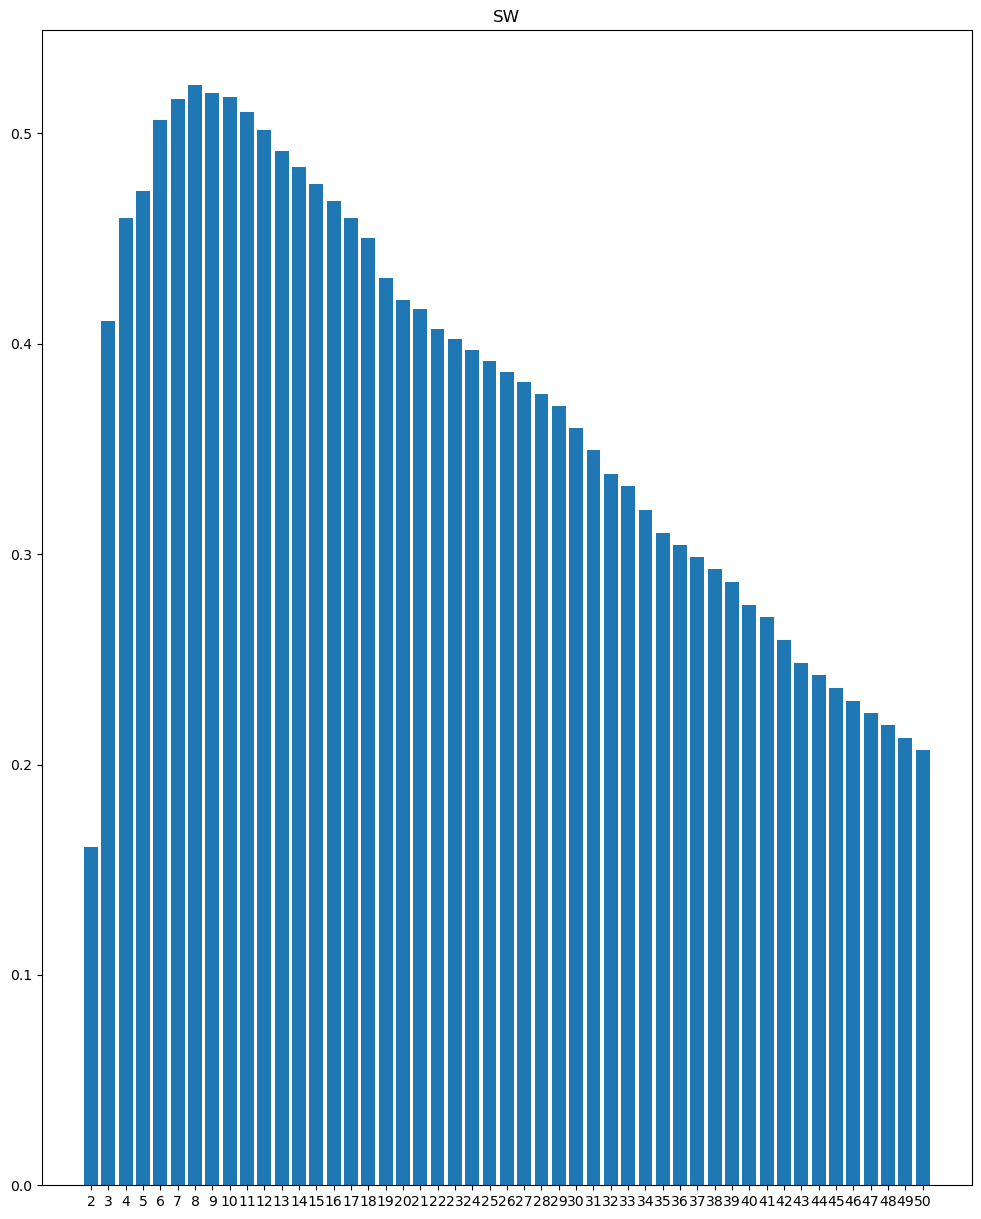

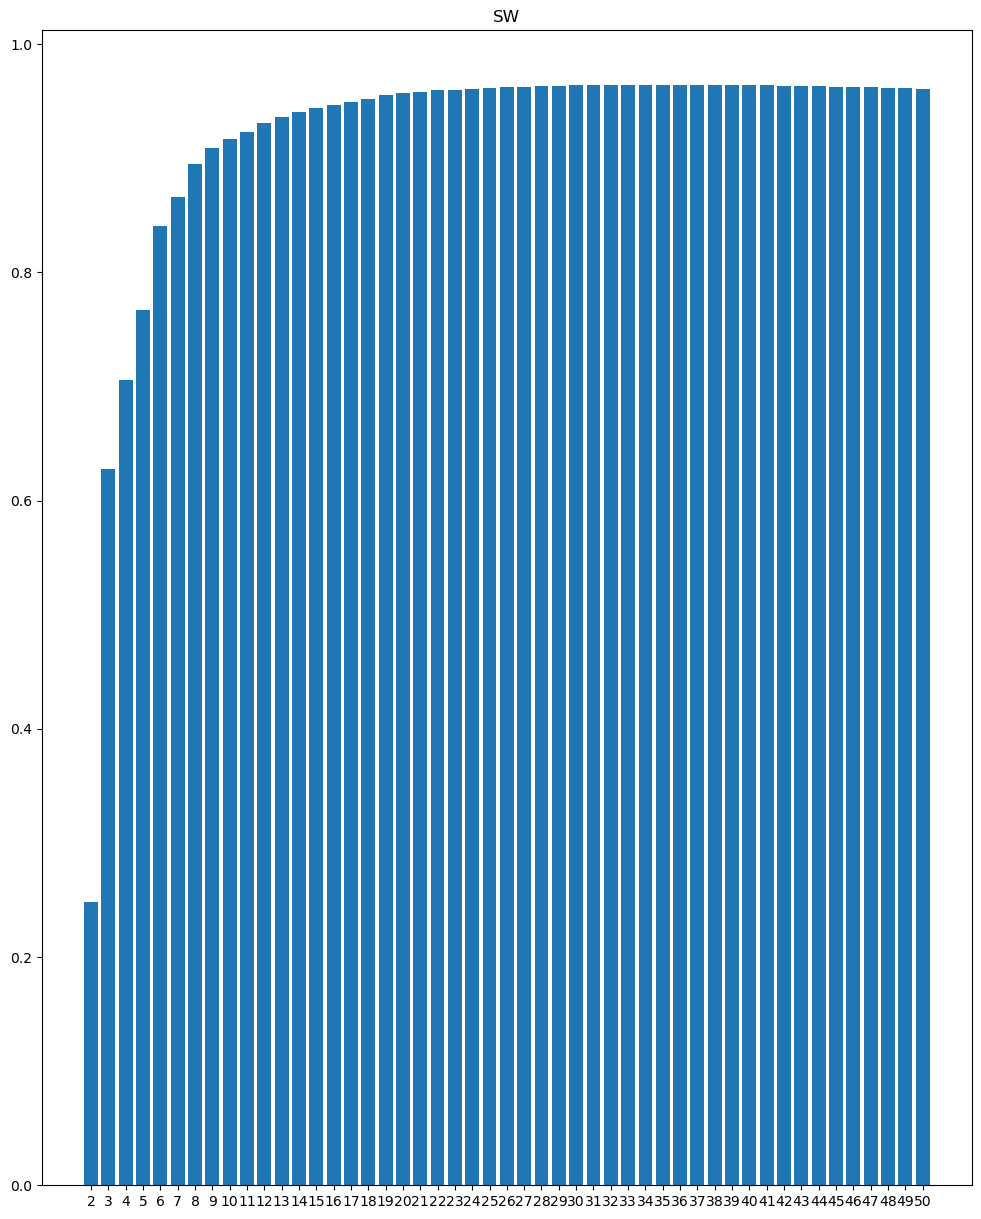

football  total time :  7.789658546447754


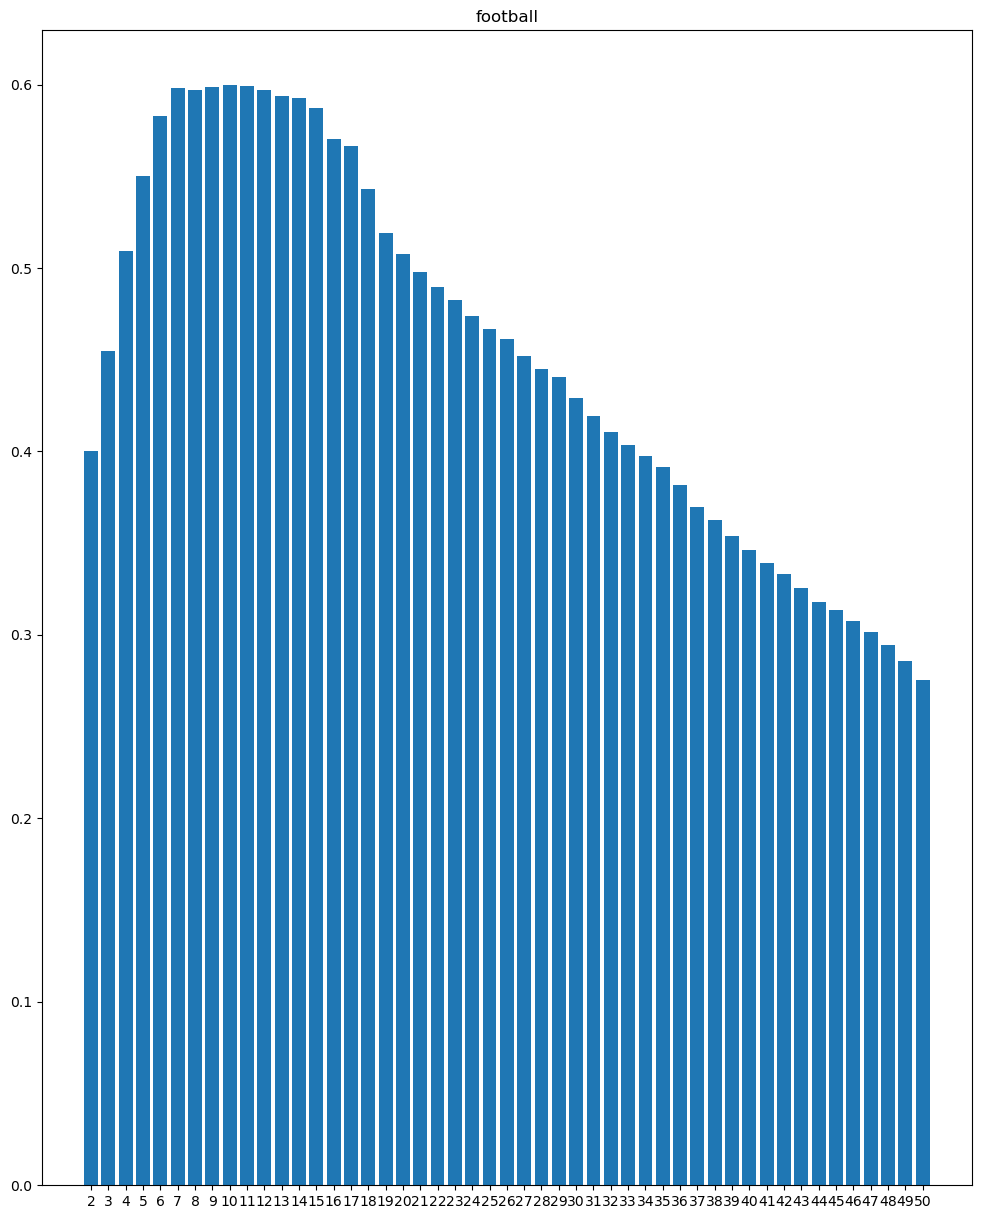

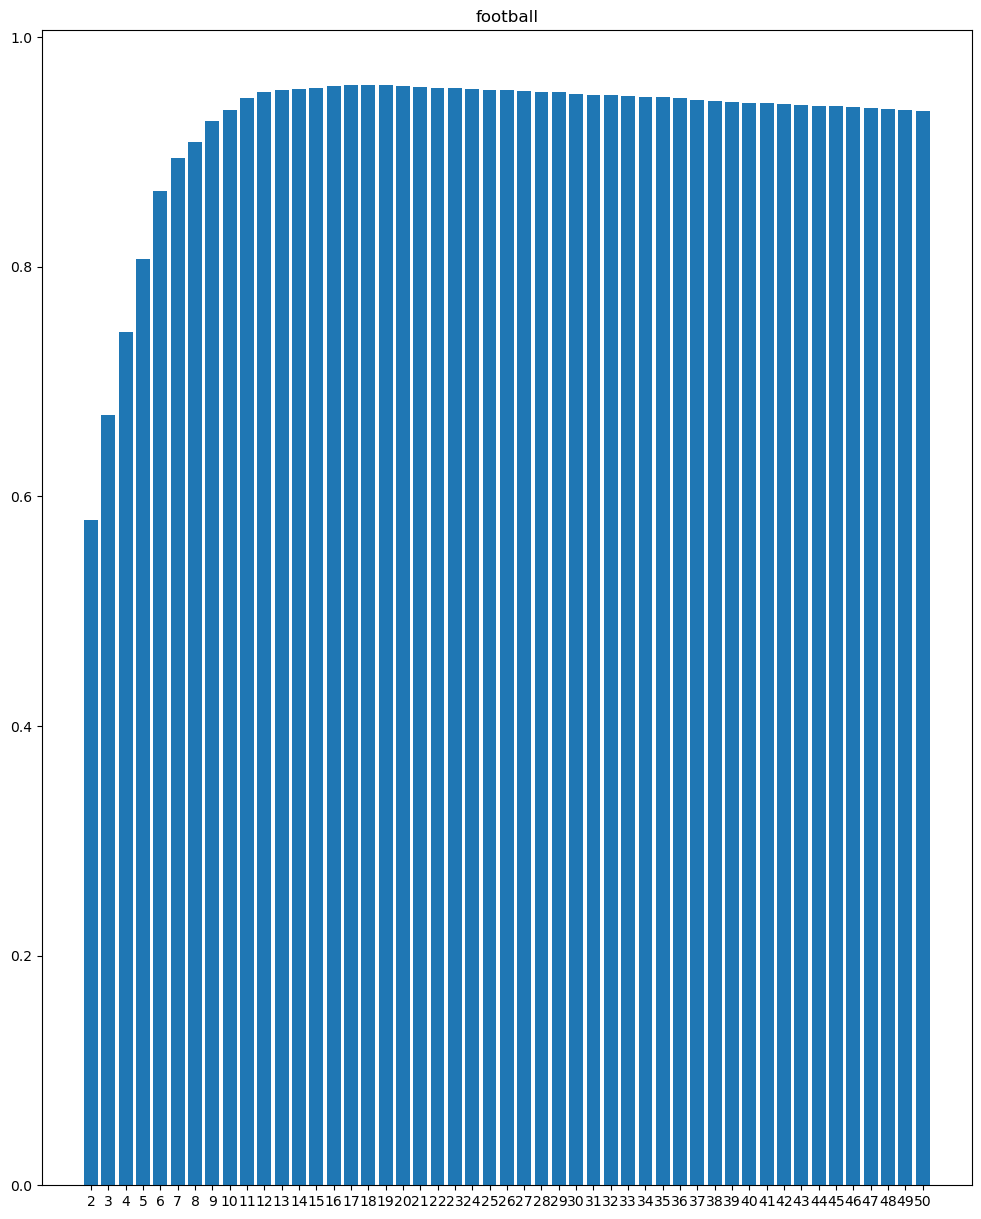

got  total time :  2.510784864425659


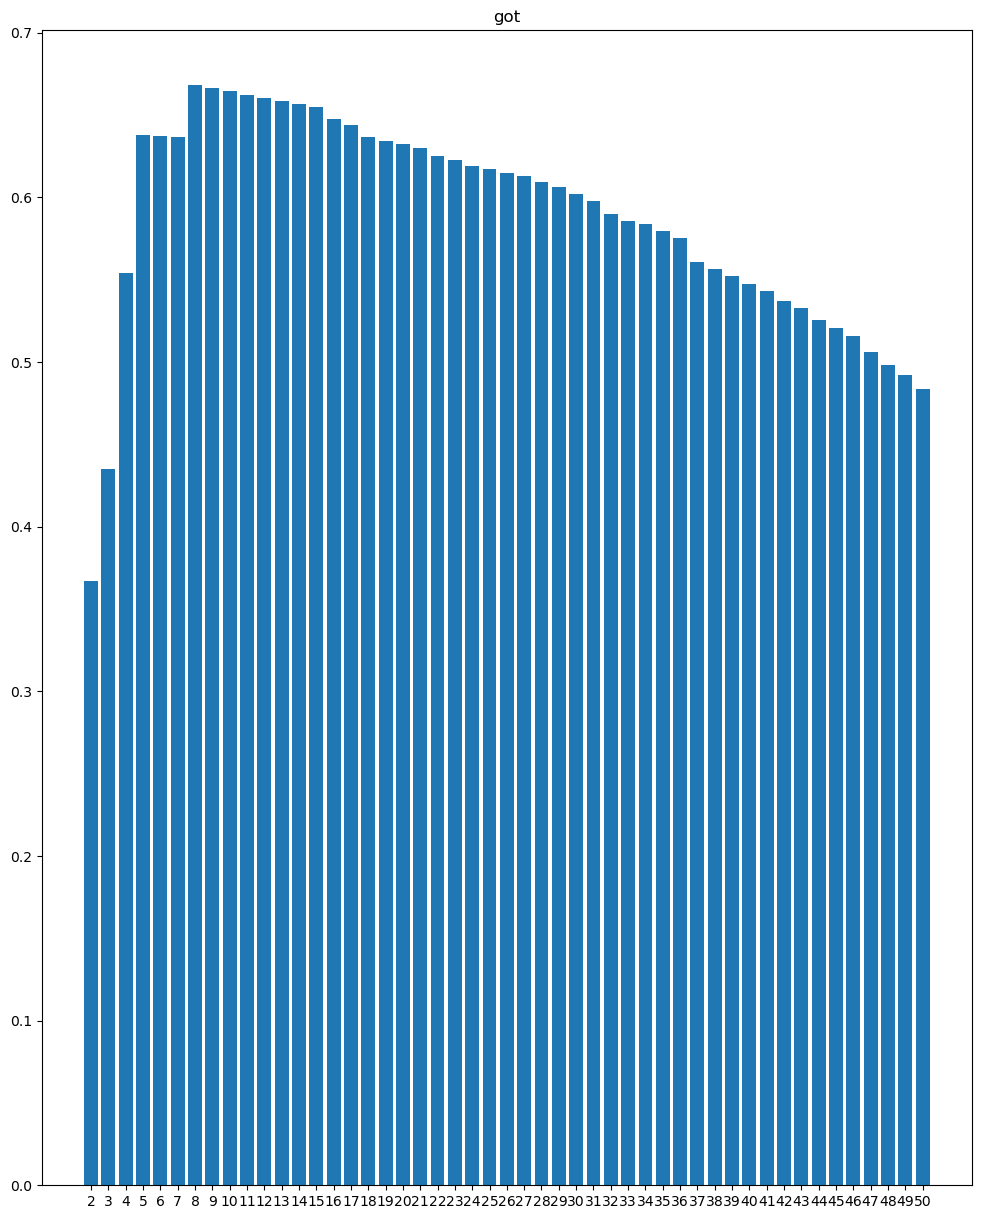

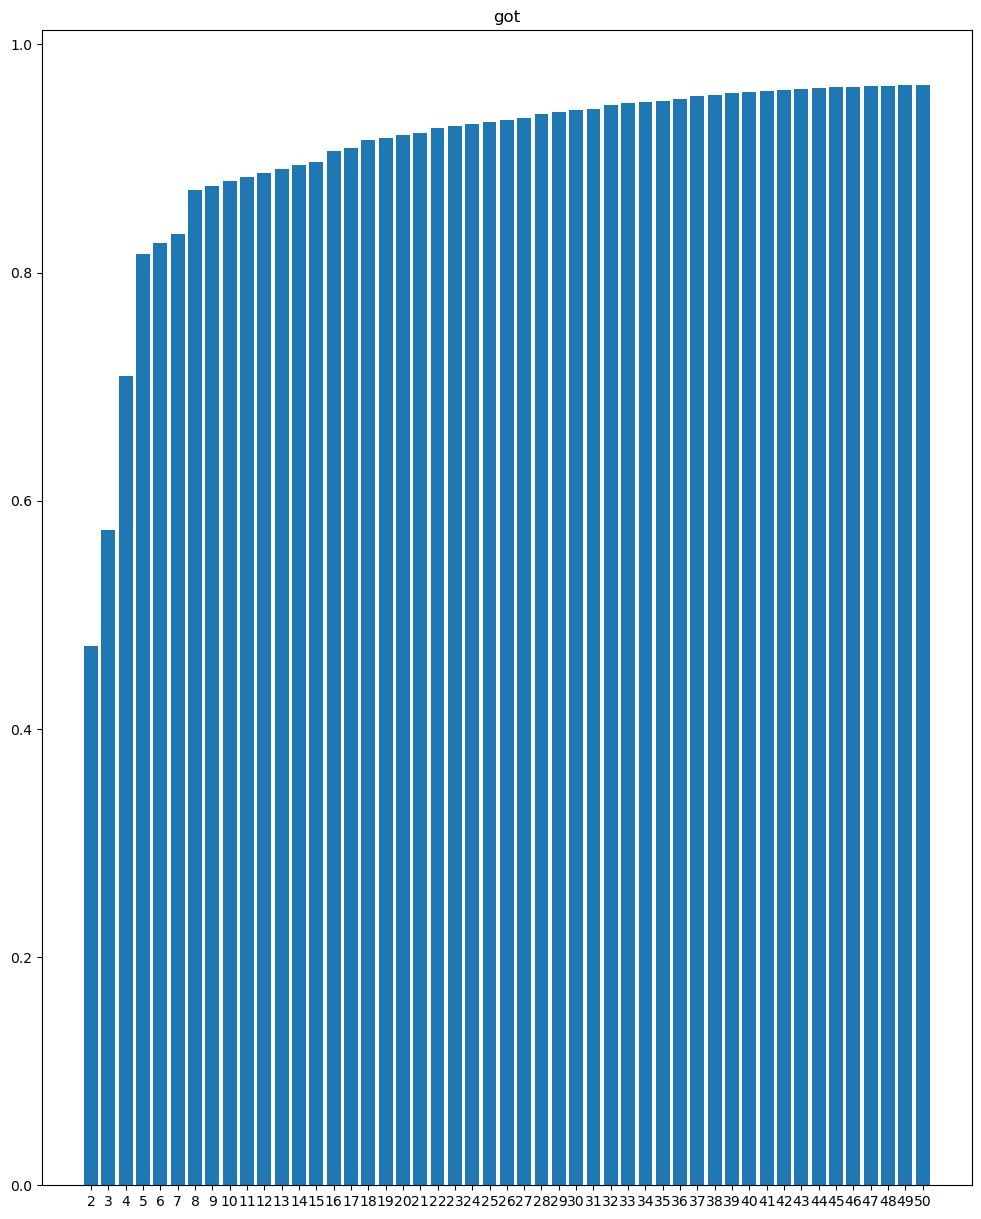

eu_graph  total time :  532.5794129371643


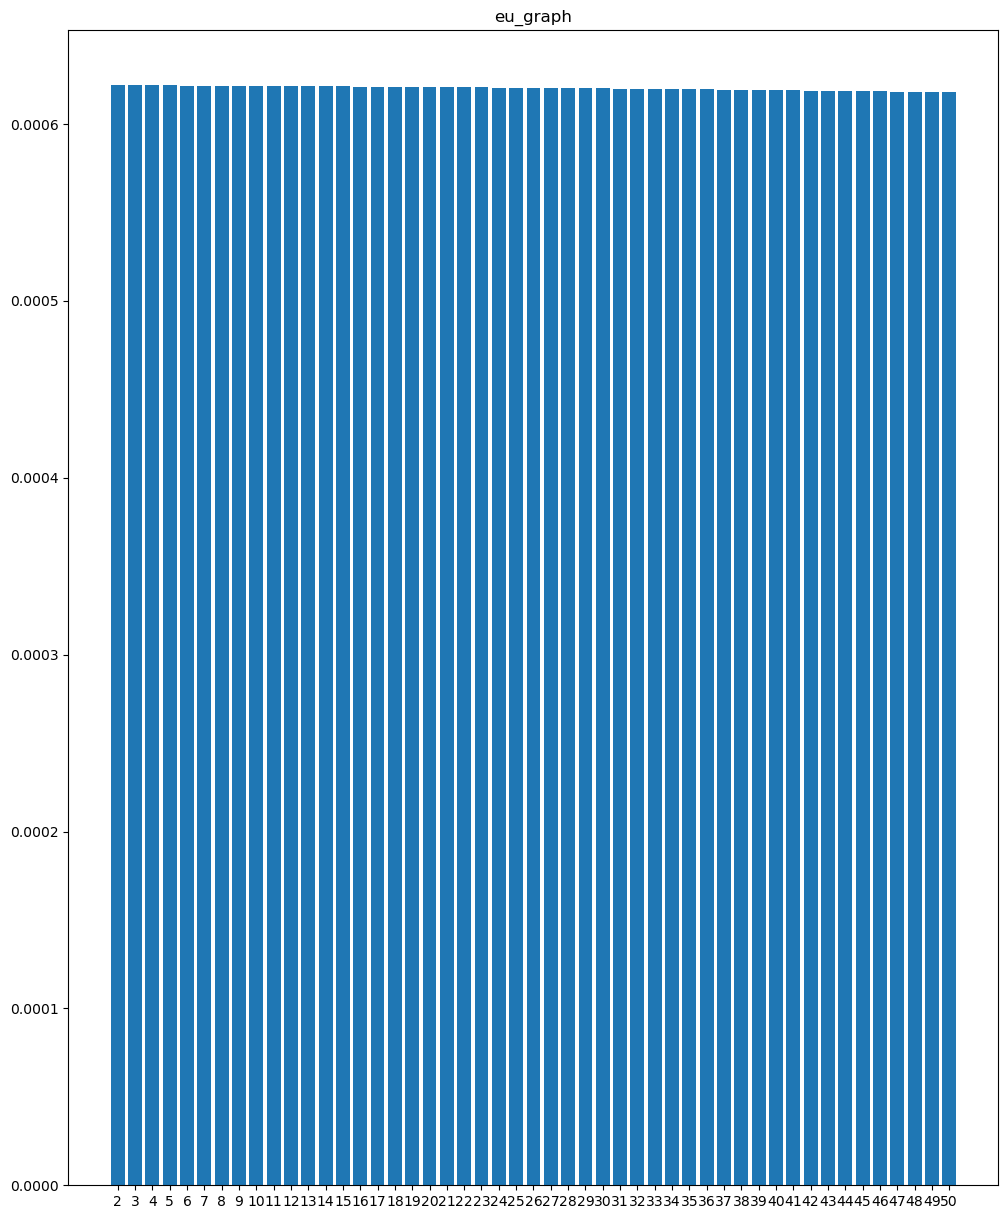

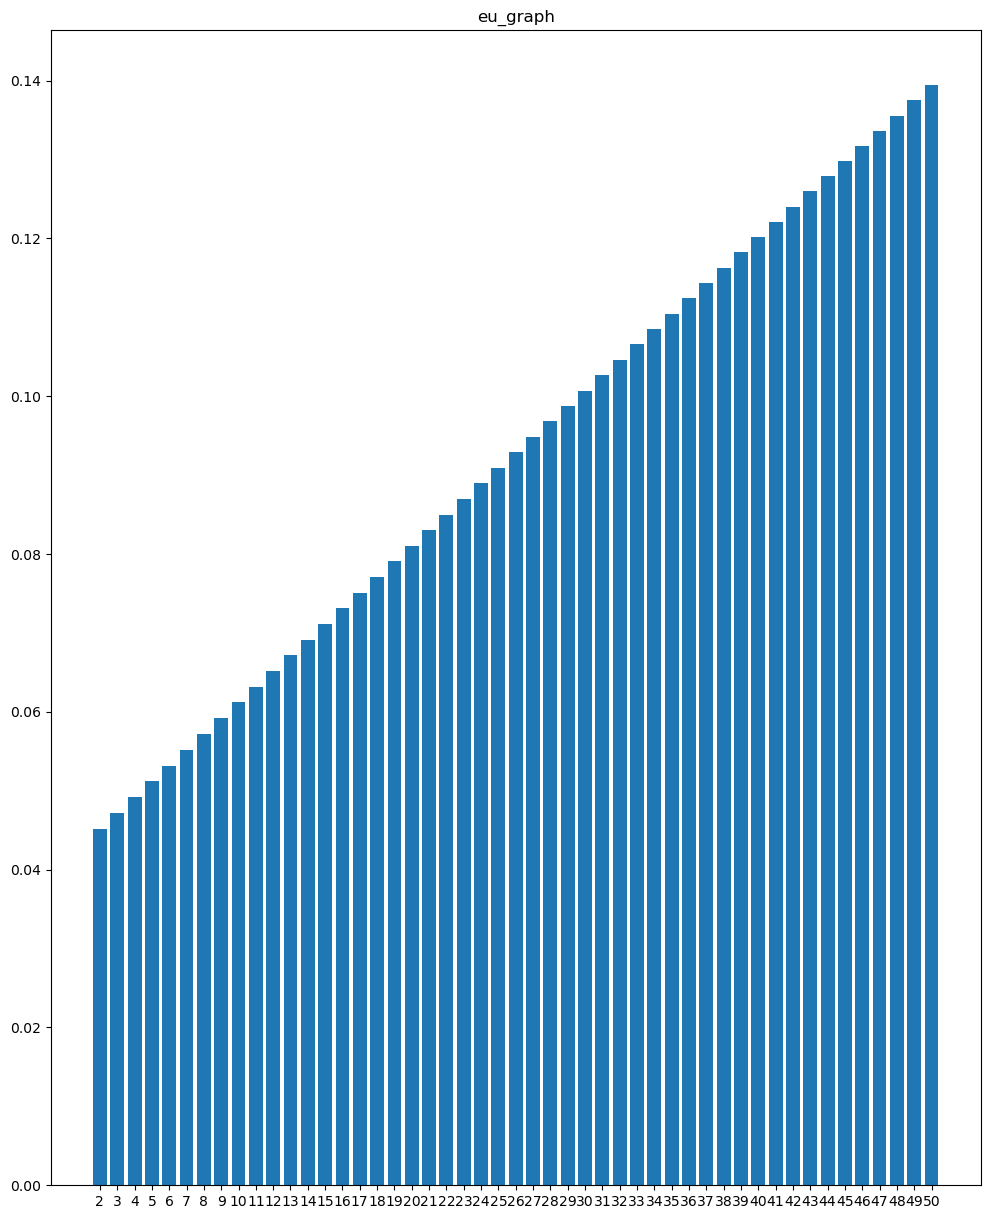

In [144]:
all_partitions=[]
total_partition_time=[]
total_modularity_time=[]
total_performance_time=[]
for j in range(0,len(names)):
    array=[]
    start_time=time.time()
    comp= girvan_newman(graphs[j], most_valuable_edge=None)
    limited=takewhile(lambda c: len(c) <= 50, comp)
    for communities in limited:
        array.append(tuple(sorted(c) for c in communities))
    partition_time=time.time()-start_time
    total_partition_time.append(partition_time)
    all_partitions.append(array)

        
modularity_index=[]
modularities=[]
max_modularities=[]
for i in range(0,len(names)):
    c=0
    start_time=time.time()
    a=[]
    for j in range(0,len(all_partitions[i])):
        b=modularity(graphs[i],all_partitions[i][j])
        a.append(b)
        if(c<b):
            c=b
            index=j
    modularity_time=time.time()-start_time
    total_modularity_time.append(modularity_time)
    modularities.append(a)
    max_modularities.append(c)
    modularity_index.append(index)

performance_index=[]    
performances=[]
max_performances=[]
c=0.0
for j in range(0,len(names)):
    start_time=time.time()
    a=[]
    for i in range(0,len(all_partitions[j])):
        b=list(partition_quality(graphs[j],all_partitions[j][i]))
        a.append(b[1])
        if((a[i-1]<a[i]) & (i>=1)):
            c=a[i]
            index=i
    performance_time=time.time()-start_time
    total_performance_time.append(performance_time)
    performances.append(a)
    max_performances.append(c)
    performance_index.append(index)

total_time_per_graph=[] 
x_values=[]
for i in range(2,51):
    x_values.append(i)
    
for j in range(0,len(names)):
        total_time_per_graph.append(total_partition_time[j]+total_modularity_time[j]+total_performance_time[j])
        print(names[j]," total time : ",total_time_per_graph[j])
        plt.title(names[j])
        plt.bar(range(len(x_values)),modularities[j],tick_label=x_values)
        plt.show()
        plt.title(names[j])
        plt.bar(range(len(x_values)),performances[j],tick_label=x_values)
        plt.show()



### Επιλογή διαμέρισης με βάση το modularity score και το performance score

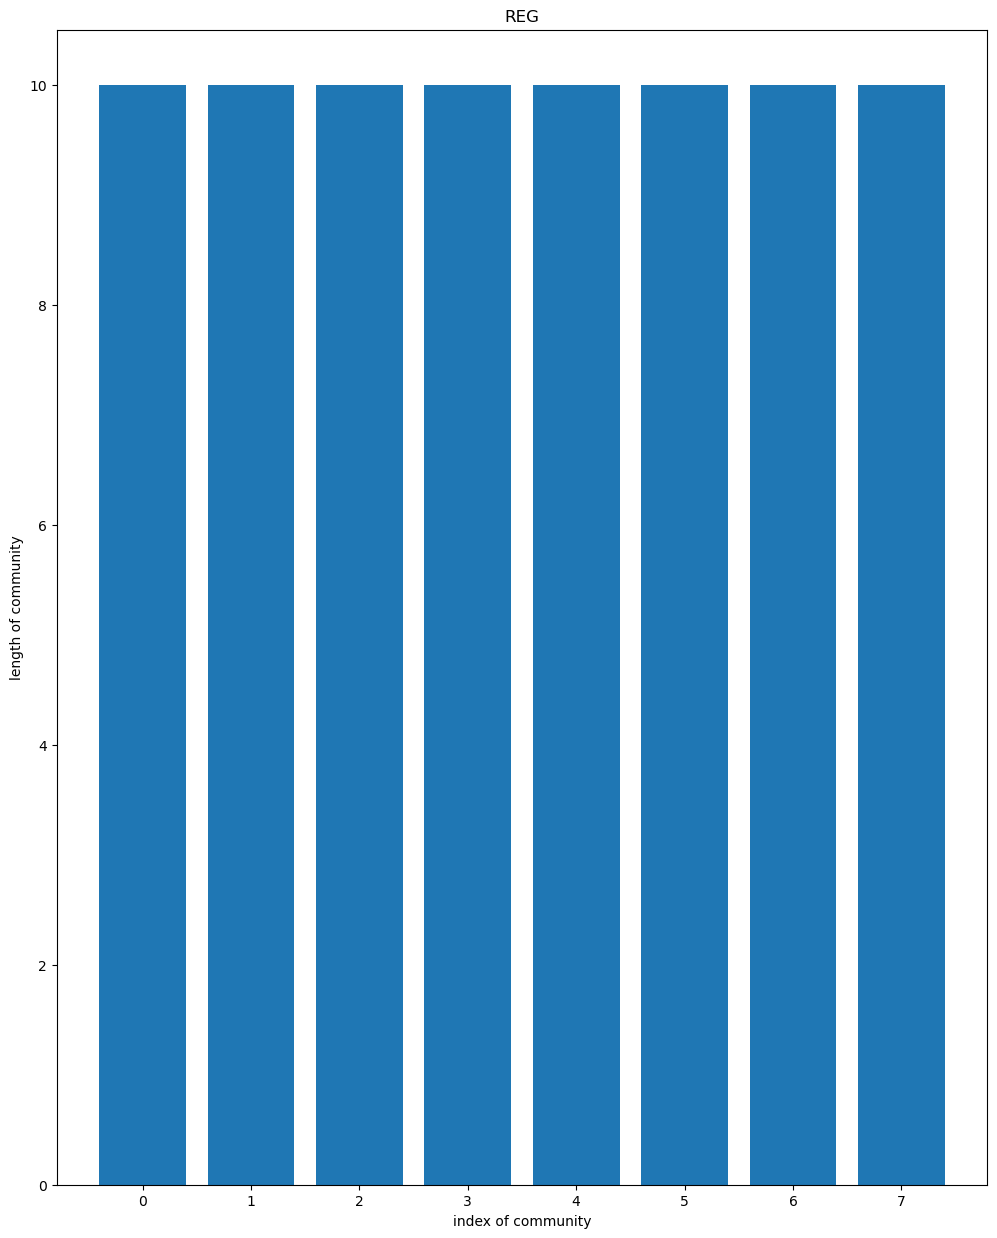

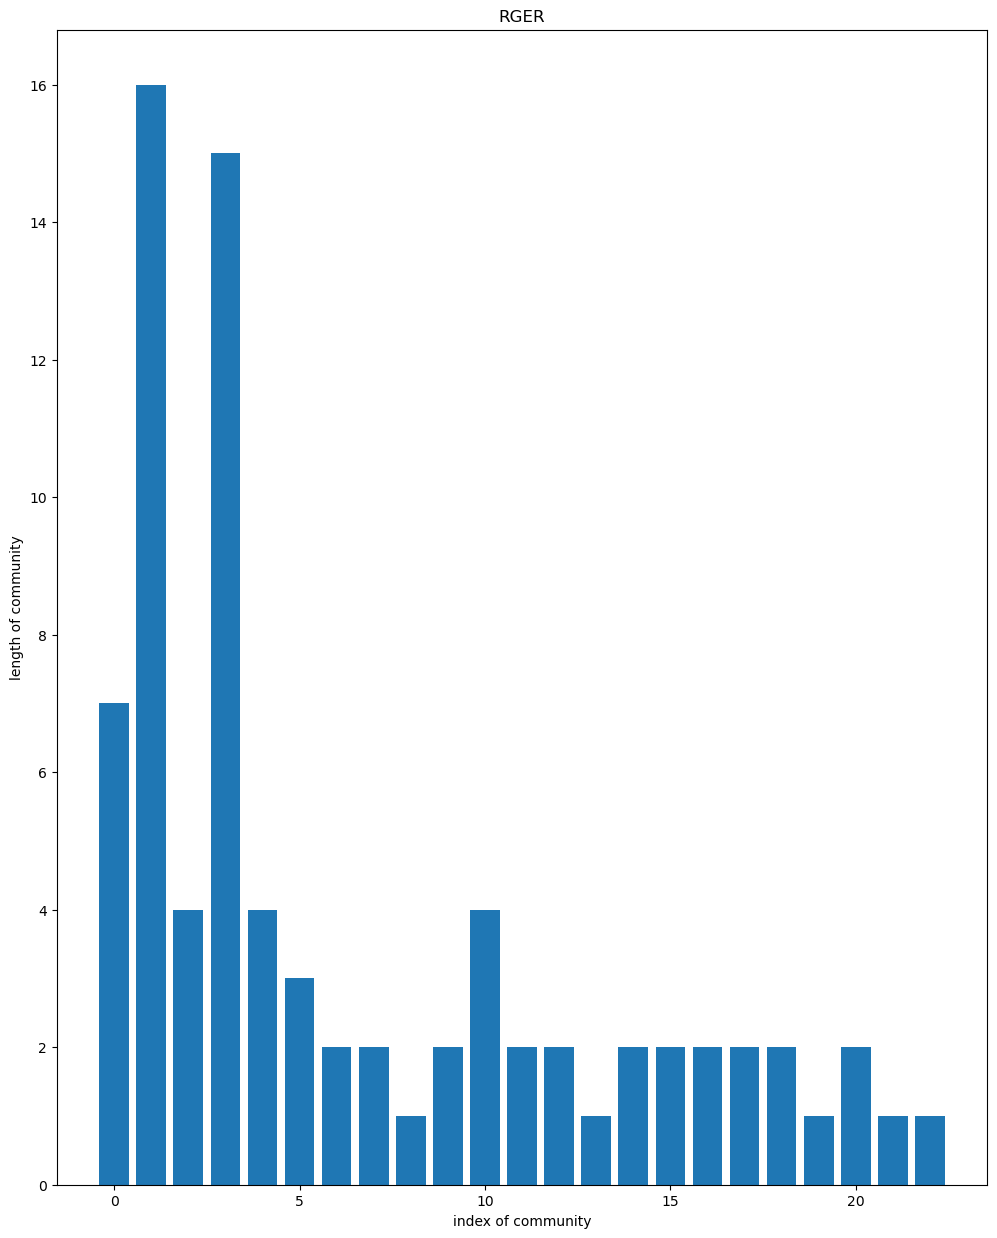

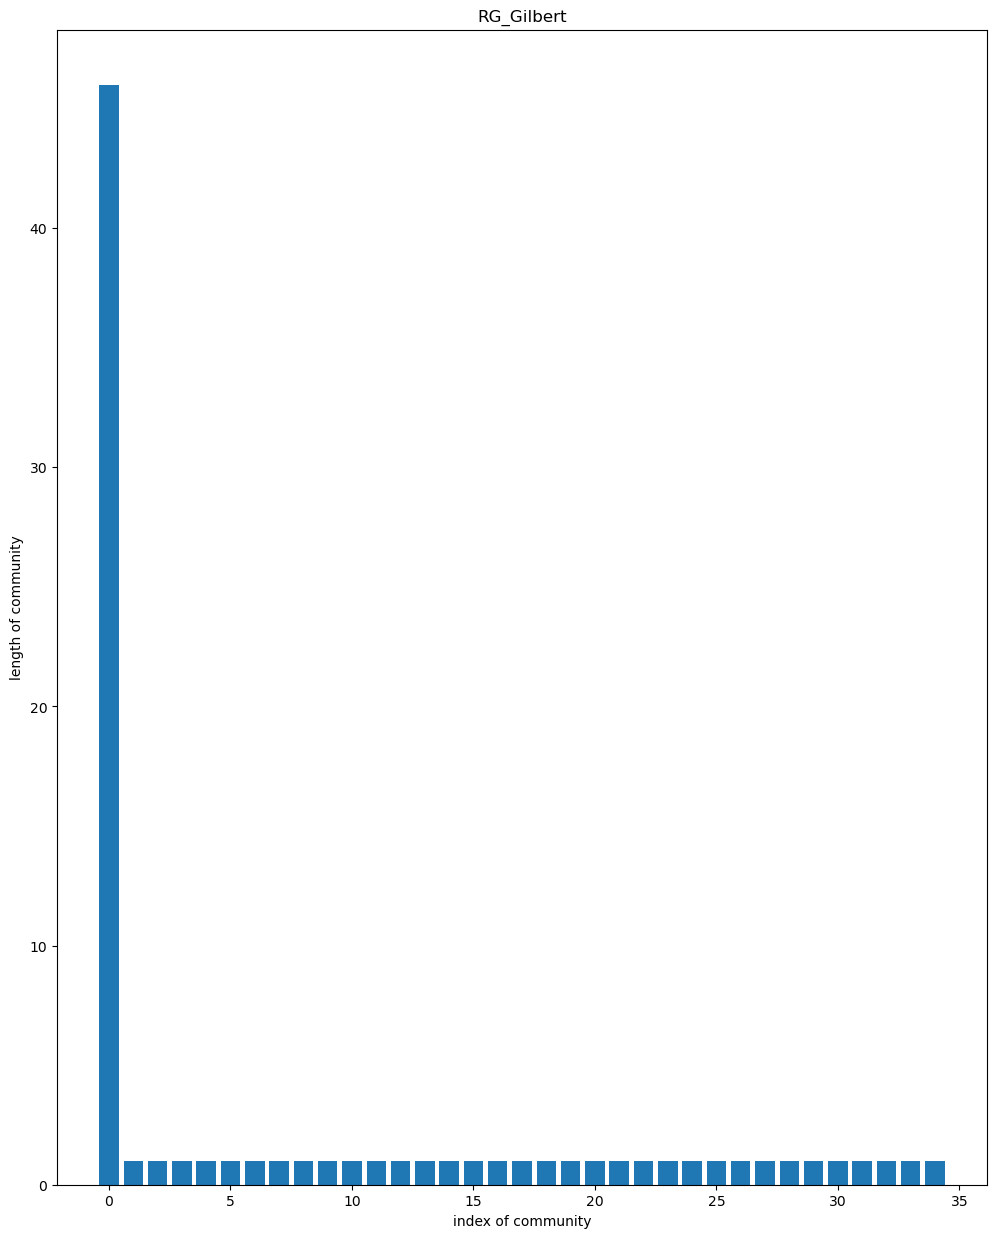

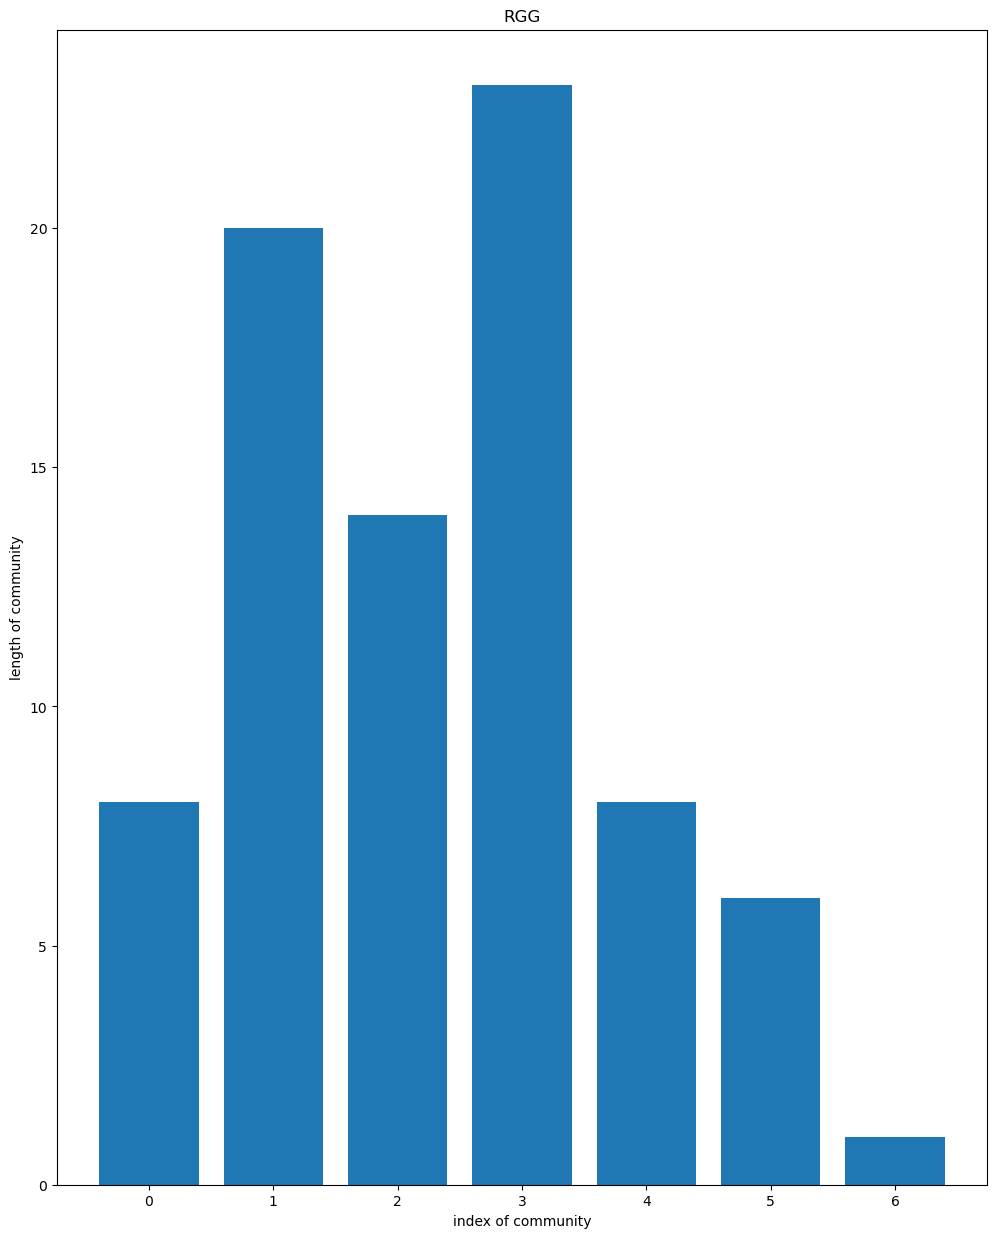

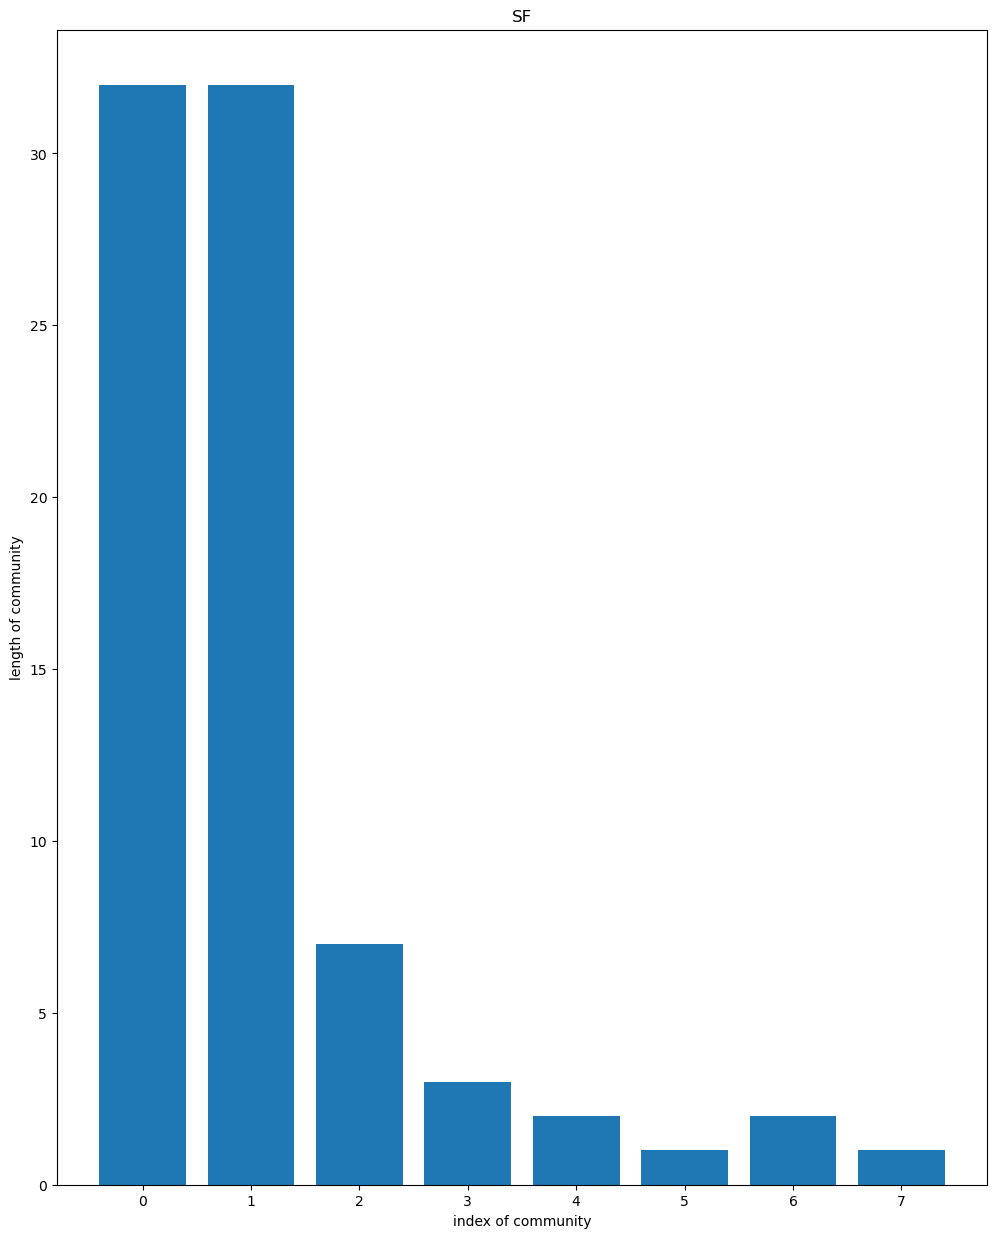

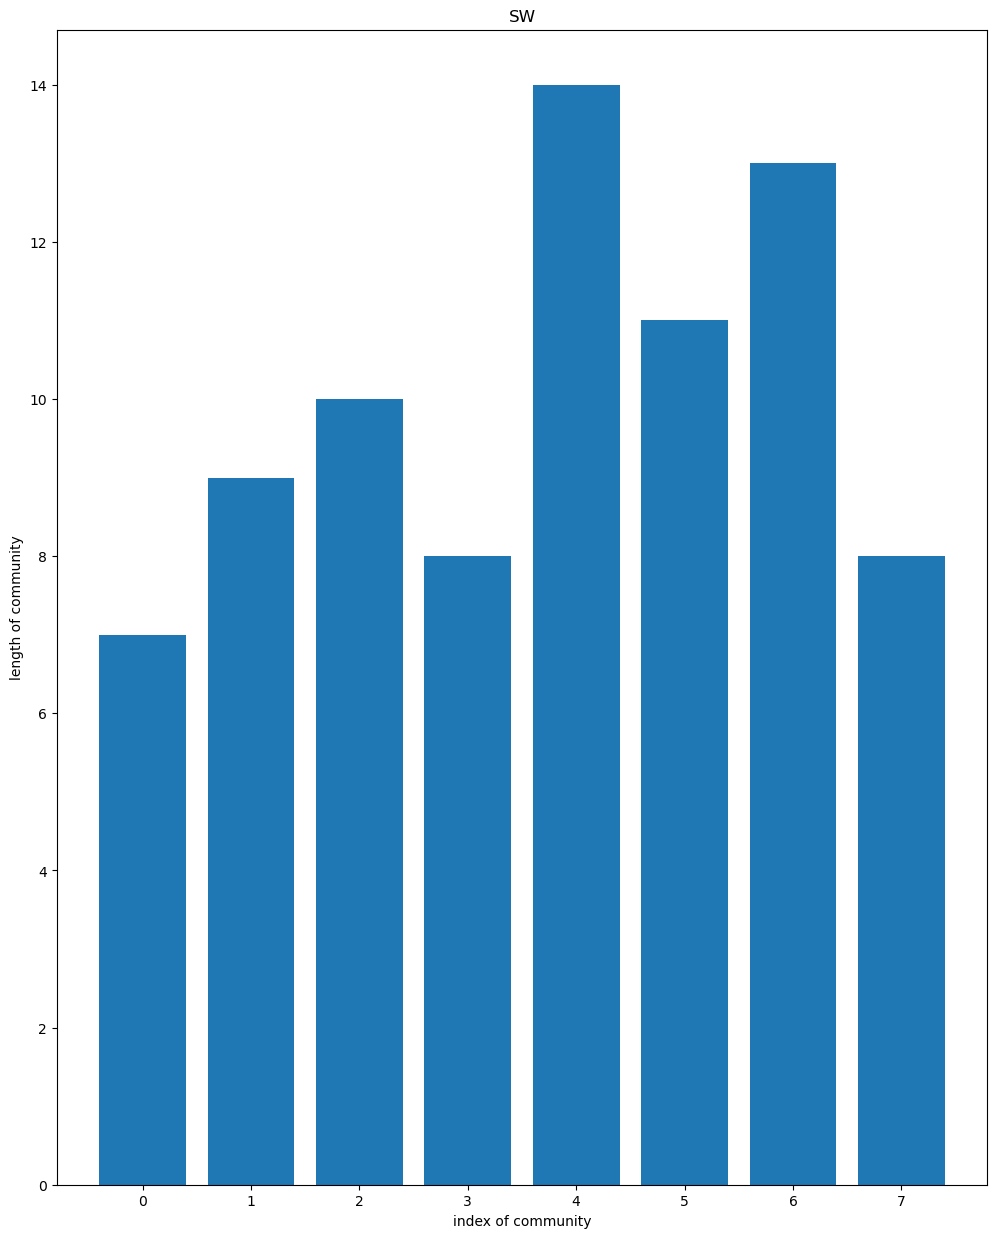

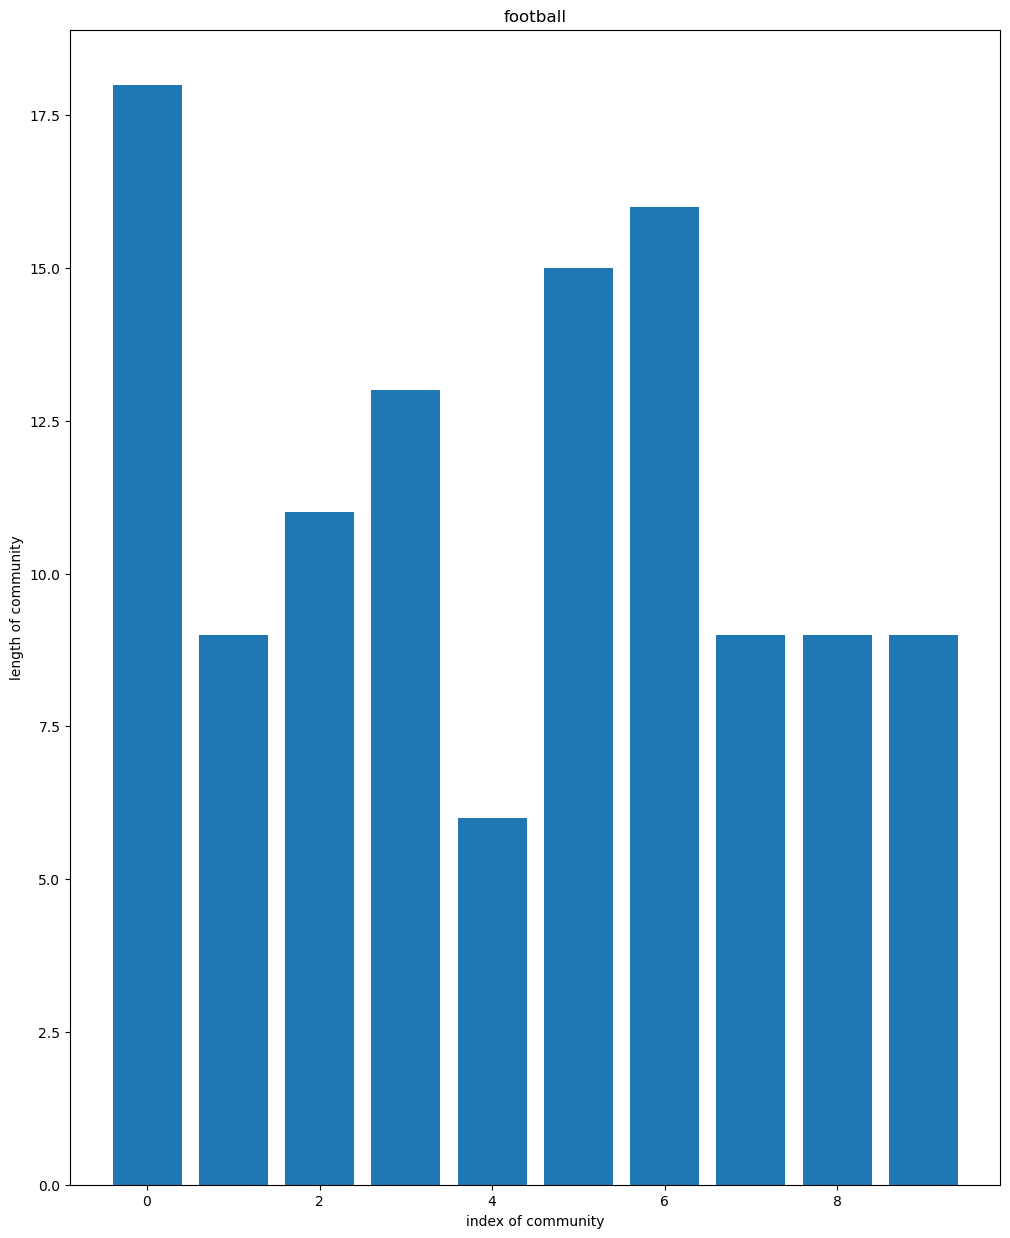

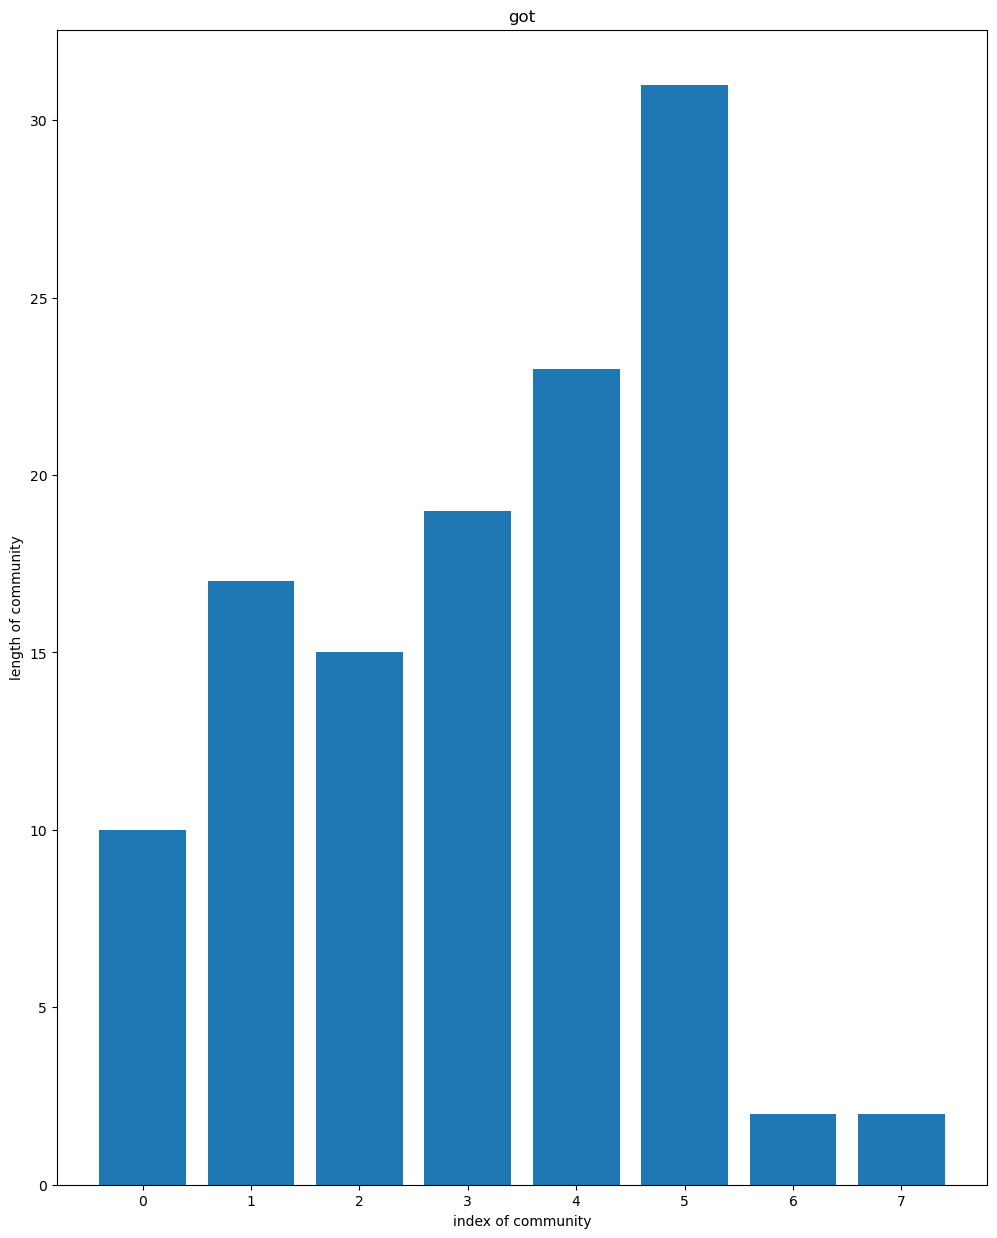

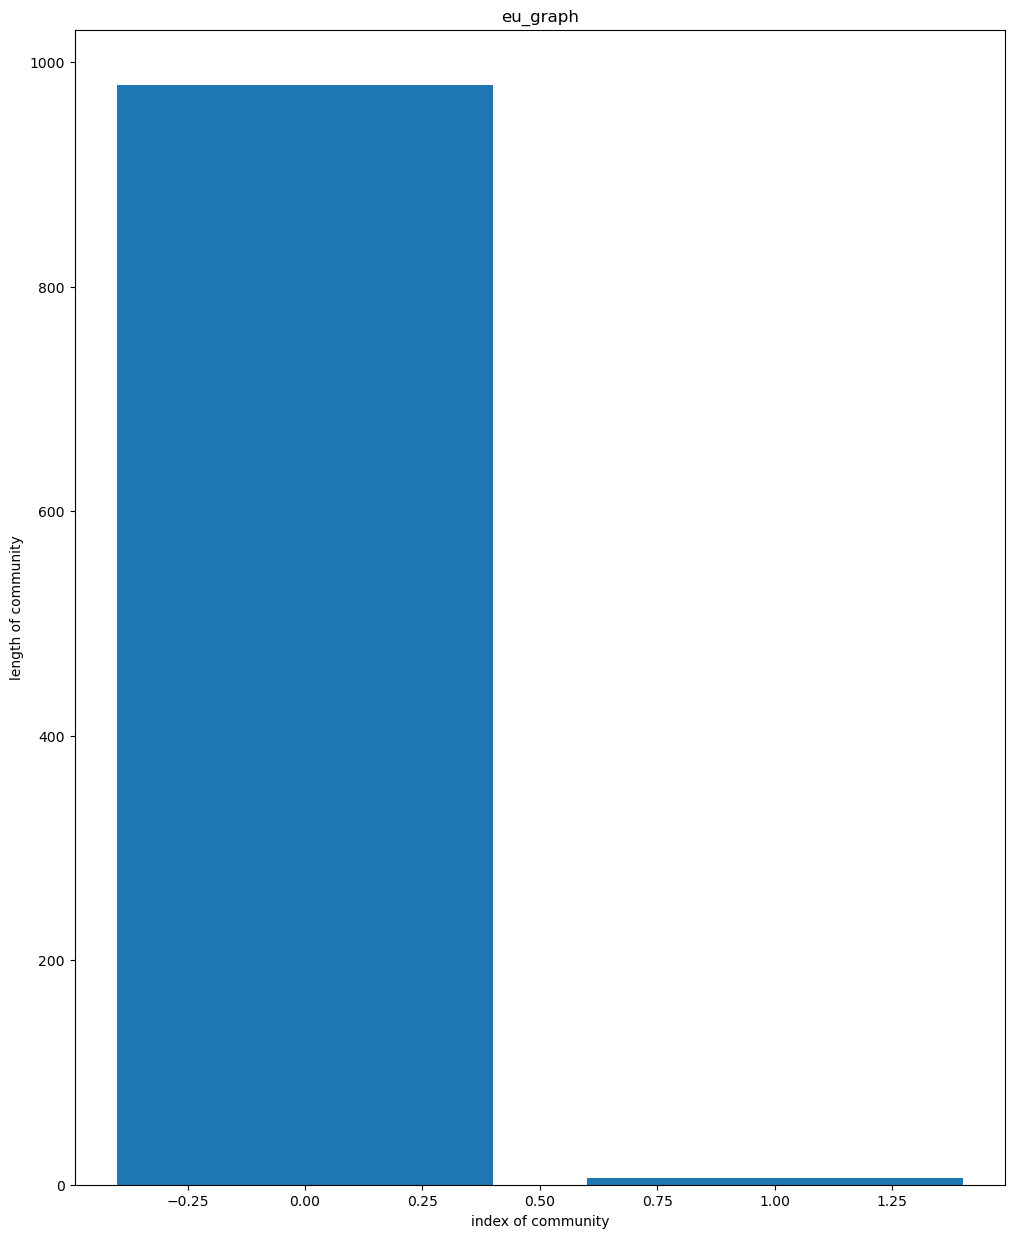

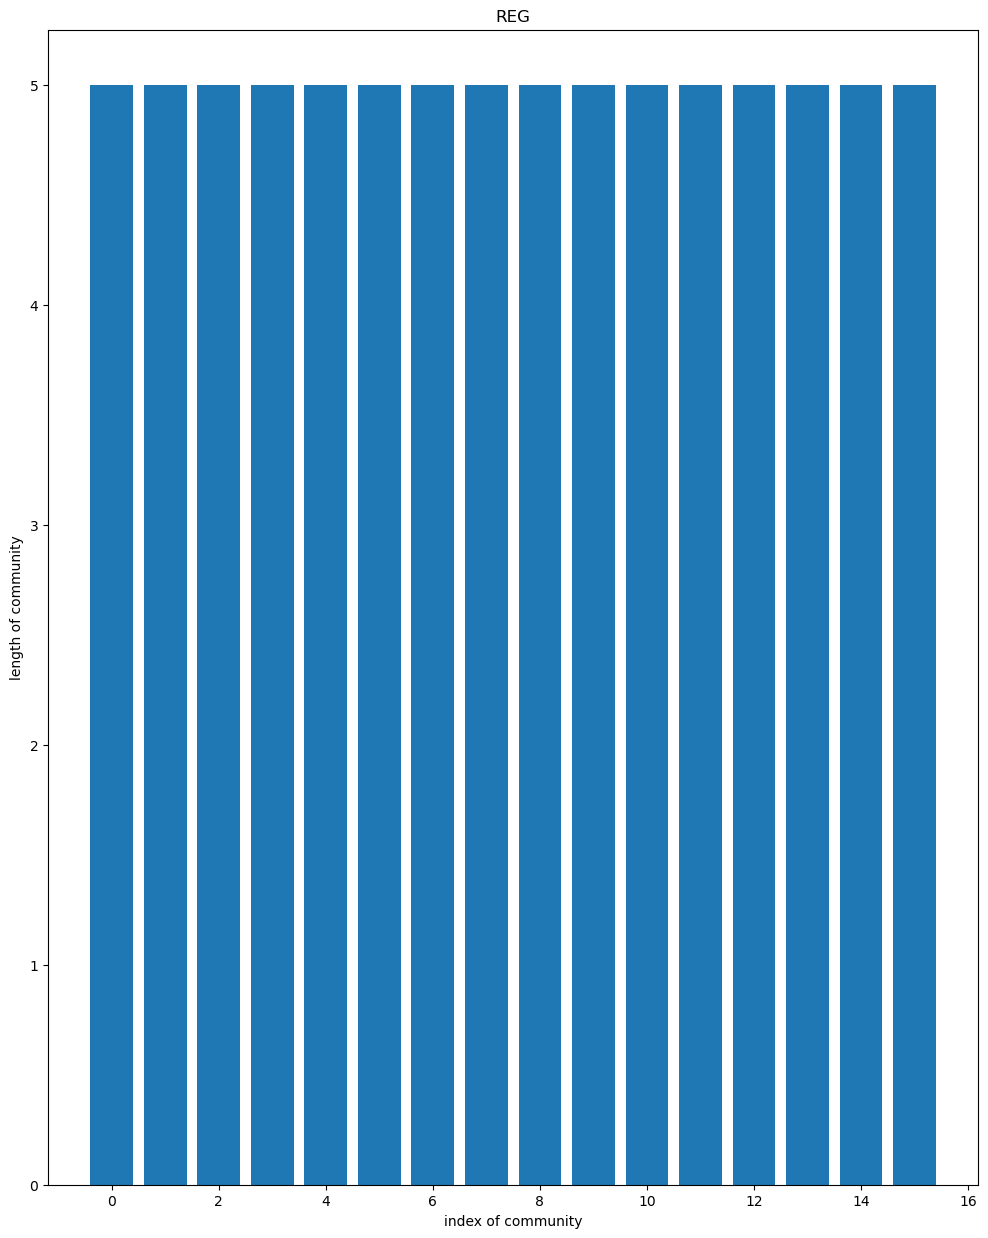

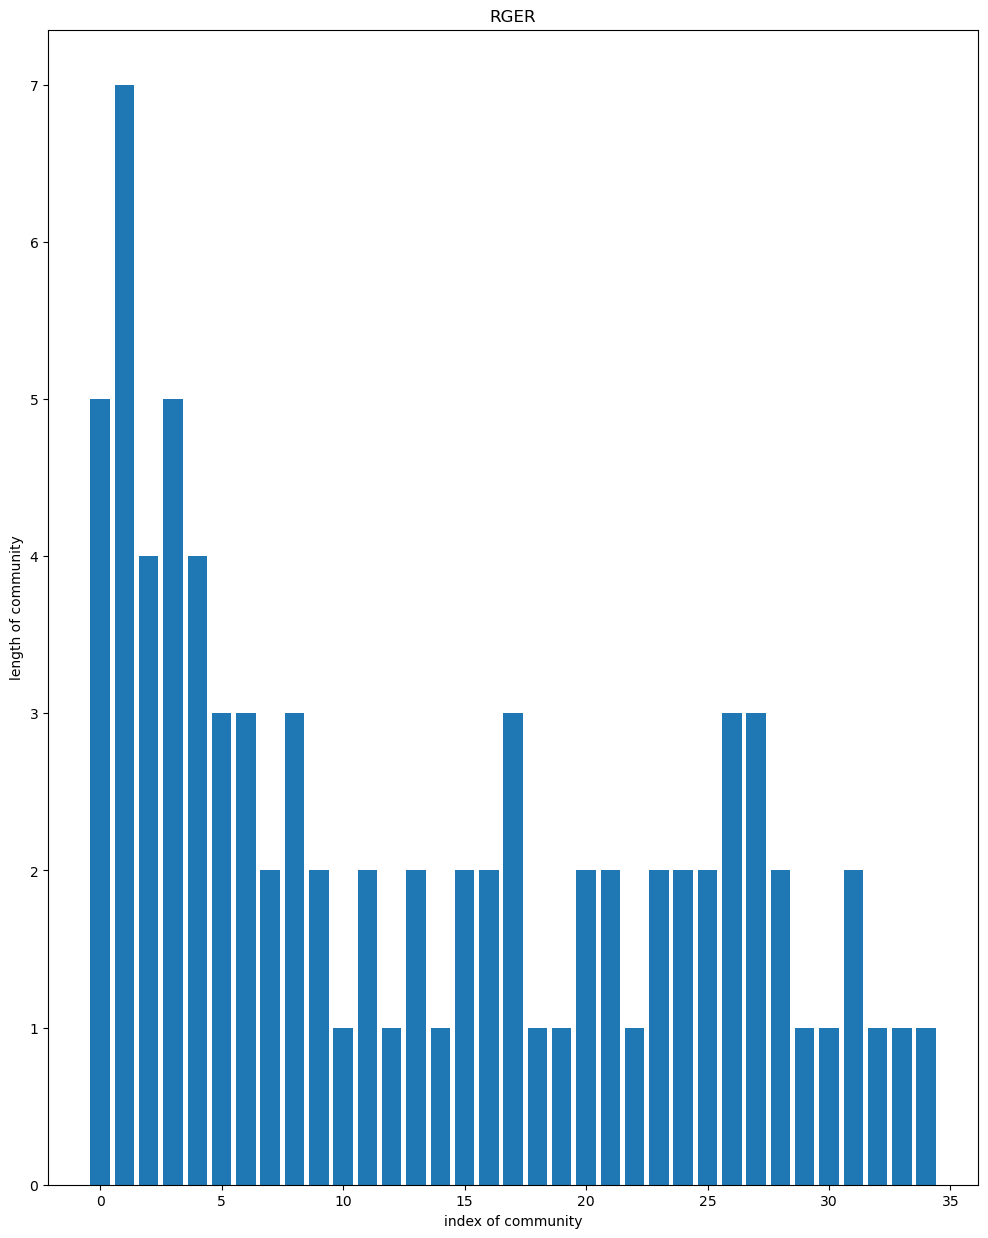

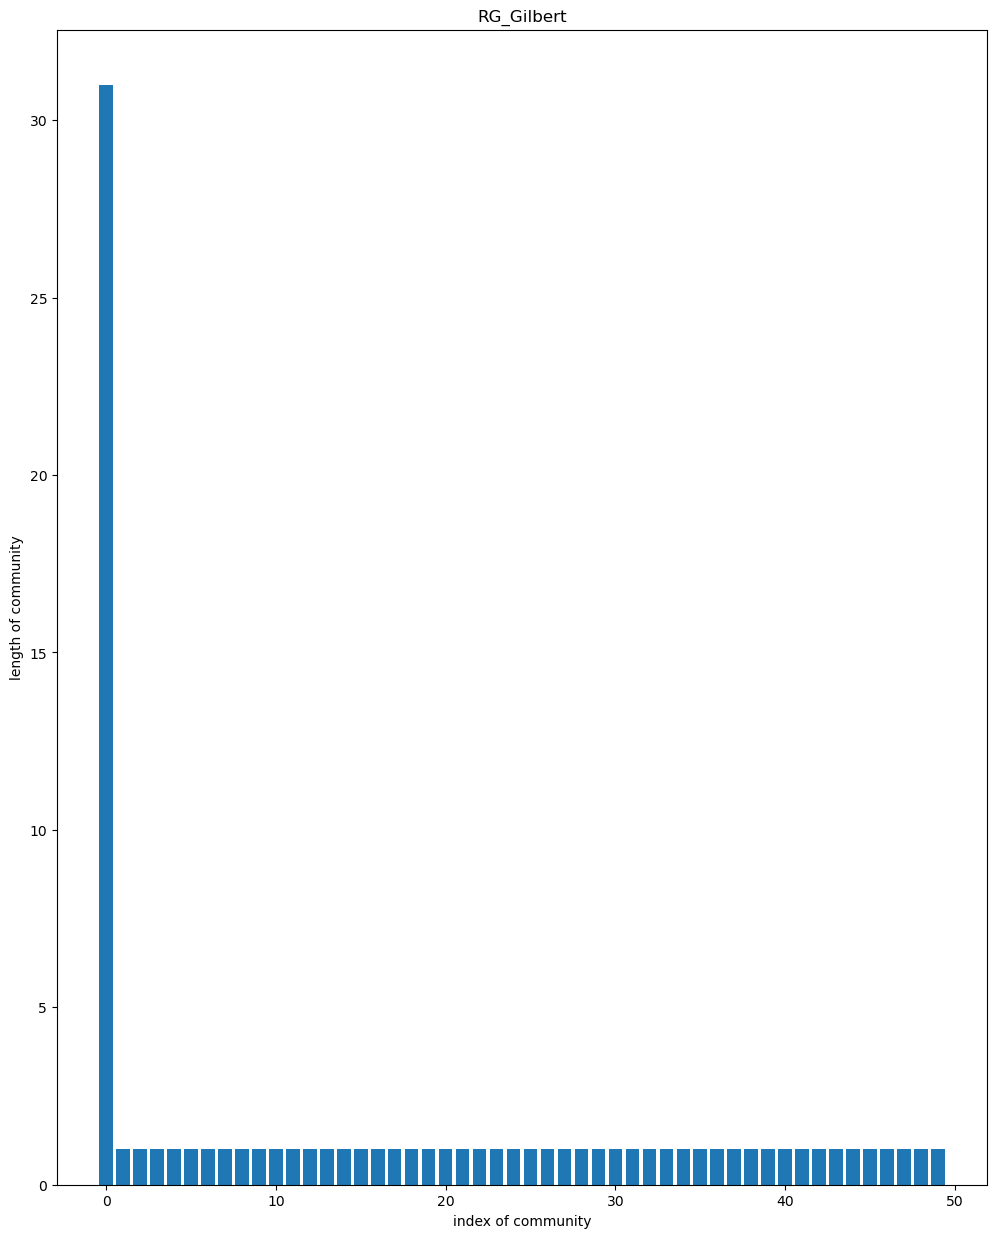

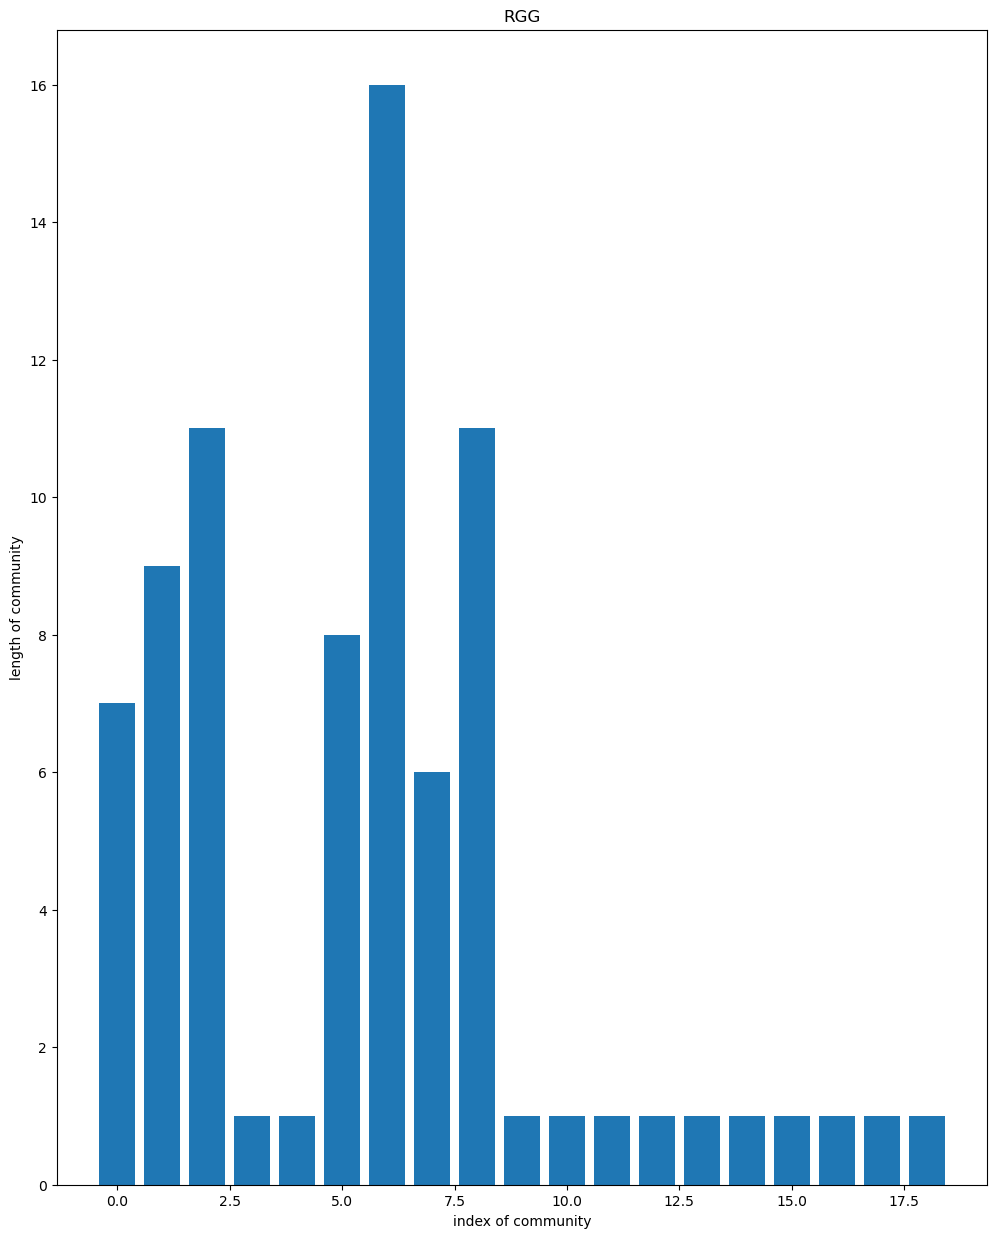

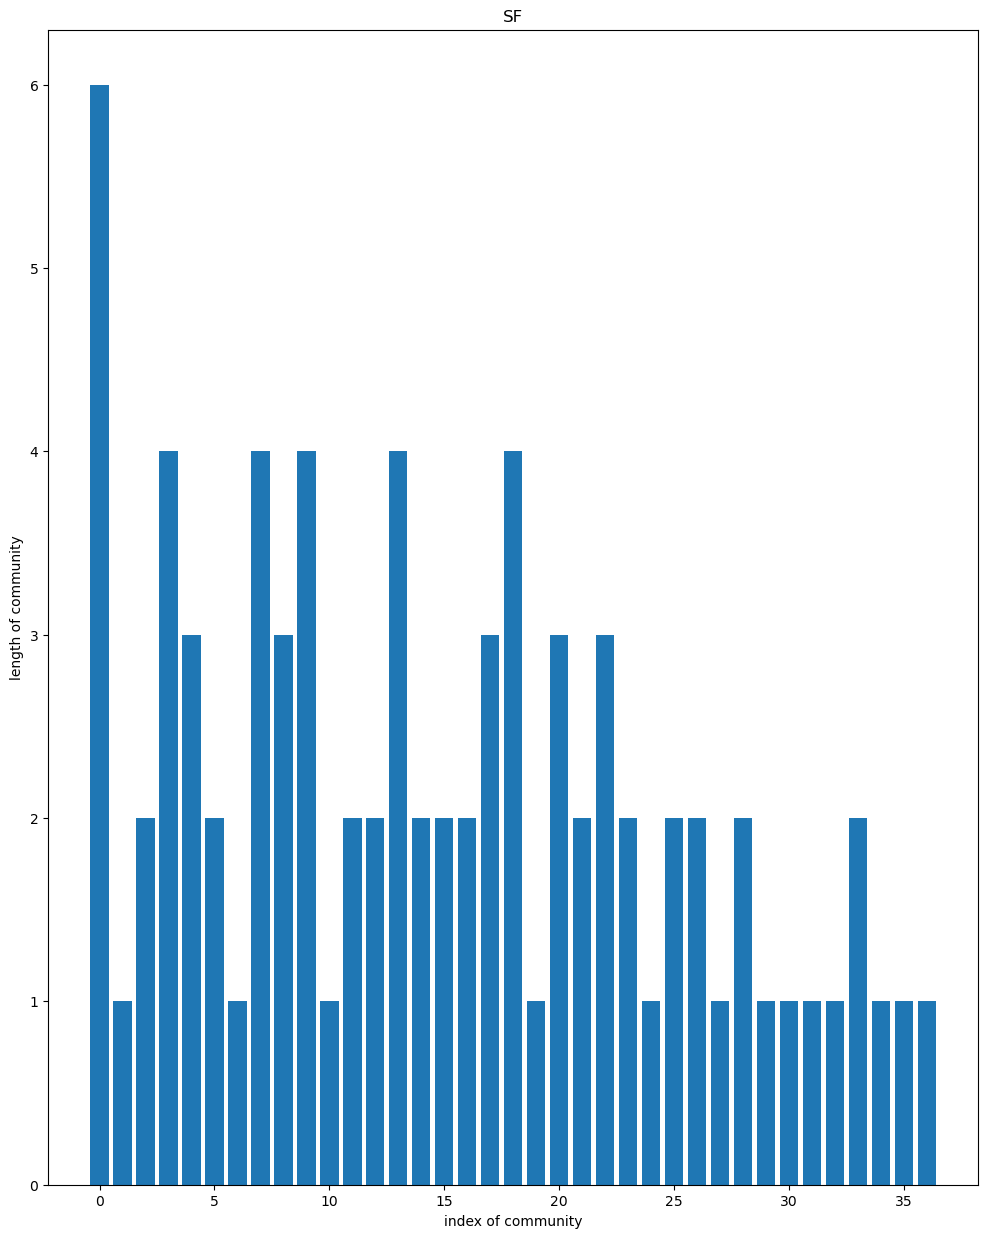

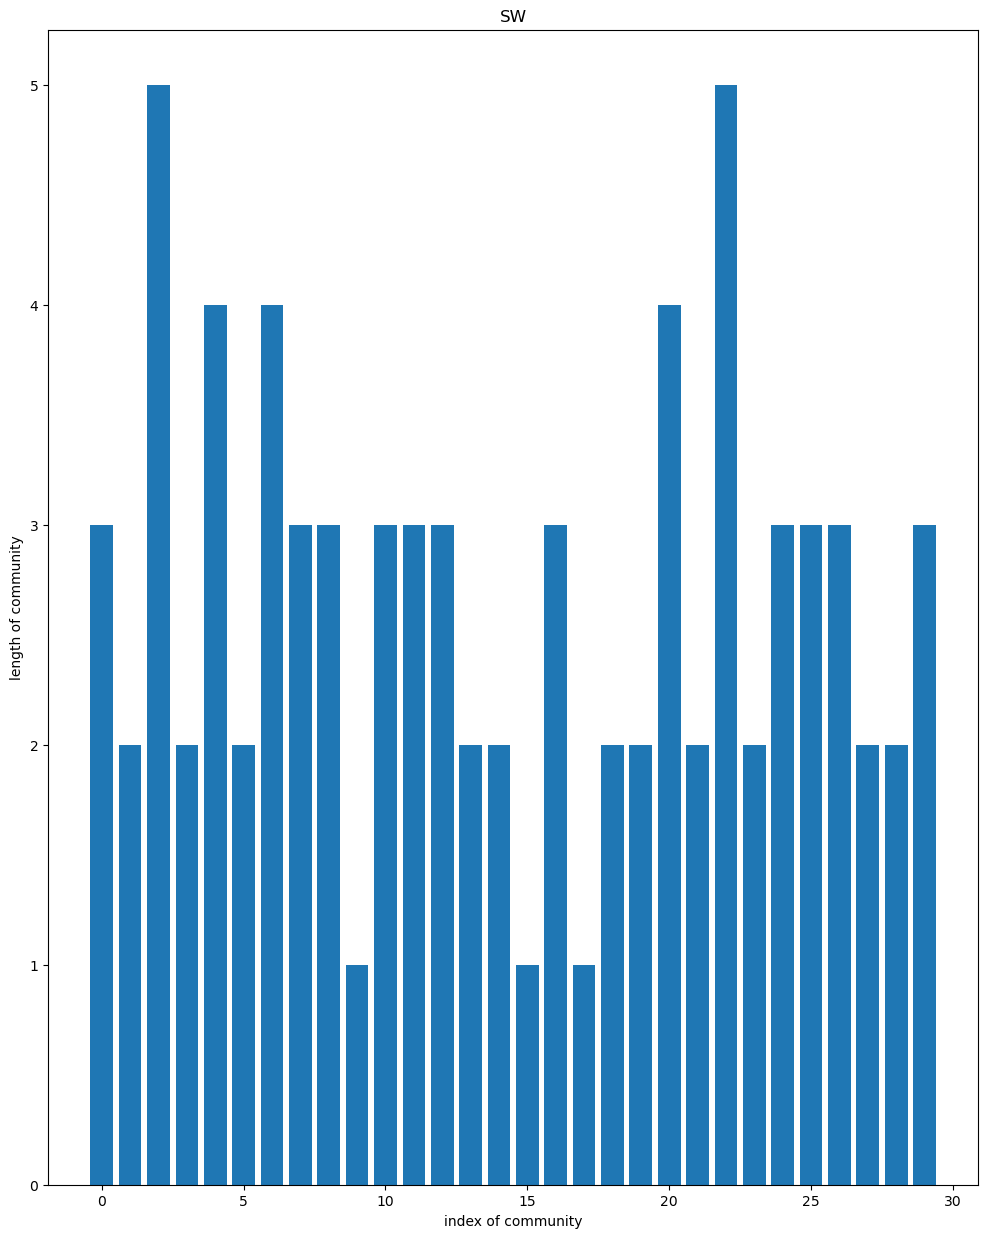

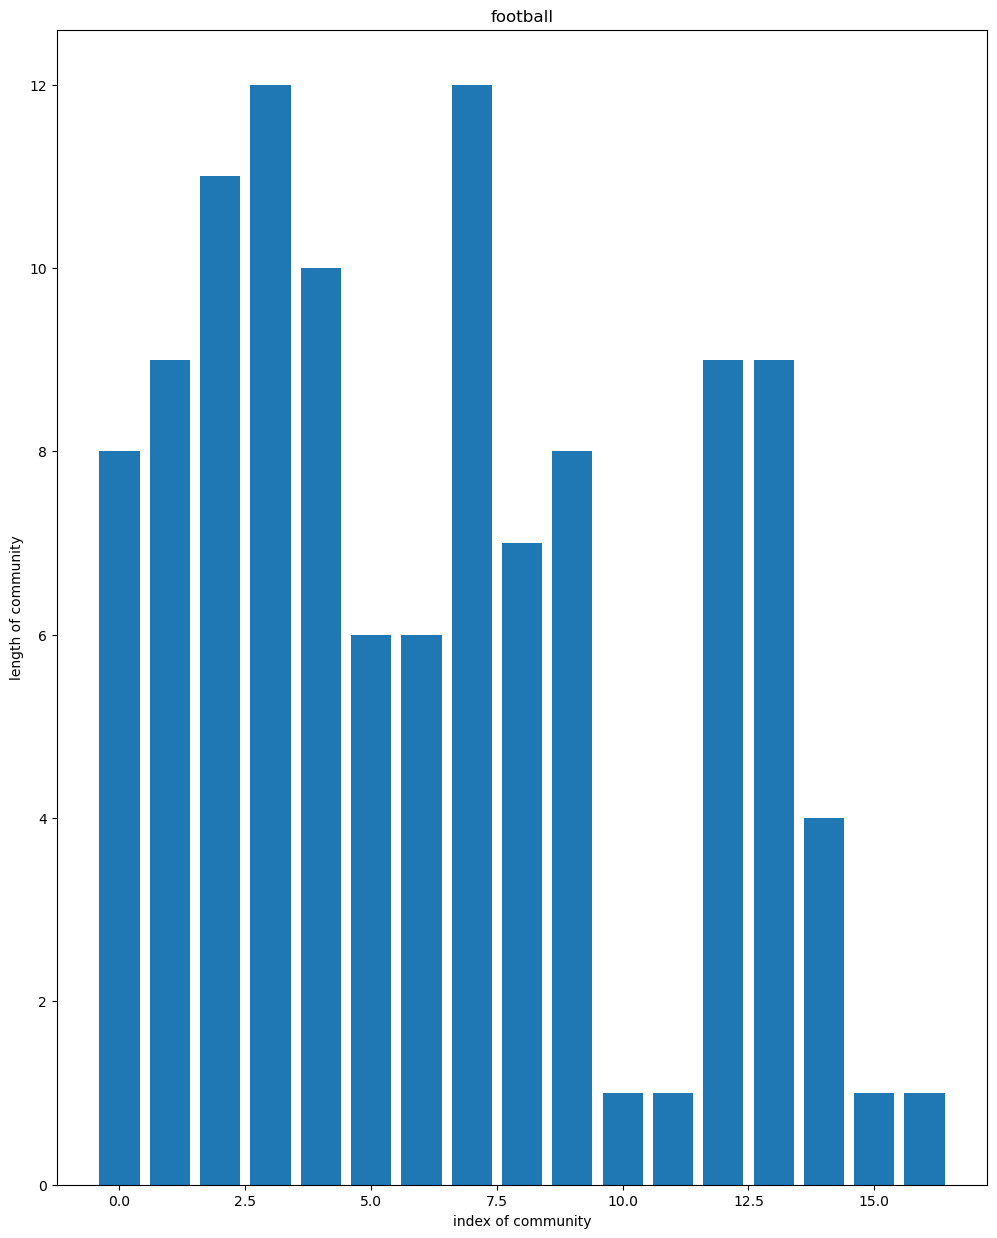

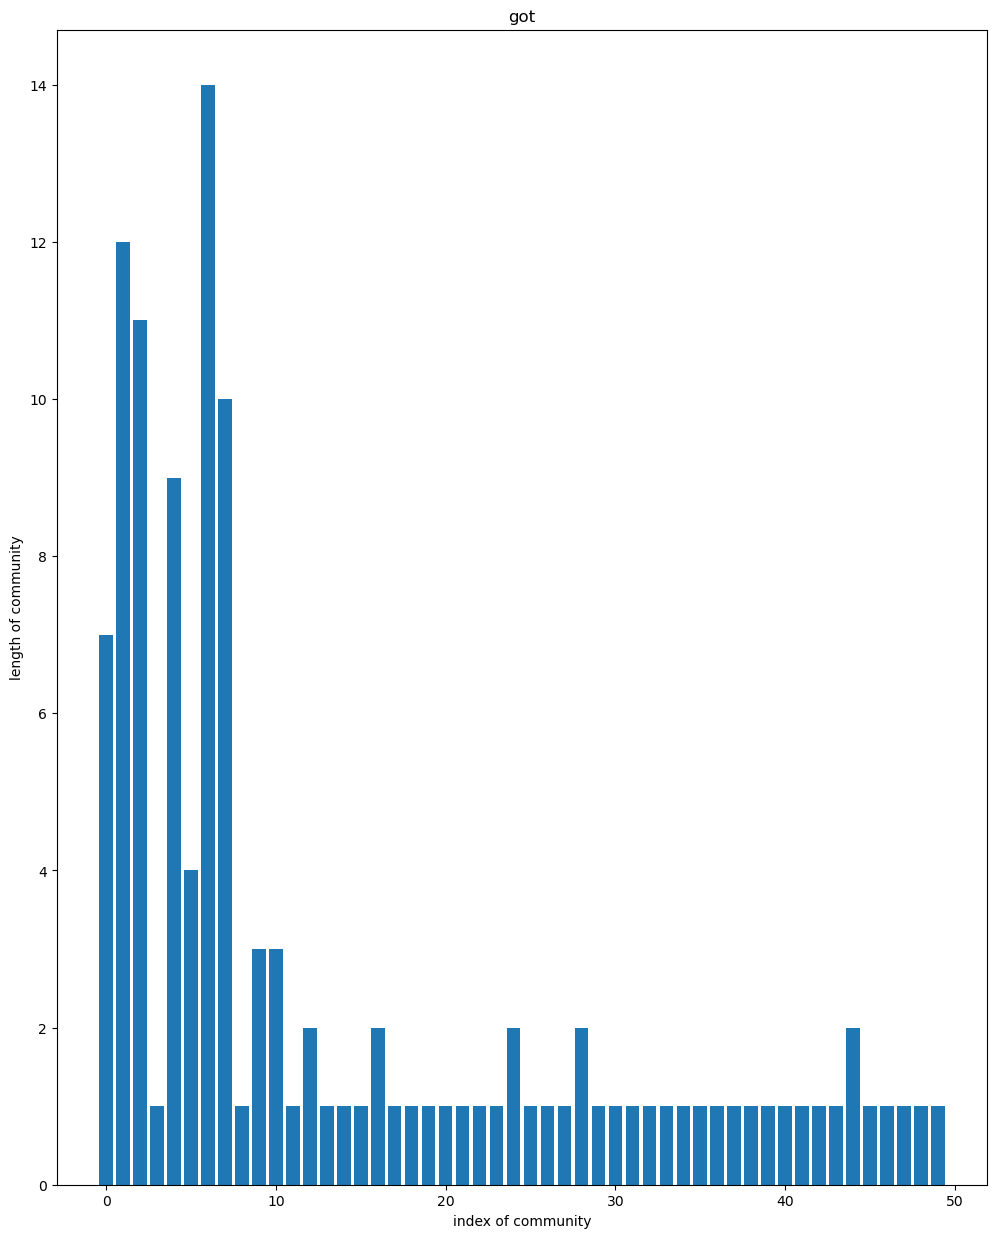

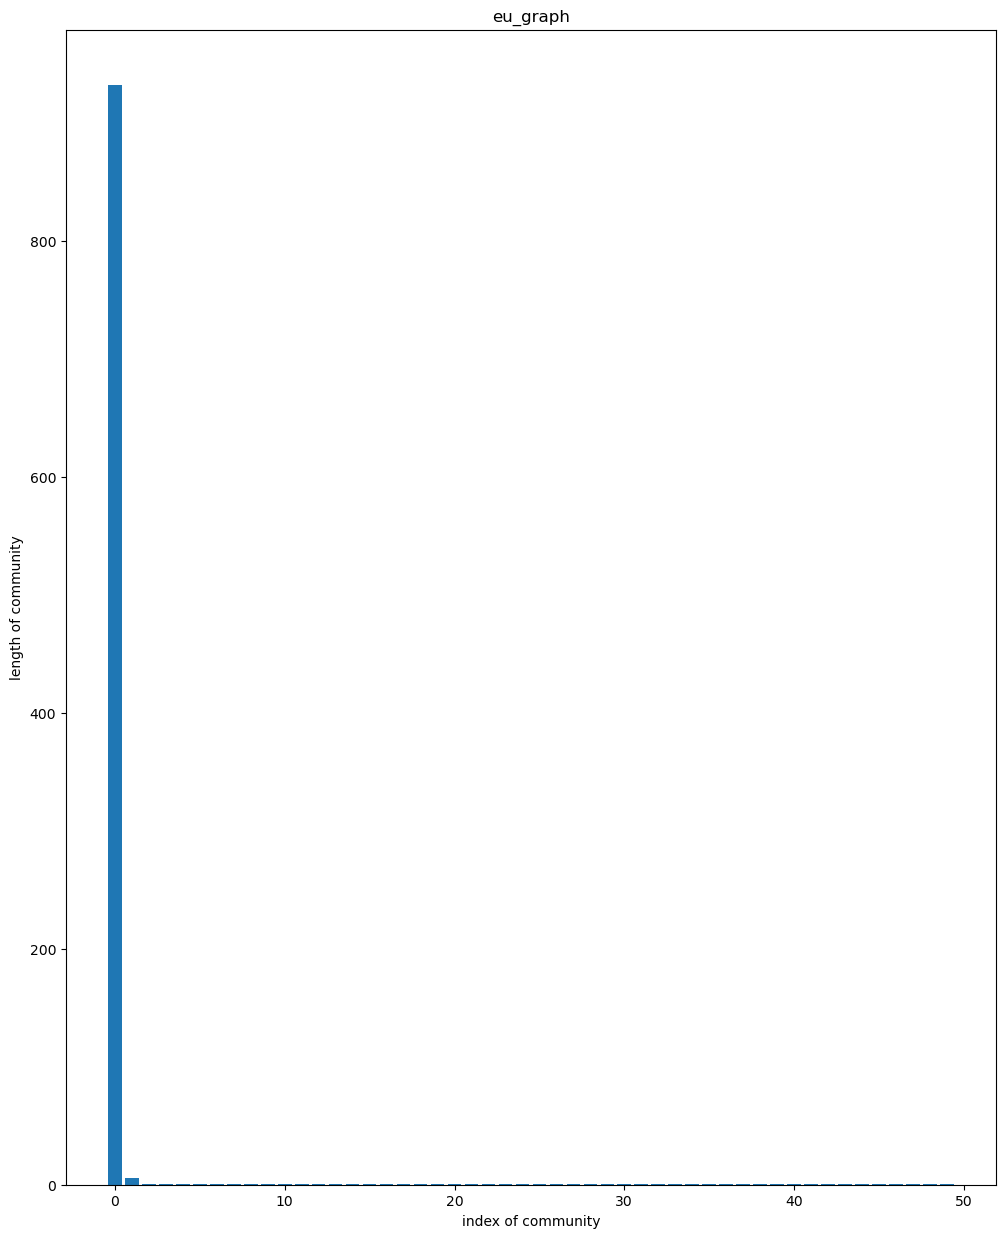

In [145]:
modularity_pick=[]
performance_pick=[]
for i in range(0,len(names)):
    modularity_pick.append(all_partitions[i][modularity_index[i]])
    performance_pick.append(all_partitions[i][performance_index[i]])
#αριθμός κοινοτητων ανα διαμέριση
#for i in range(0,len(names)):
#    communities_count=[]
#    for j in range(0,len(all_partitions[i])):
#        communities_count.append(len(all_partitions[i][j]))
#    plt.title(names[i])
#    plt.xlabel("number of partition")
#    plt.ylabel("communities")
#    plt.bar(range(len(all_partitions[i])),communities_count)
#    plt.show()
#μέγεθος κοινοτητων ανα γράφο για διαμερίσεις με μέγιστο modularity score και performance score 
communities_length_for_maximum_modularity_partitions=[]
for i in range(0,len(names)):
    dictio={}
    length=[]
    for j in range(0,len(modularity_pick[i])):
        length.append(len(modularity_pick[i][j]))
    communities_length_for_maximum_modularity_partitions.append(length)
    for f in range(0,len(graphs[i].nodes)):
        dictio[f]=0
    for k in range(0,len(modularity_pick[i])):
        for h in range(0,len(modularity_pick[i][k])):
            index=modularity_pick[i][k][h]
            dictio[index]=dictio[index]+1
    plt.title(names[i])
    plt.xlabel("index of community")
    plt.ylabel("length of community")
    plt.bar(range(len(modularity_pick[i])),communities_length_for_maximum_modularity_partitions[i])
    plt.show()
communities_length_for_maximum_performance_partitions=[]
for i in range(0,len(names)):
    length=[]
    for j in range(0,len(performance_pick[i])):
        length.append(len(performance_pick[i][j]))
    communities_length_for_maximum_performance_partitions.append(length)
    plt.title(names[i])
    plt.xlabel("index of community")
    plt.ylabel("length of community")
    plt.bar(range(len(performance_pick[i])),communities_length_for_maximum_performance_partitions[i])
    plt.show()    

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος 50 του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,50$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [146]:
all_partitions1=[]
total_partition_time1=[]
for j in range(0,len(graphs)):
    length=[]
    start_time=time.time()
    for i in range(2,51):    
        matrix=nx.to_numpy_matrix(graphs[j])
        matrix=np.asarray(matrix)
        spcl=SpectralClustering(n_clusters=i,affinity="precomputed").fit(matrix)
        length.append(spcl.labels_)
    partition_time1=time.time()-start_time
    total_partition_time1.append(partition_time1)
    all_partitions1.append(length)
    


### Μετατροπή σε μορφή κατάλληλη για επεξεργασία 

In [147]:

eligible=[]
for i in range(0,len(names)):
    partition=[]
    for j in range(0,len(all_partitions1[i])):
        dictionary={}
        for m in range(0,j+2):
            dictionary[m]=[]
        for k in range(0,len(all_partitions1[i][j])):
            a=all_partitions1[i][j][k]
            dictionary[a].append(k)
        values=list(dictionary.values())
        partition.append(values)
    eligible.append(partition)
        
#for i in range(0,len(eligible)):
#    eligible[i].reverse()

### Υπολογισμός modularity, performance και συνολικού χρόνου 

REG  total time :  5.274759292602539


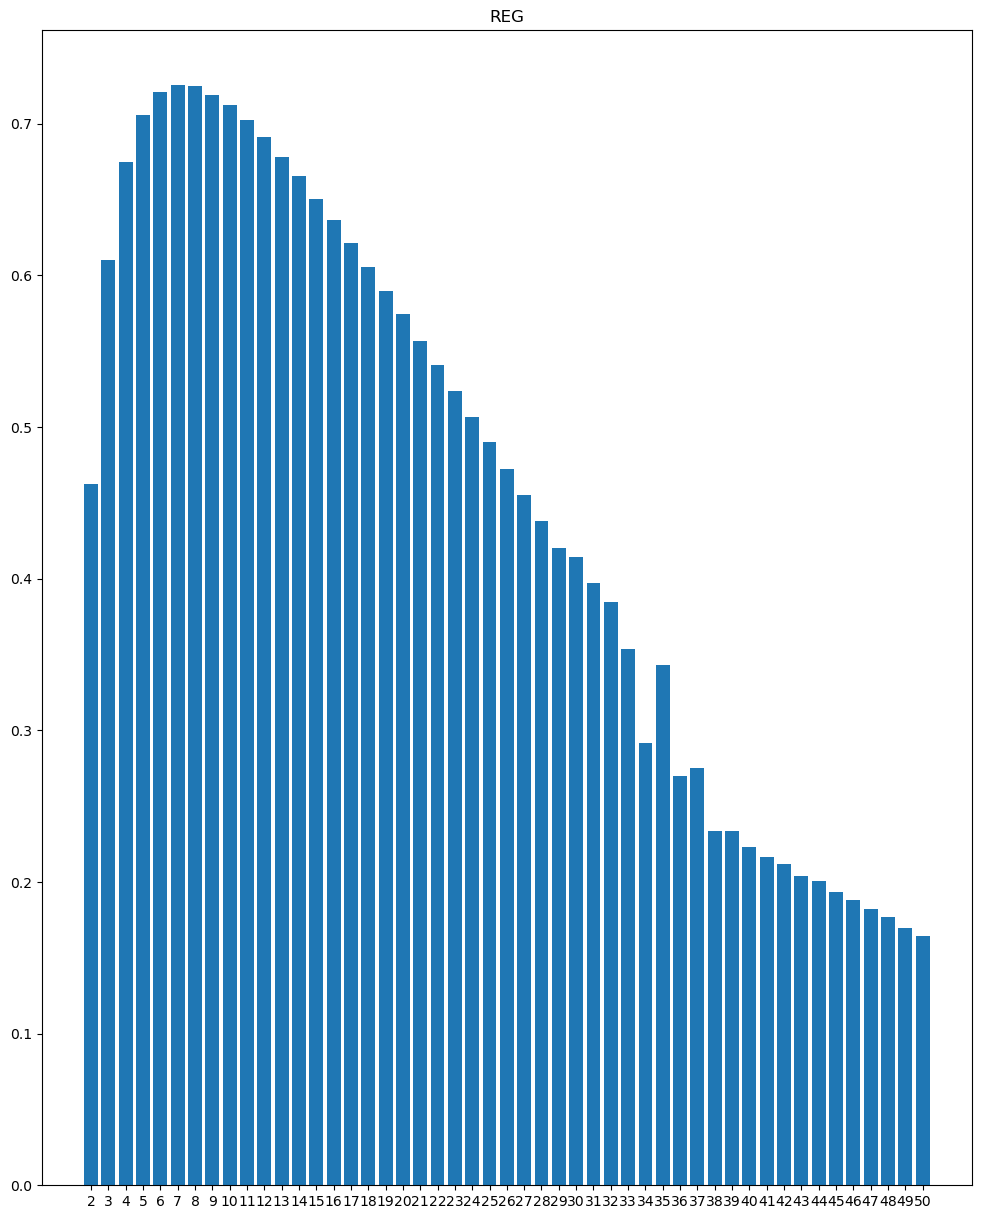

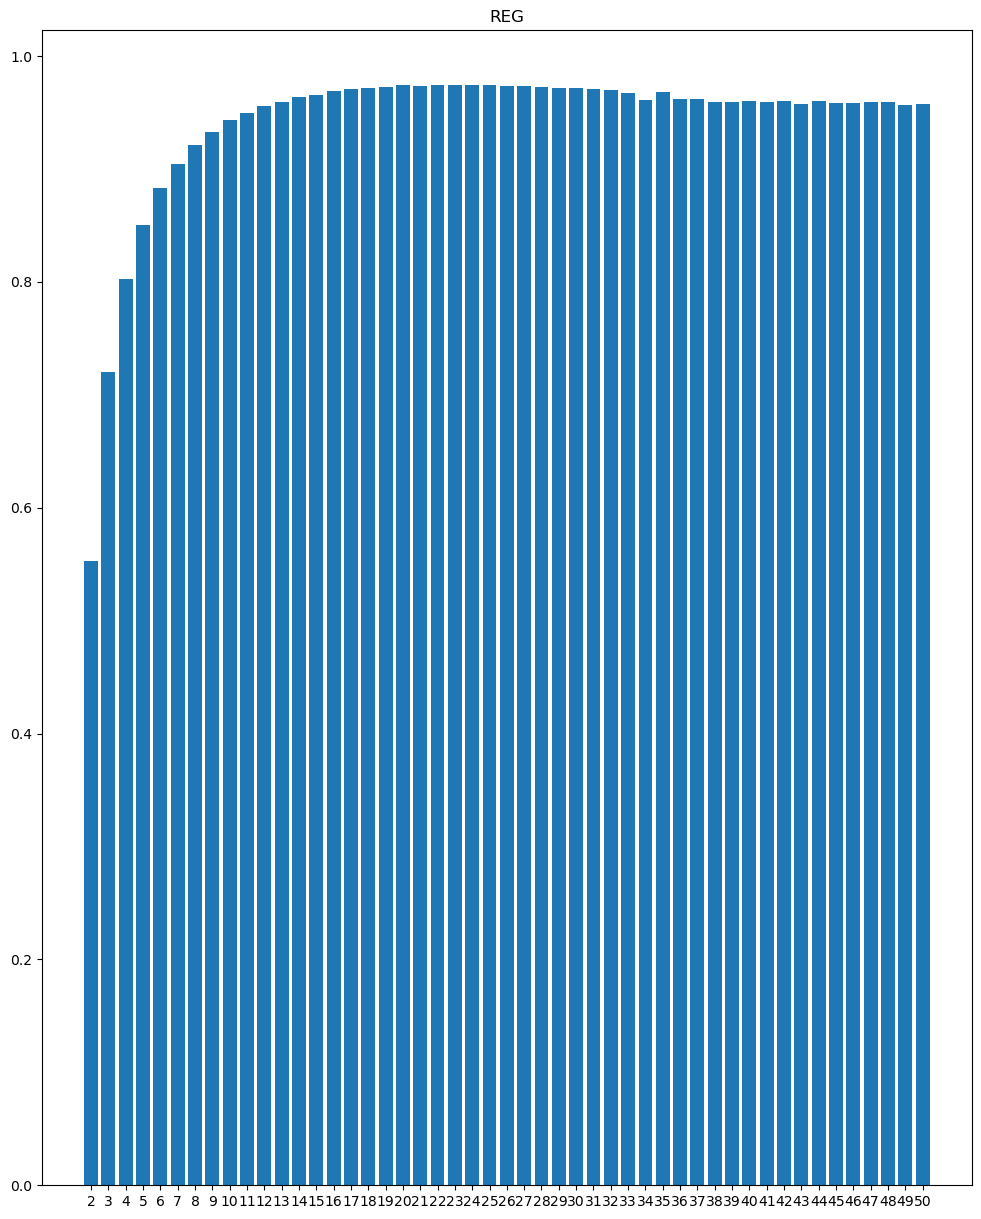

RGER  total time :  4.979414463043213


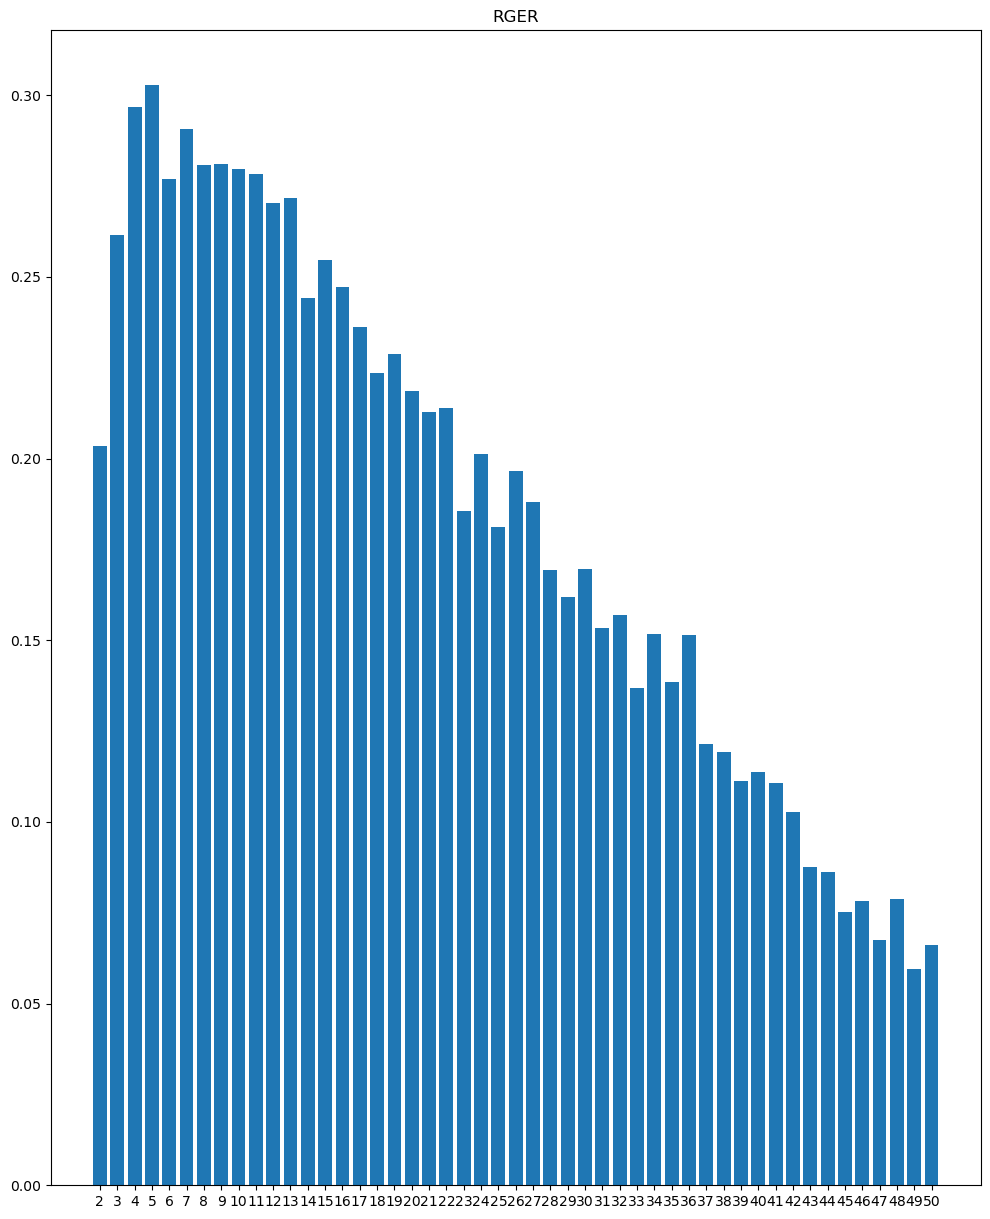

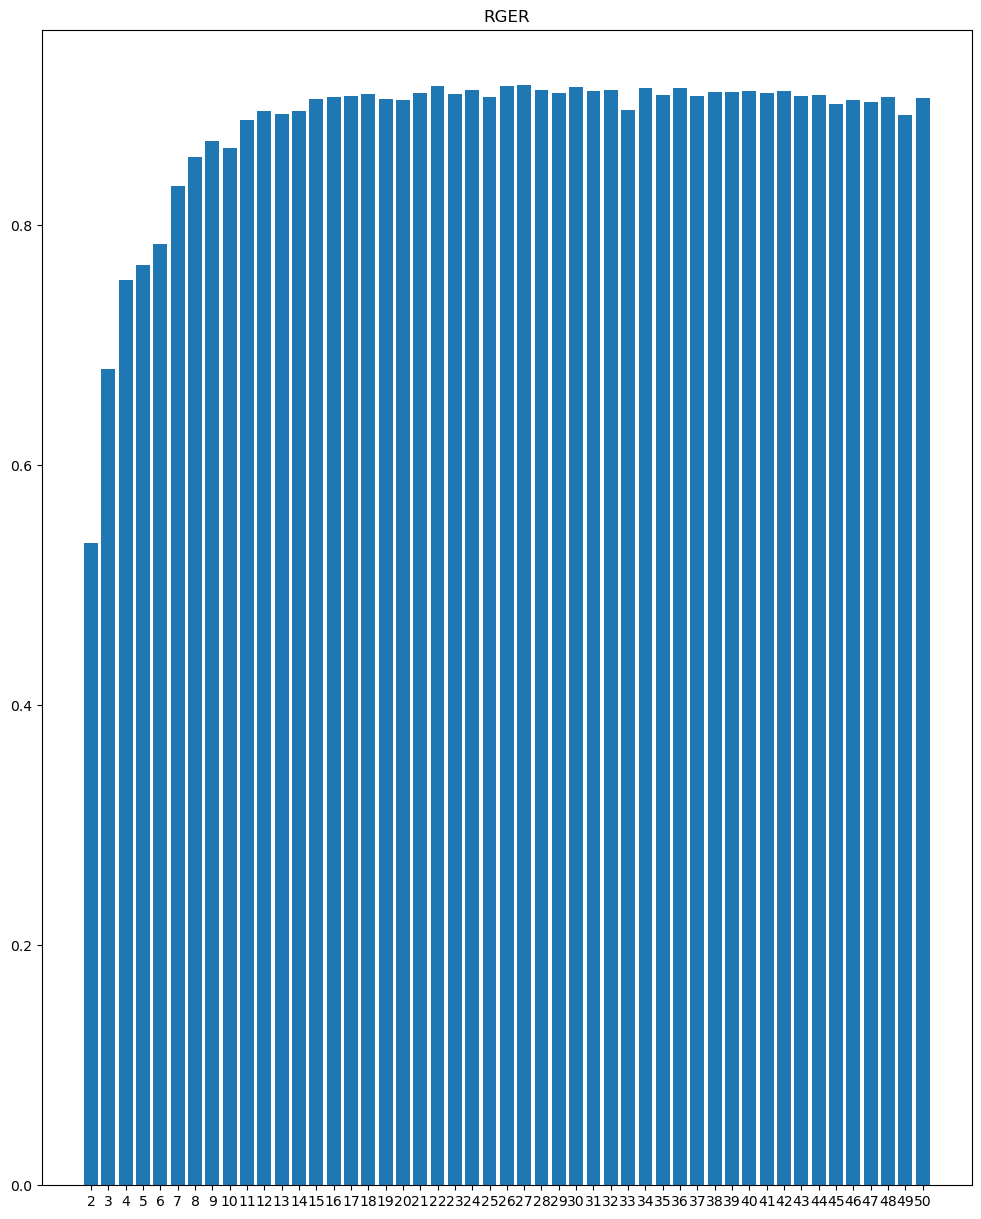

RG_Gilbert  total time :  5.119217157363892


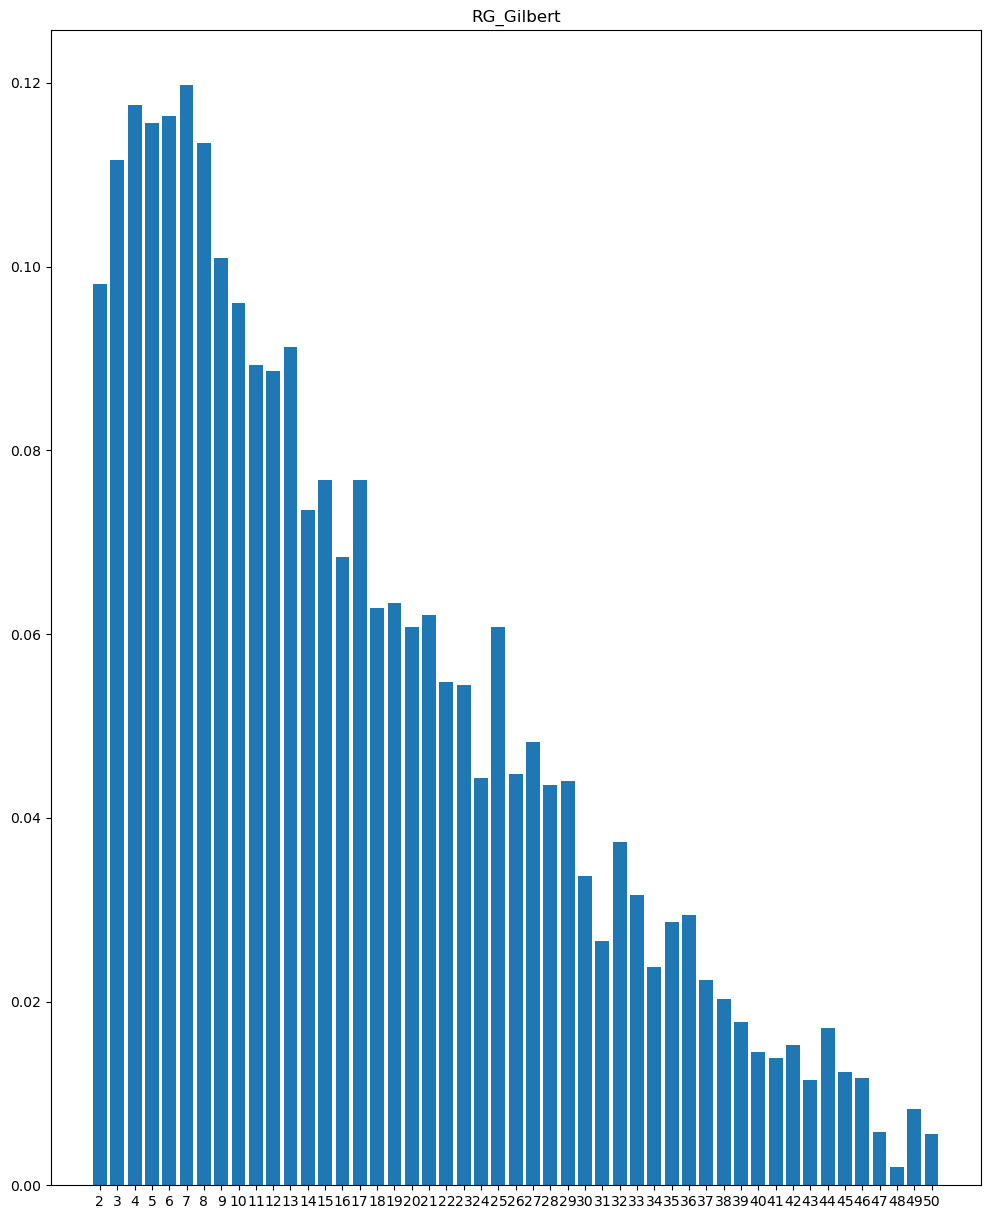

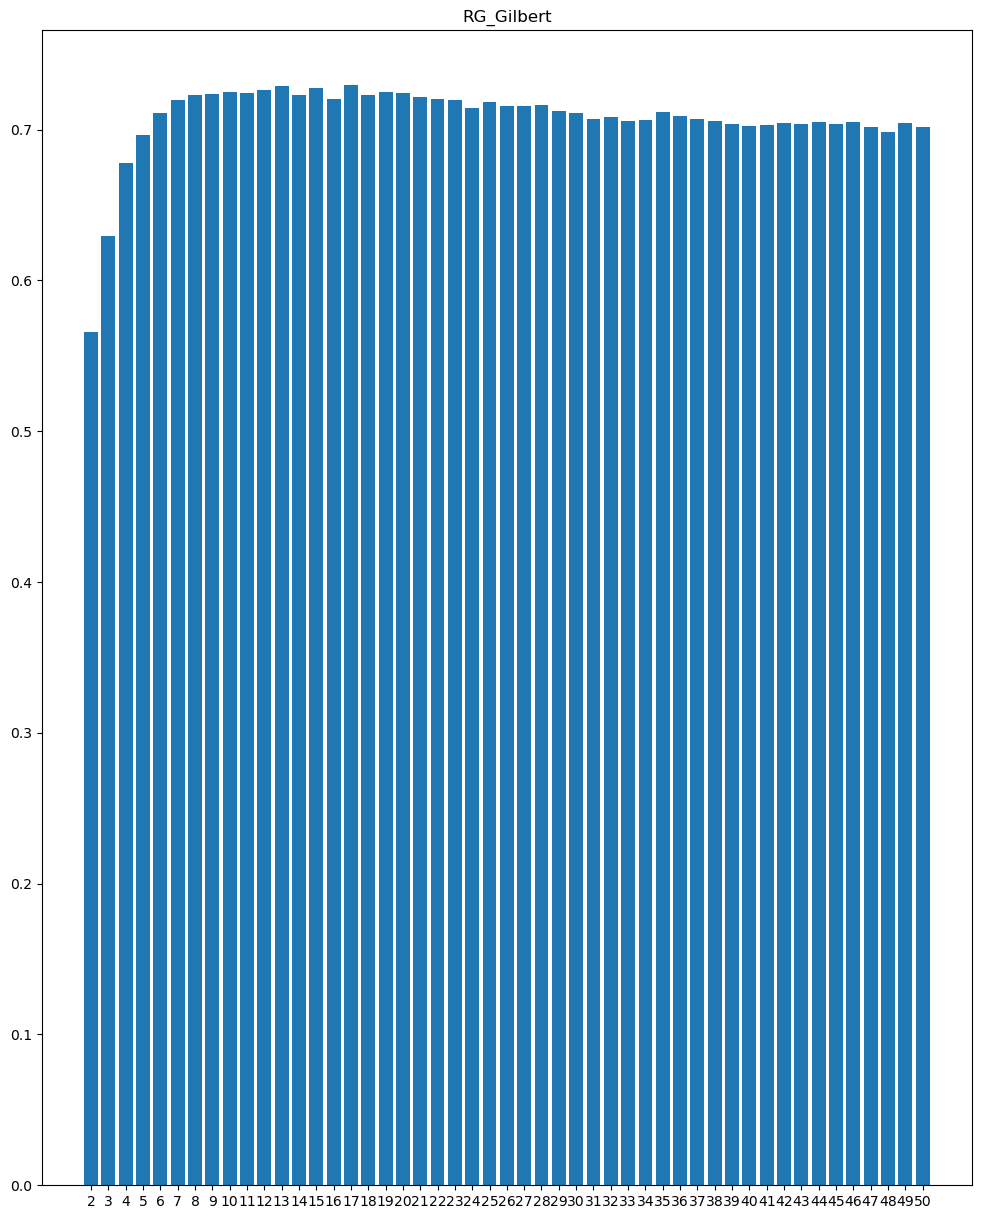

RGG  total time :  4.967926502227783


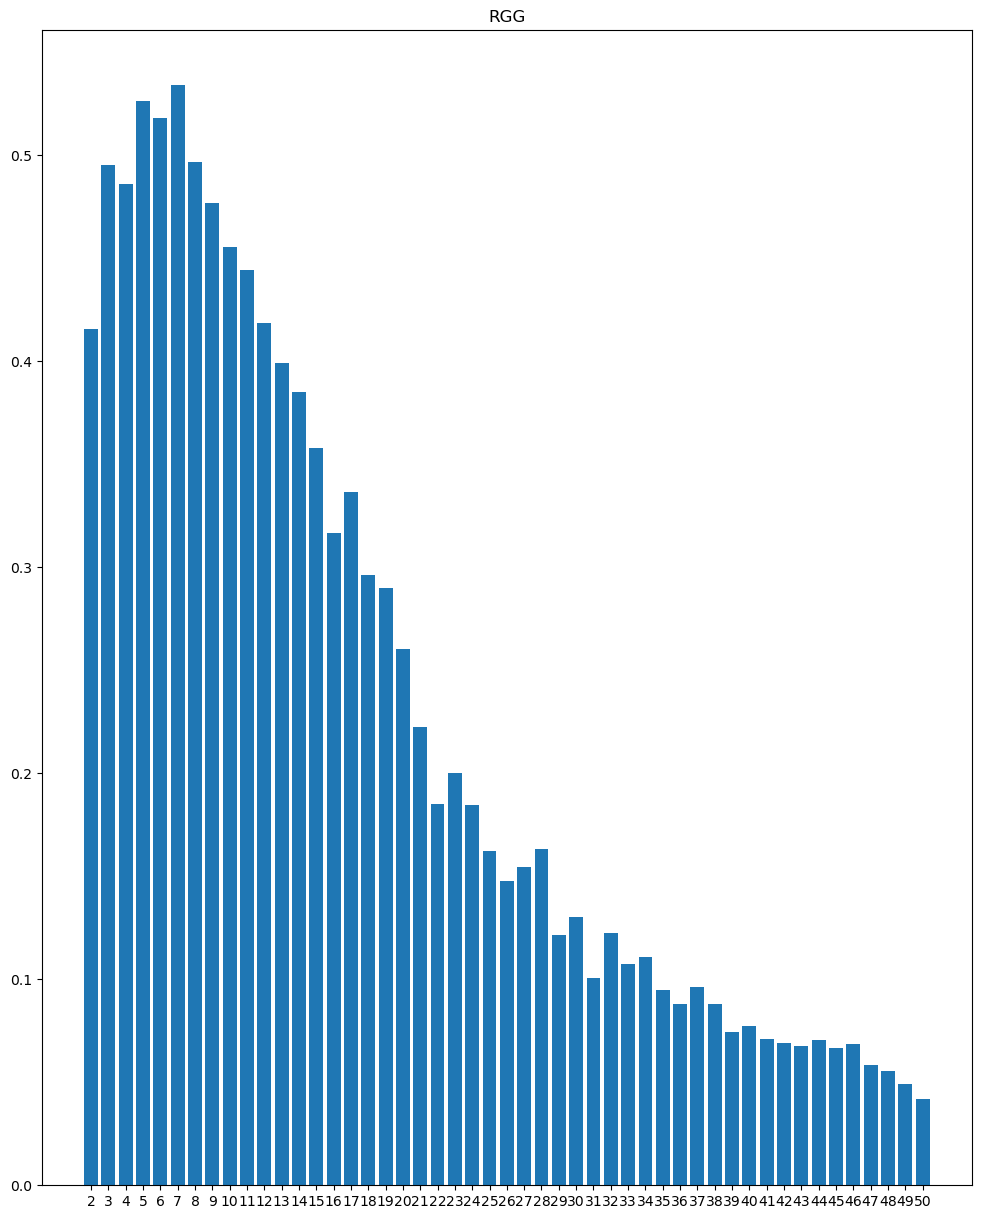

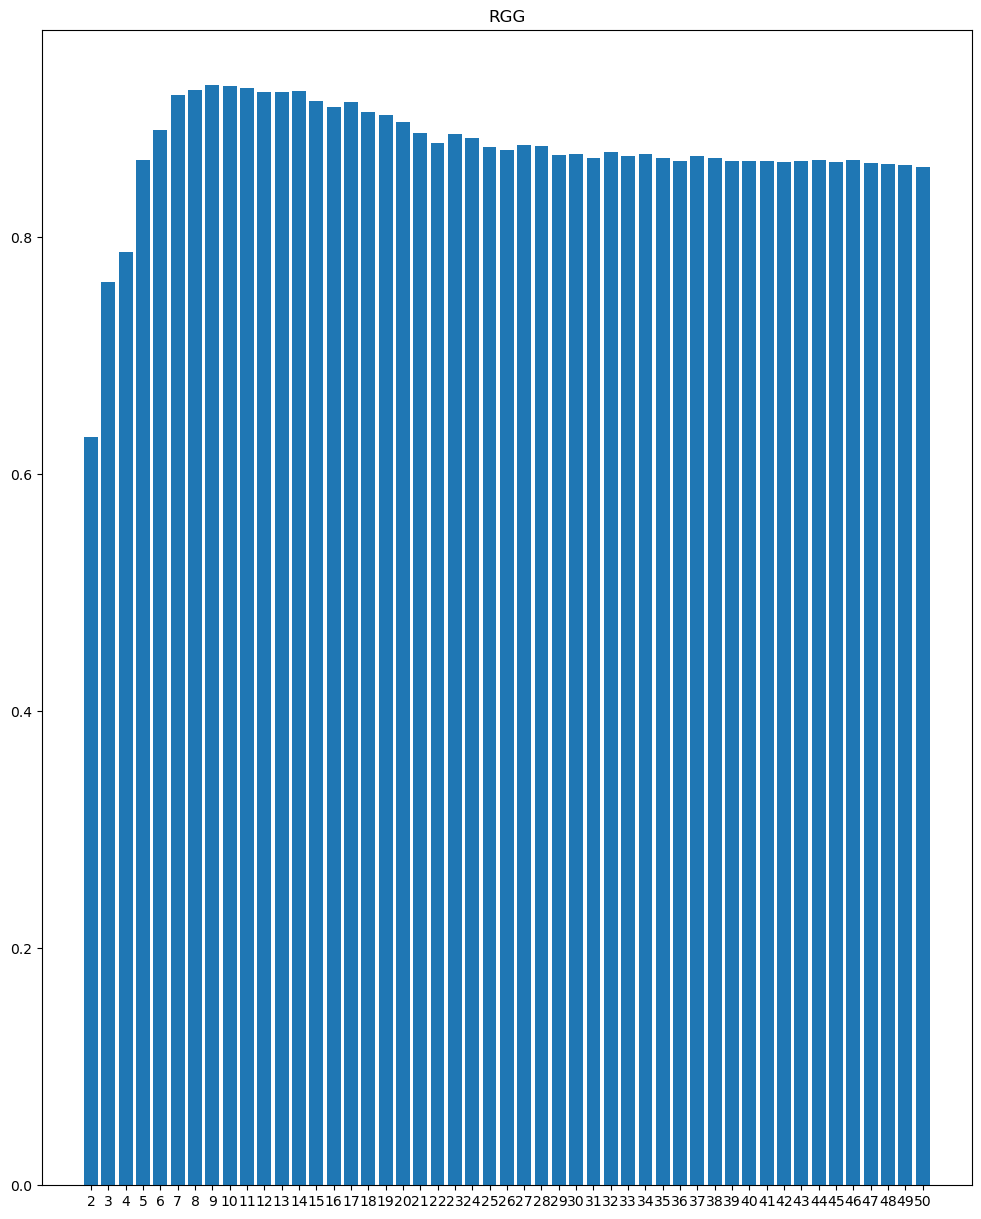

SF  total time :  5.533862352371216


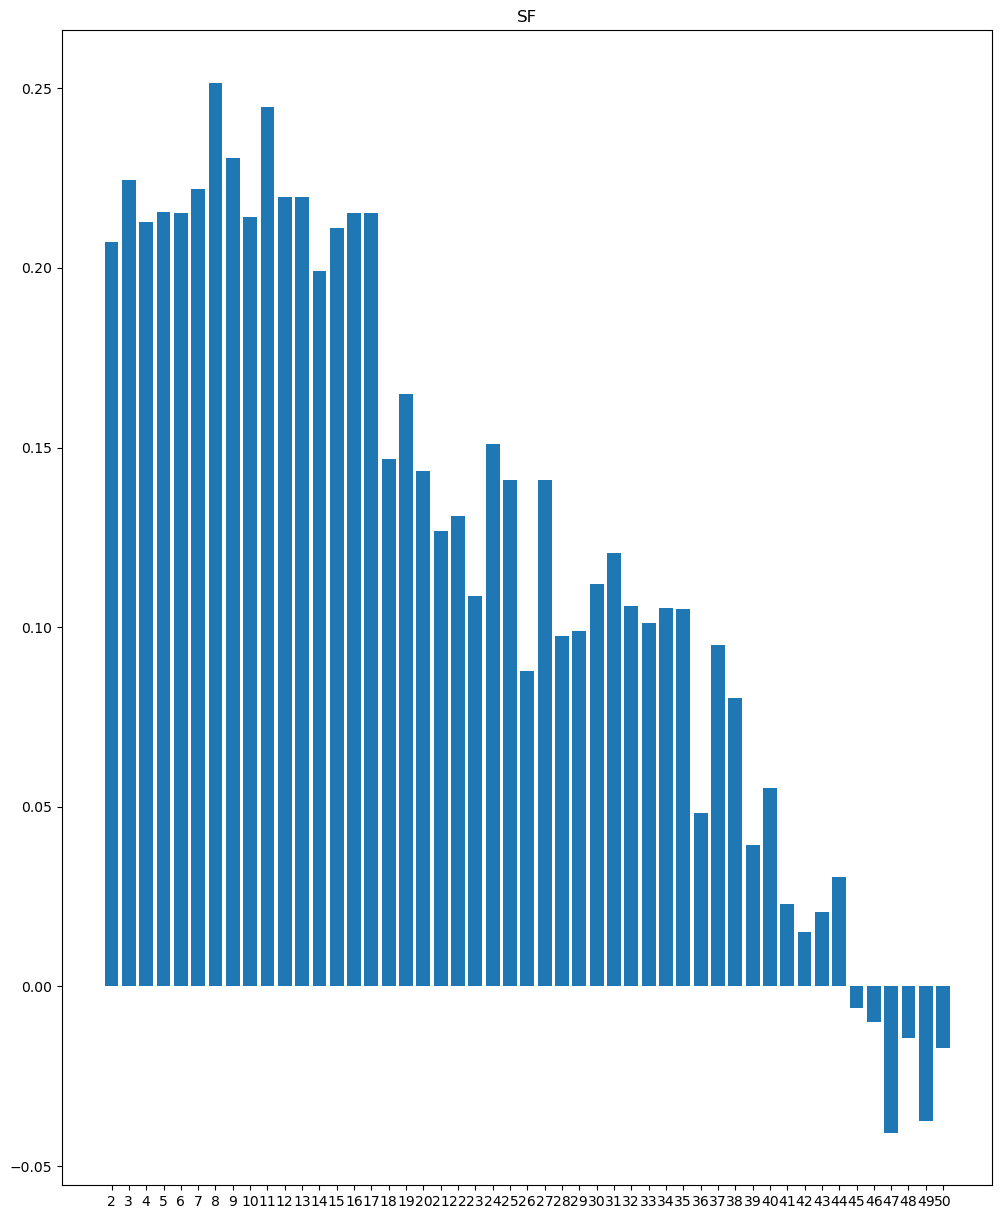

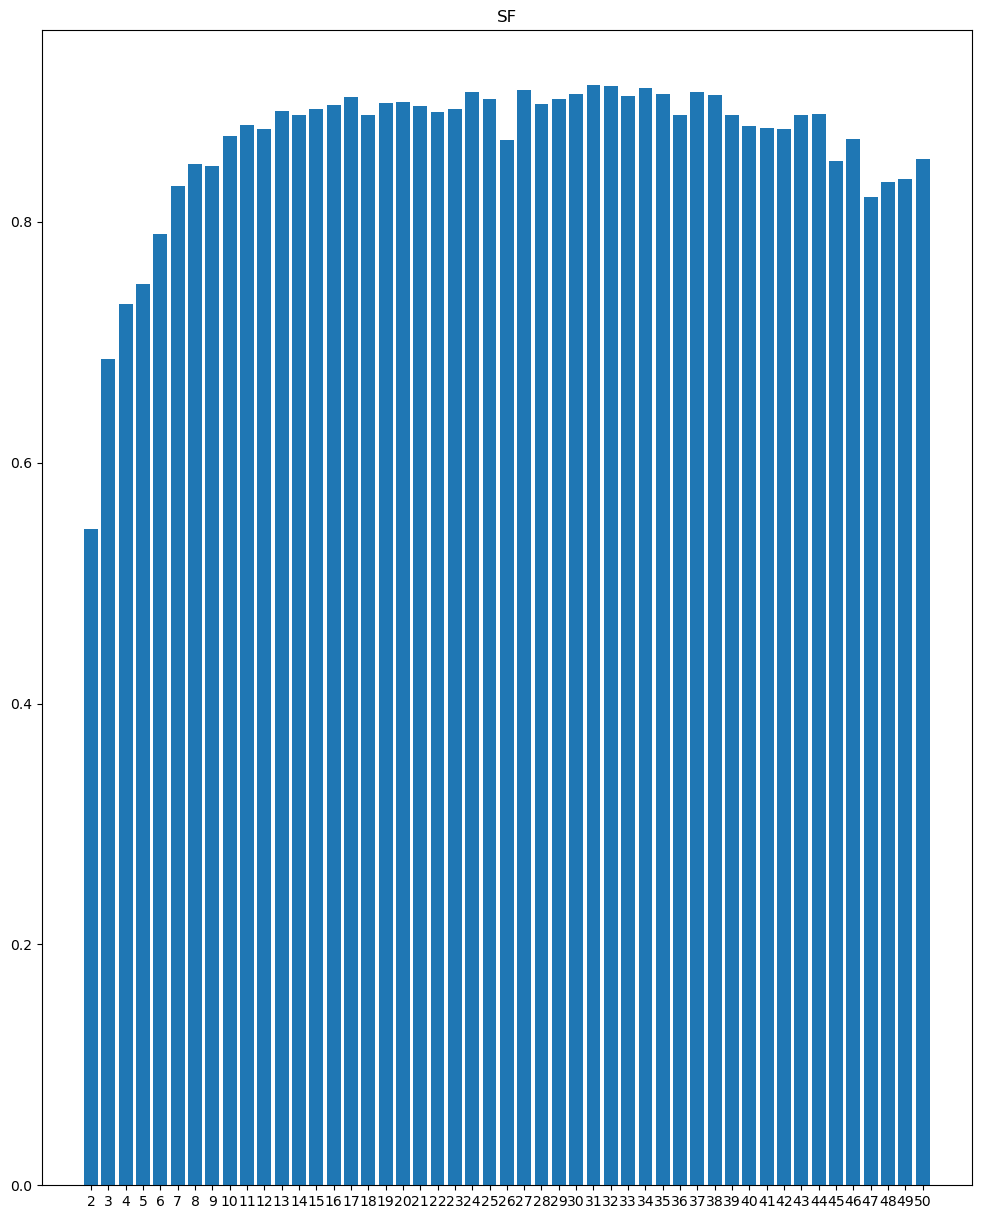

SW  total time :  6.035099983215332


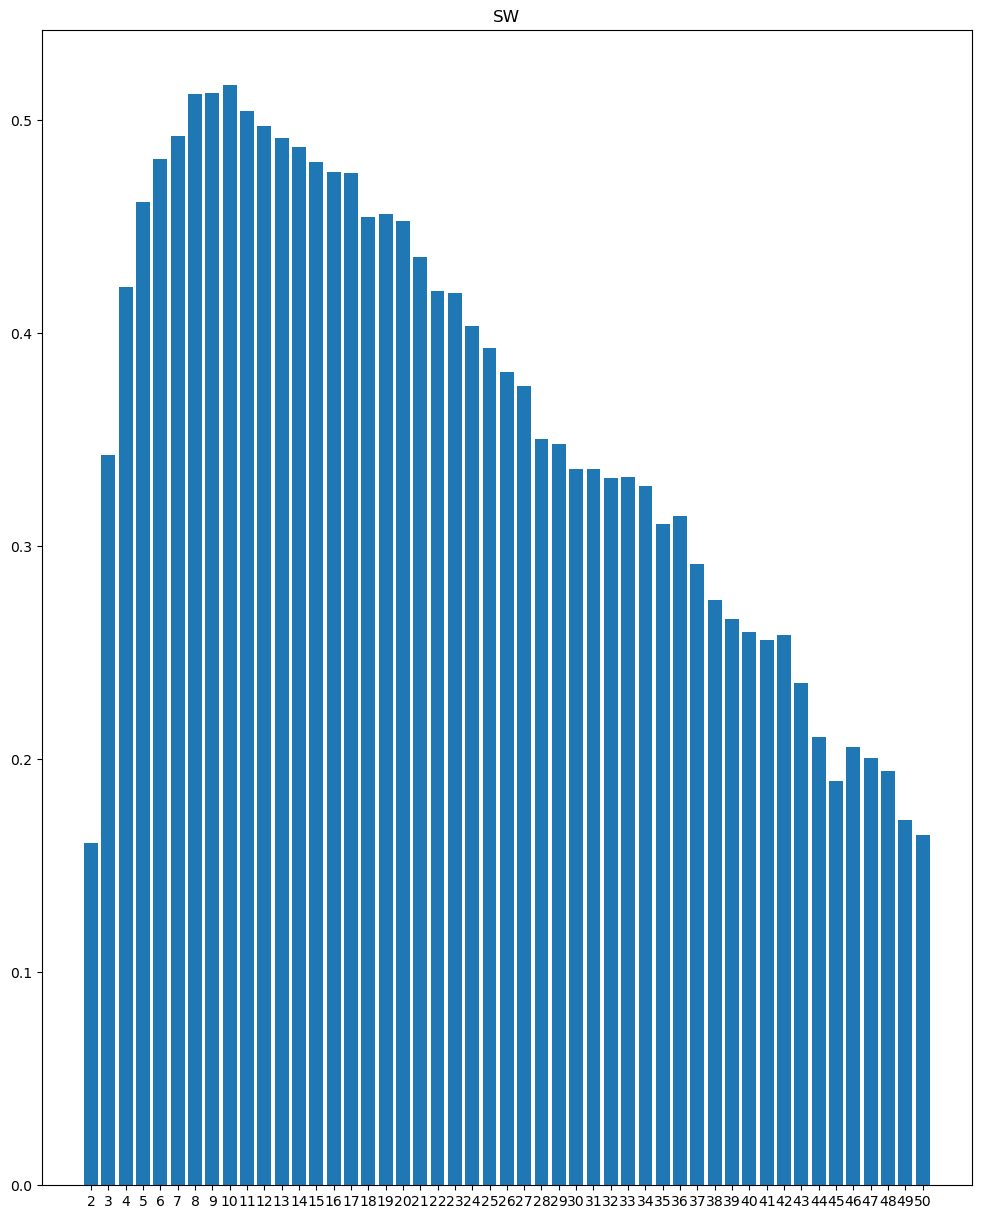

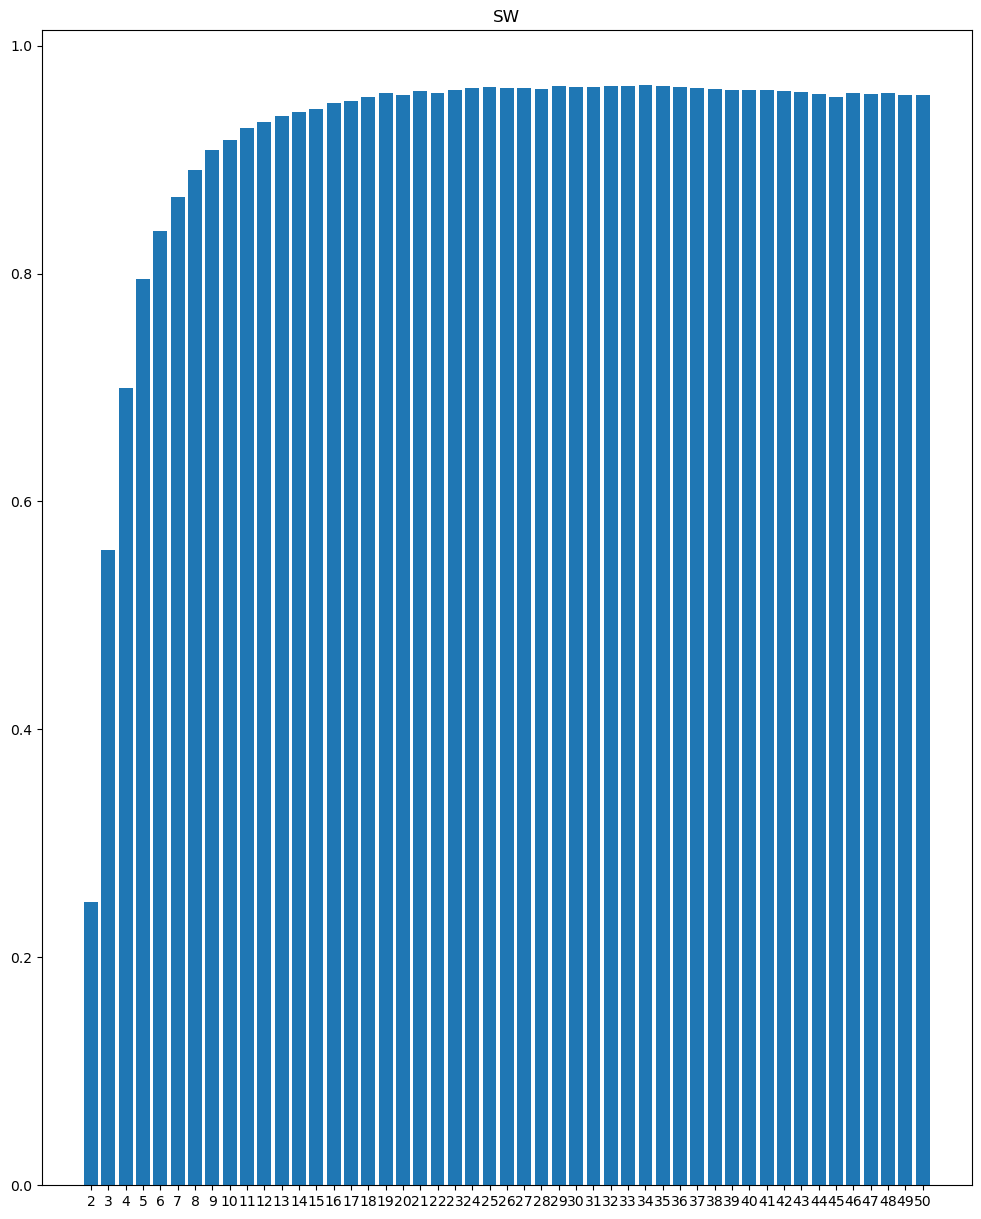

football  total time :  6.432458162307739


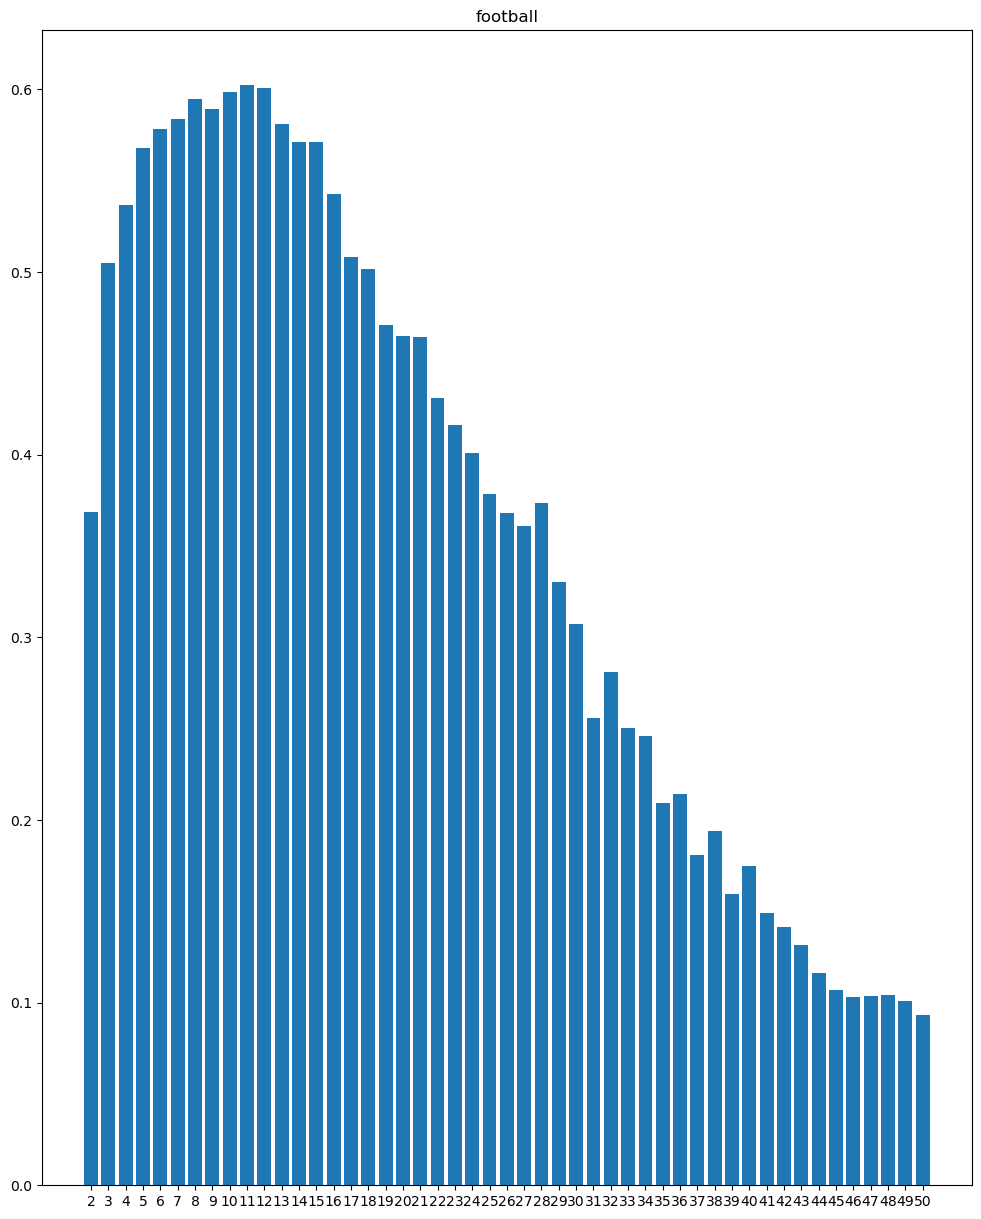

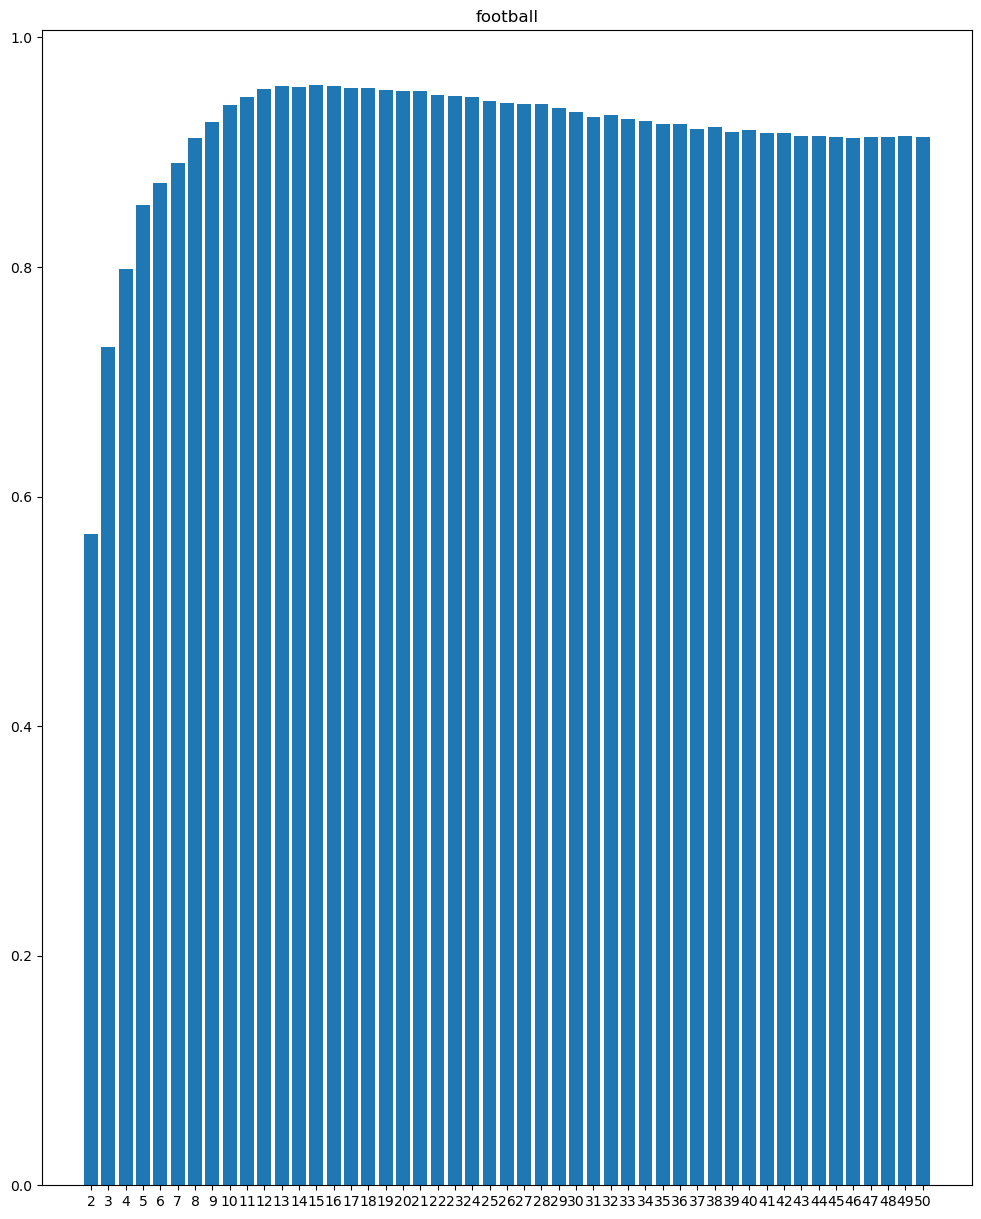

got  total time :  6.4981019496917725


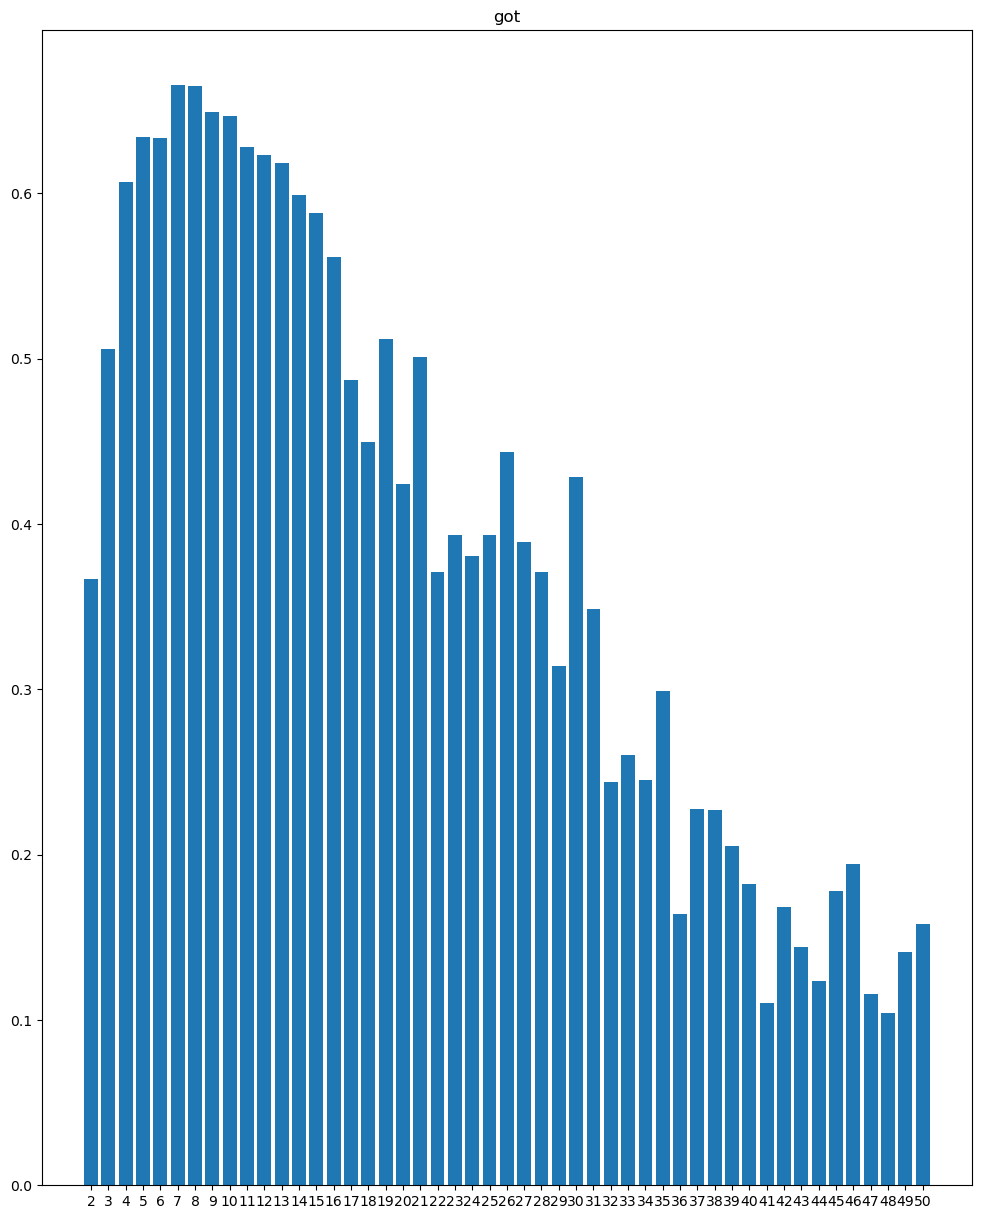

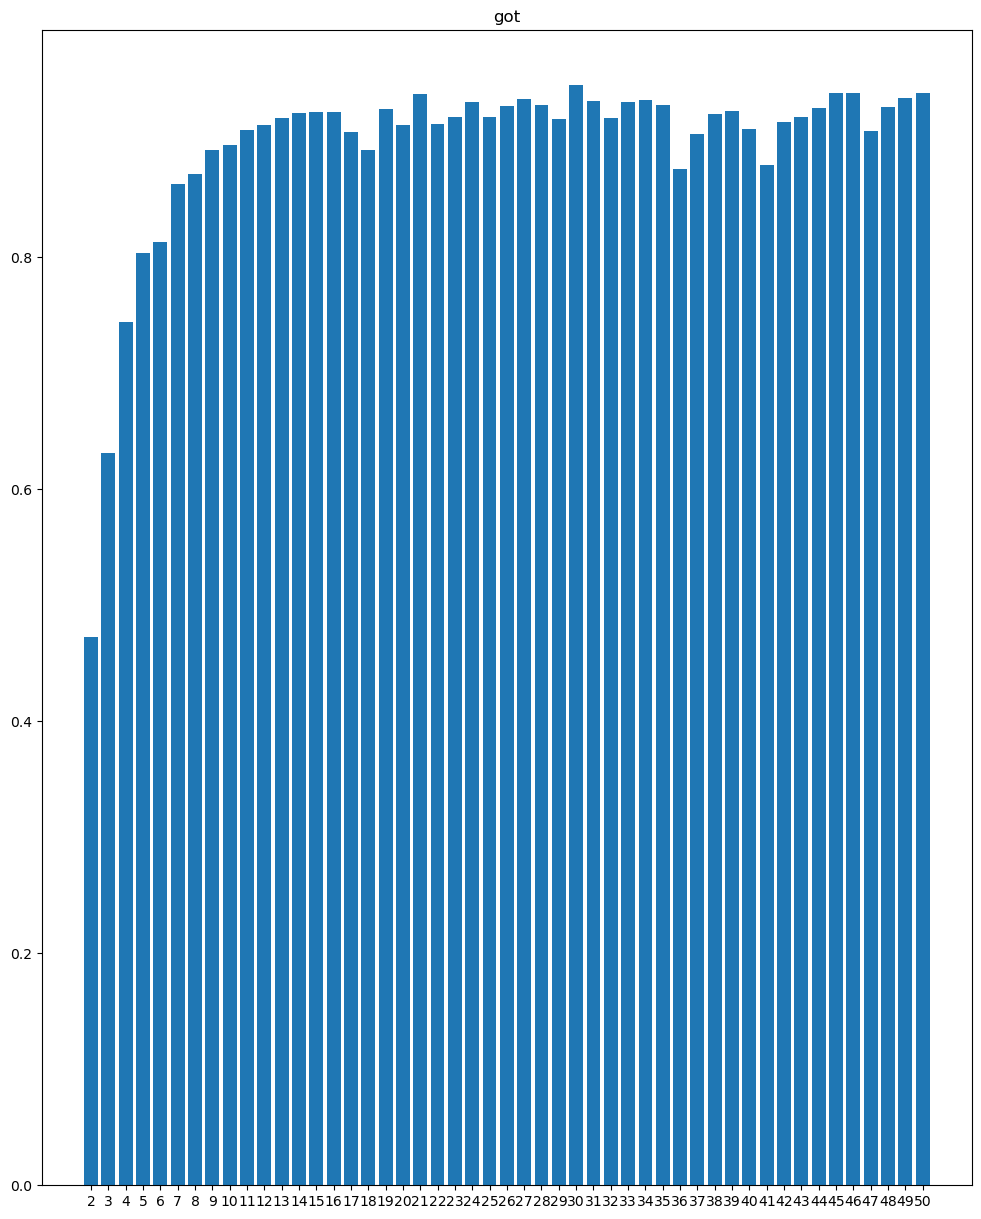

eu_graph  total time :  20.671854972839355


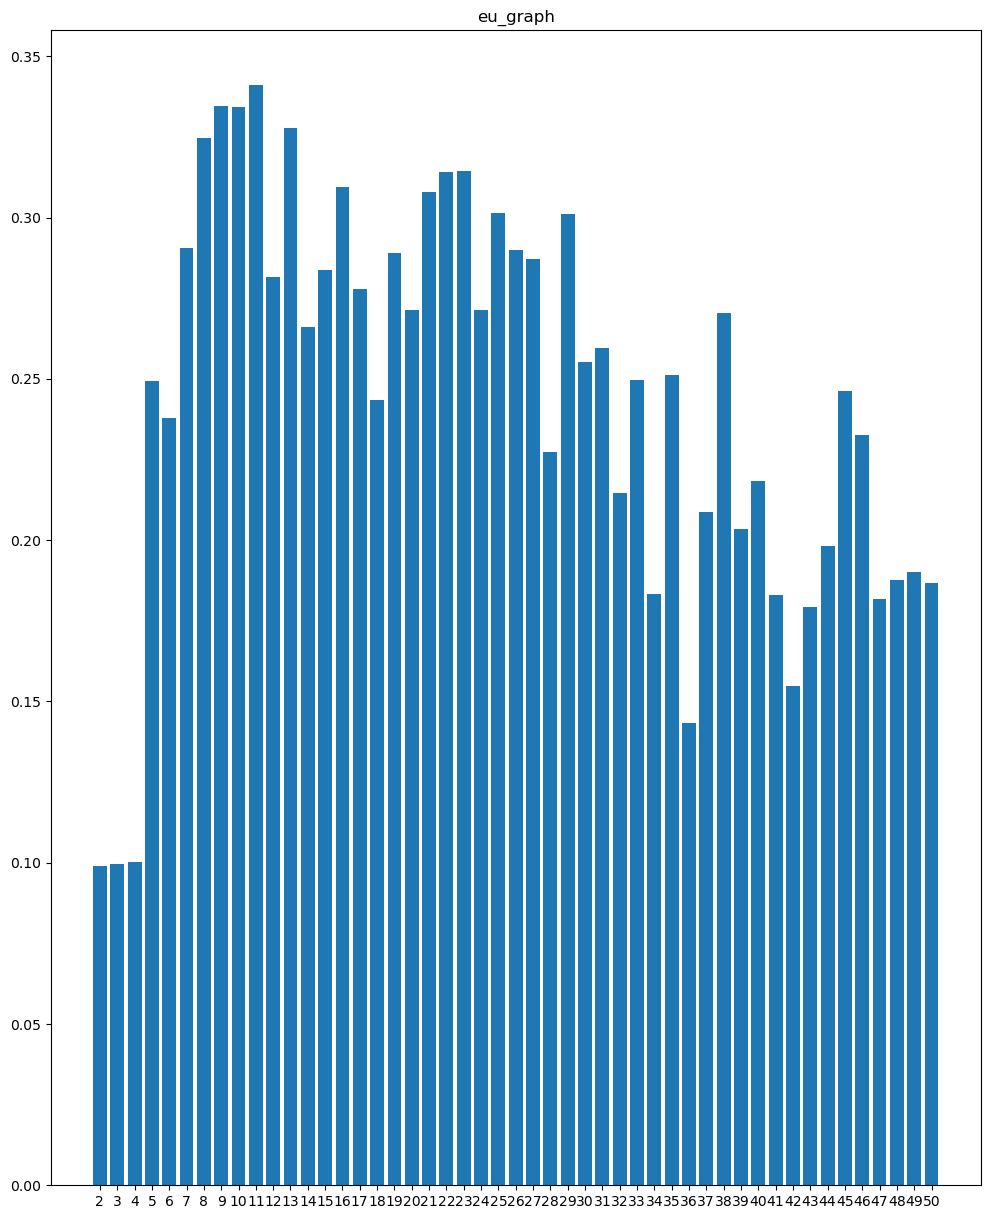

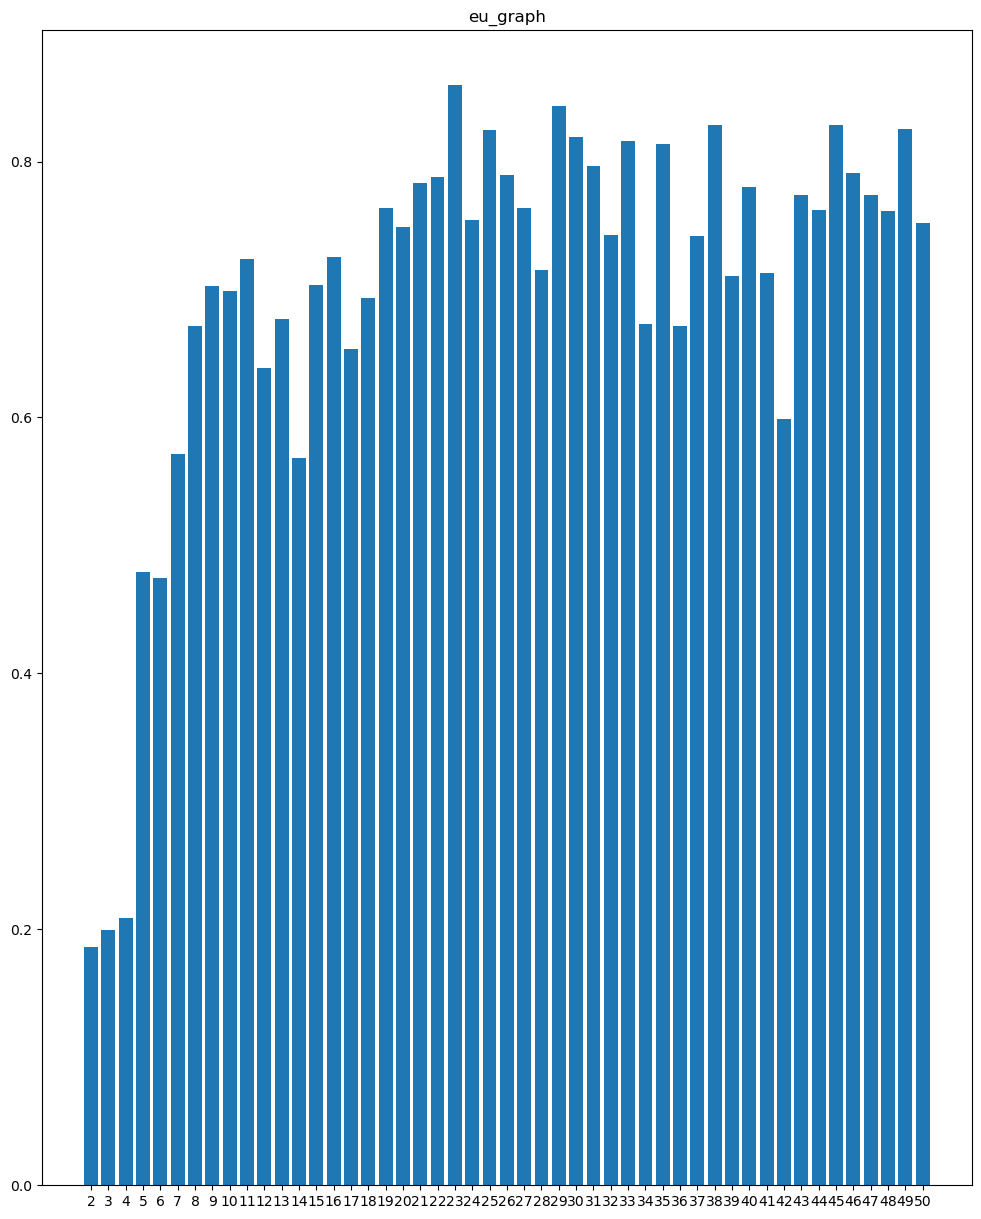

In [148]:

total_modularity_time1=[]
total_performance_time1=[]
modularity_index1=[]
modularities1=[]
max_modularities1=[]
for i in range(0,len(names)):
    c=0
    start_time=time.time()
    a=[]
    for j in range(0,len(all_partitions1[i])):
        b=modularity(graphs[i],eligible[i][j])
        a.append(b)
        if(c<b):
            c=b
            index=j
    modularity_time=time.time()-start_time
    total_modularity_time1.append(modularity_time)
    modularities1.append(a)
    max_modularities1.append(c)
    modularity_index1.append(index)

performance_index1=[]    
performances1=[]
max_performances1=[]
c=0.0
for j in range(0,len(names)):
    start_time=time.time()
    a=[]
    for i in range(0,len(all_partitions[j])):
        b=list(partition_quality(graphs[j],eligible[j][i]))
        a.append(b[1])
        if((a[i-1]<a[i]) & (i>=1)):
            c=a[i]
            index=i
    performance_time=time.time()-start_time
    total_performance_time1.append(performance_time)
    performances1.append(a)
    max_performances1.append(c)
    performance_index1.append(index)

total_time_per_graph1=[] 
x_values1=[]
for i in range(2,51):
    x_values1.append(i)

for j in range(0,len(names)):
        total_time_per_graph1.append(total_partition_time1[j]+total_modularity_time1[j]+total_performance_time1[j])
        print(names[j]," total time : ",total_time_per_graph1[j])
        plt.title(names[j])
        plt.bar(range(len(x_values1)),modularities1[j],tick_label=x_values1)
        plt.show()
        plt.title(names[j])
        plt.bar(range(len(x_values1)),performances1[j],tick_label=x_values1)
        plt.show()

### Επιλογή διαμέρισης με βάση το modularity score και το performance score

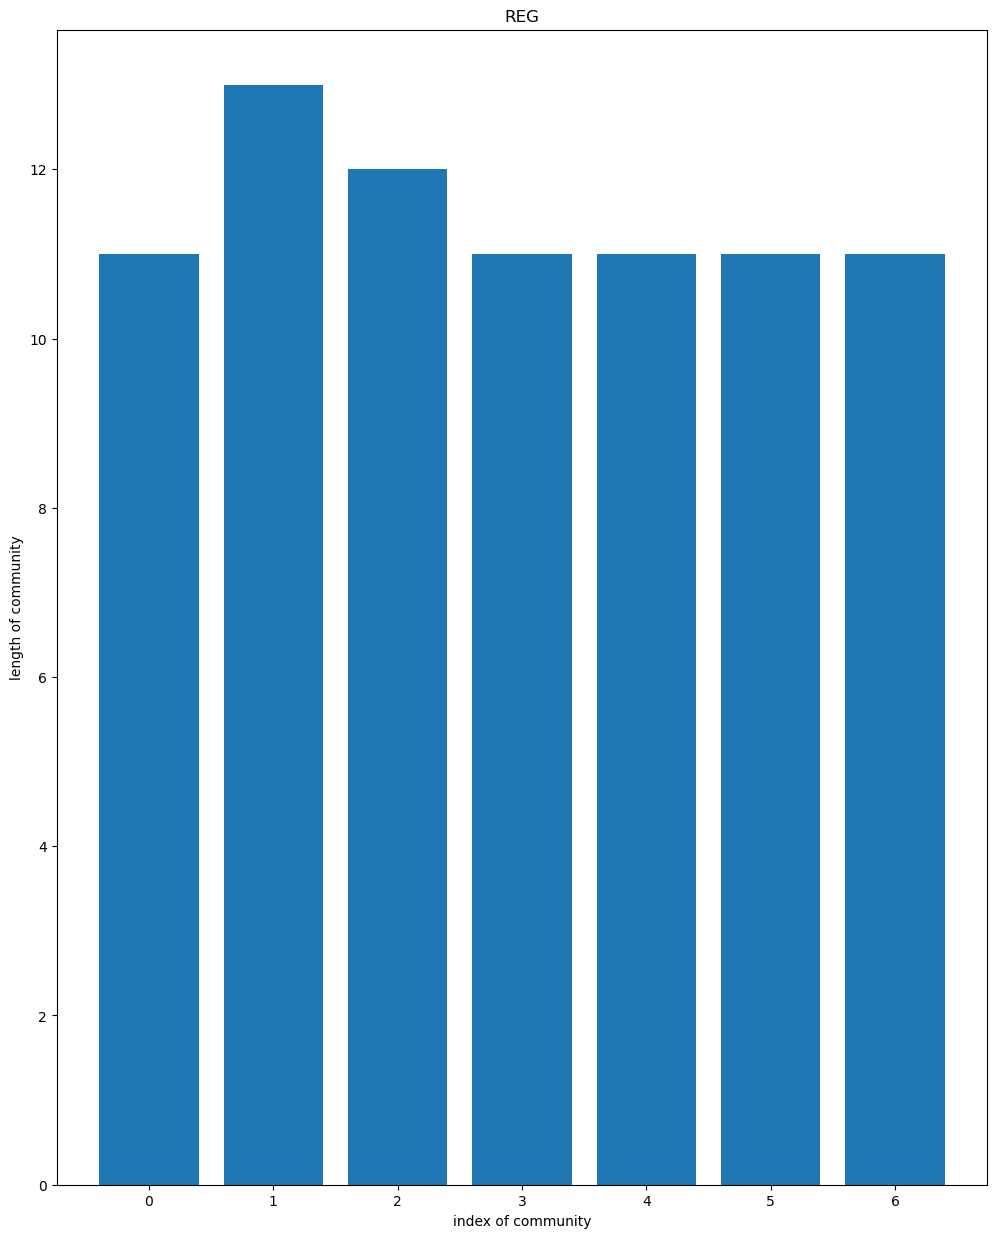

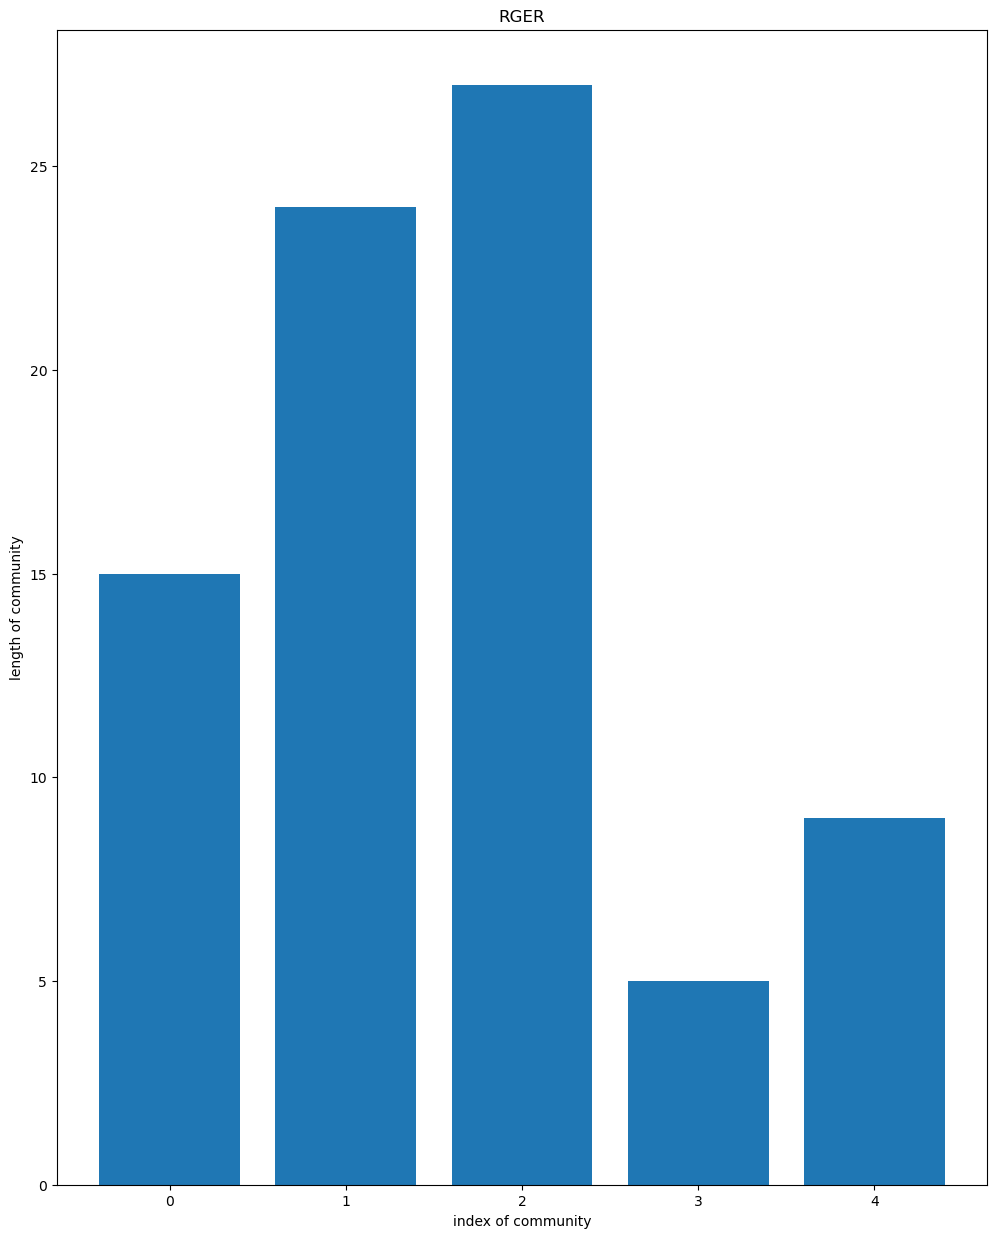

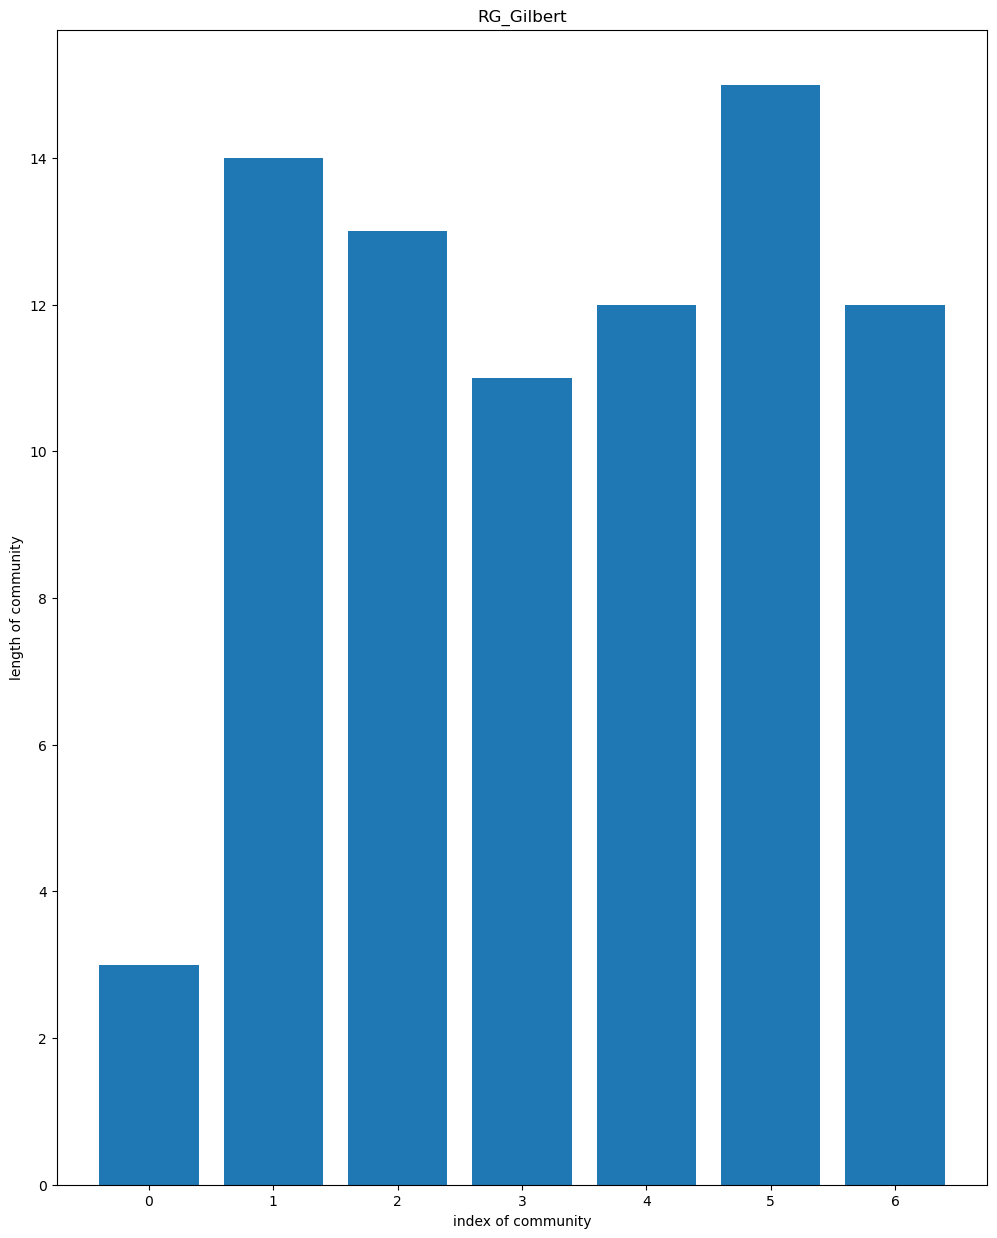

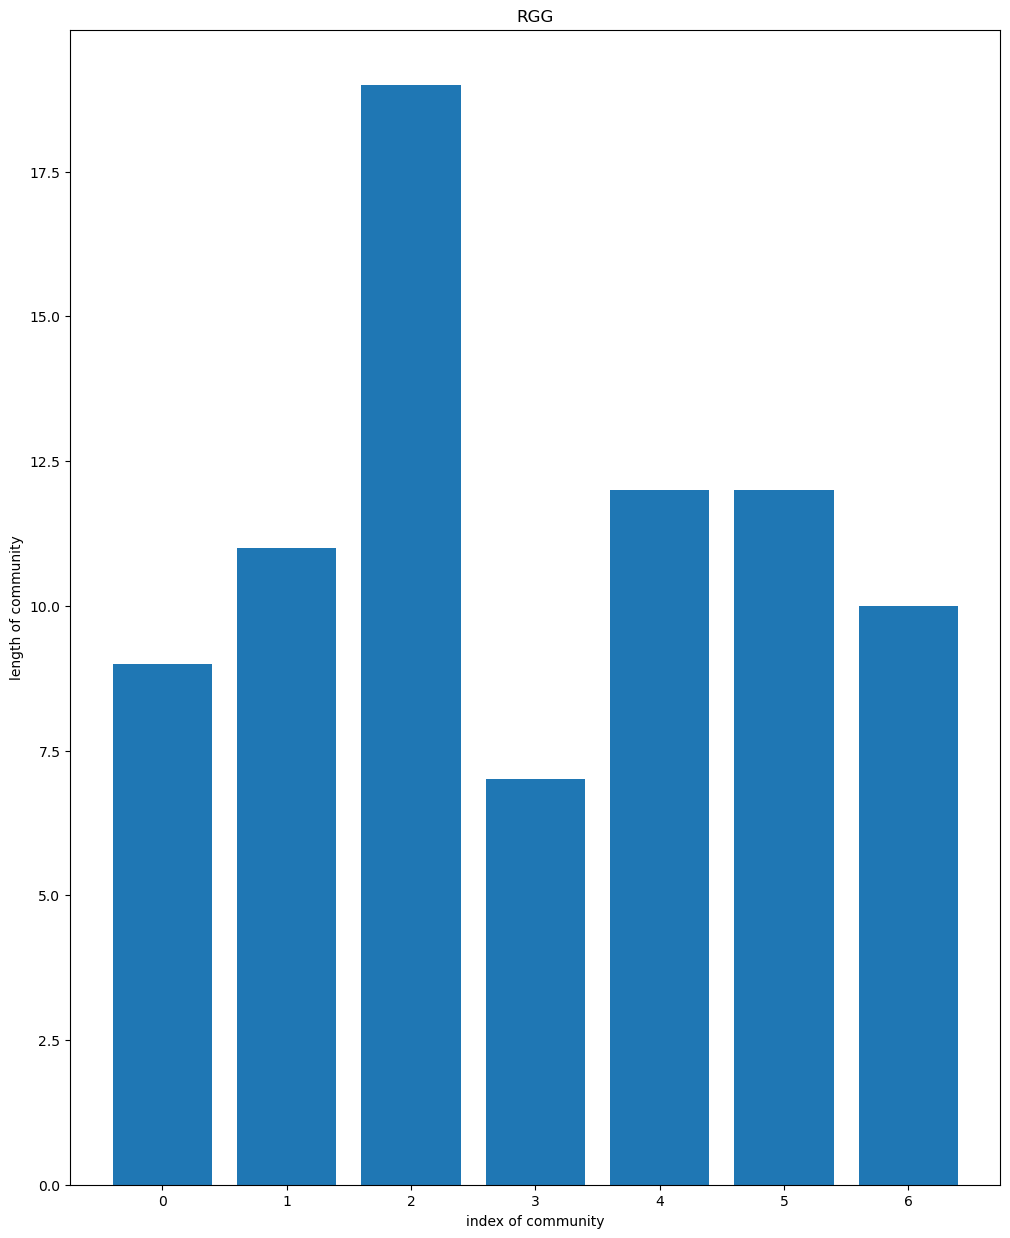

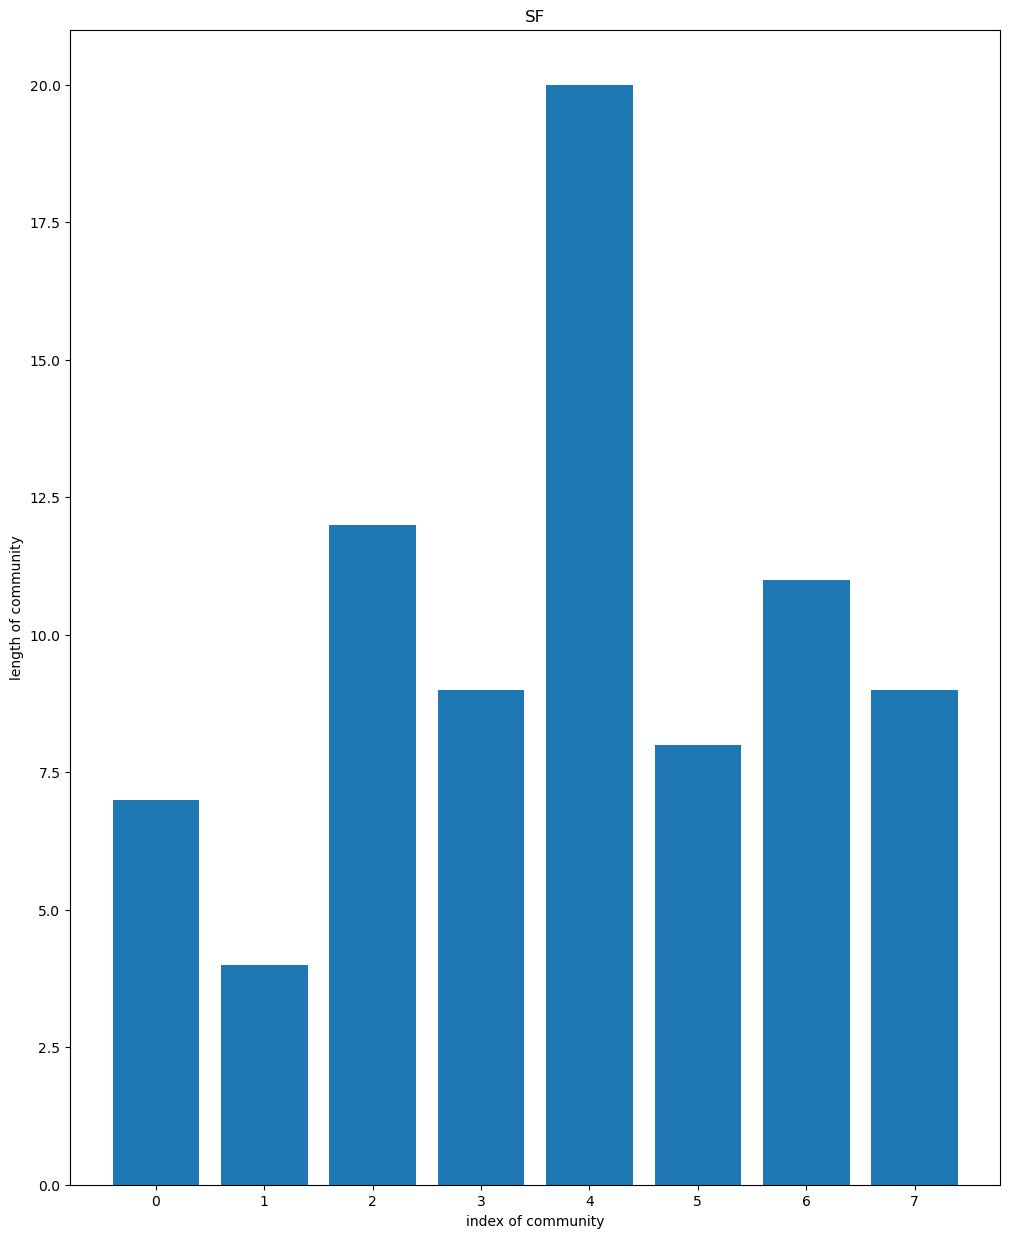

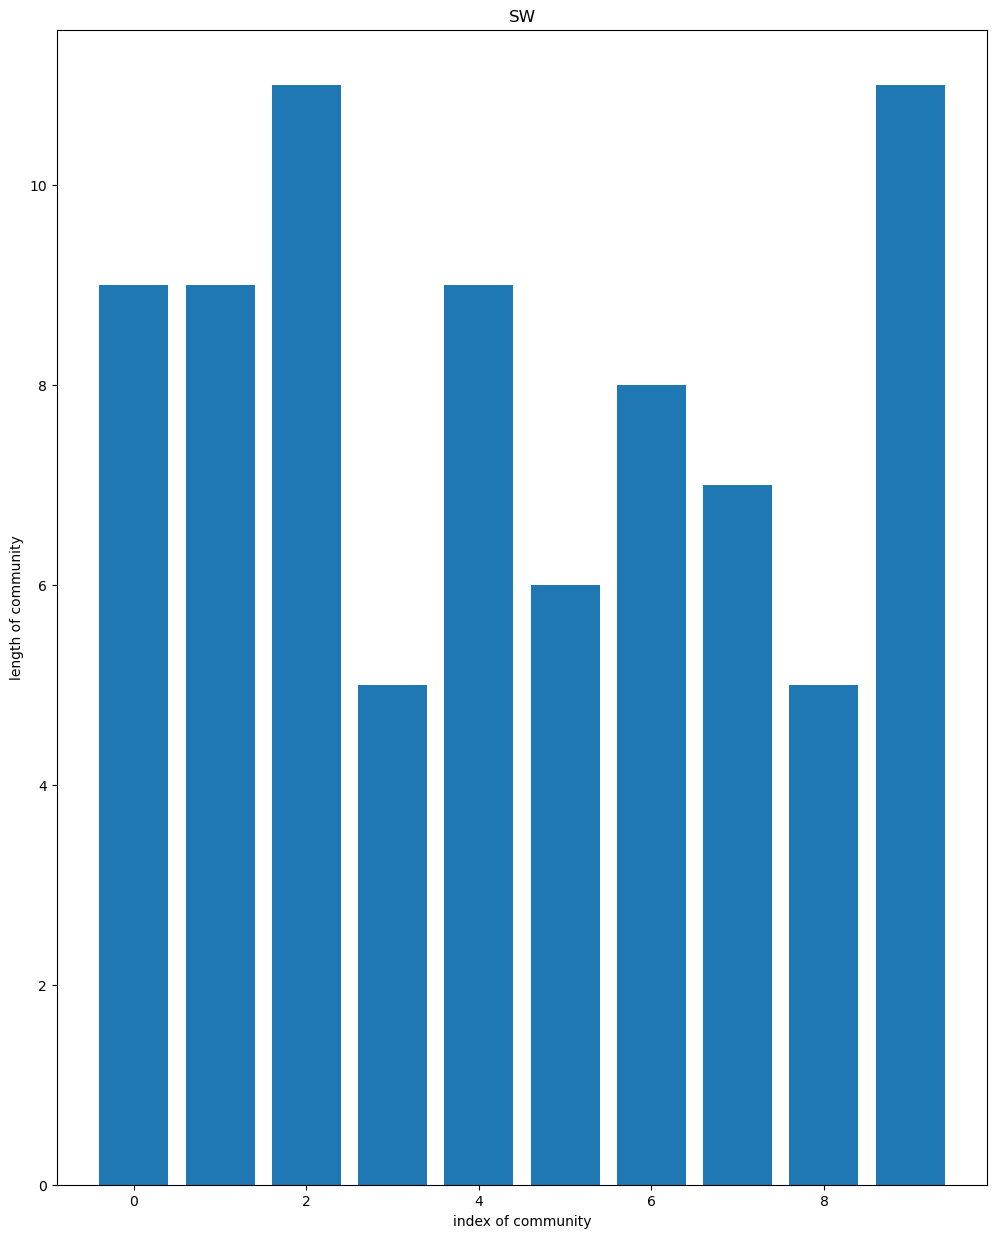

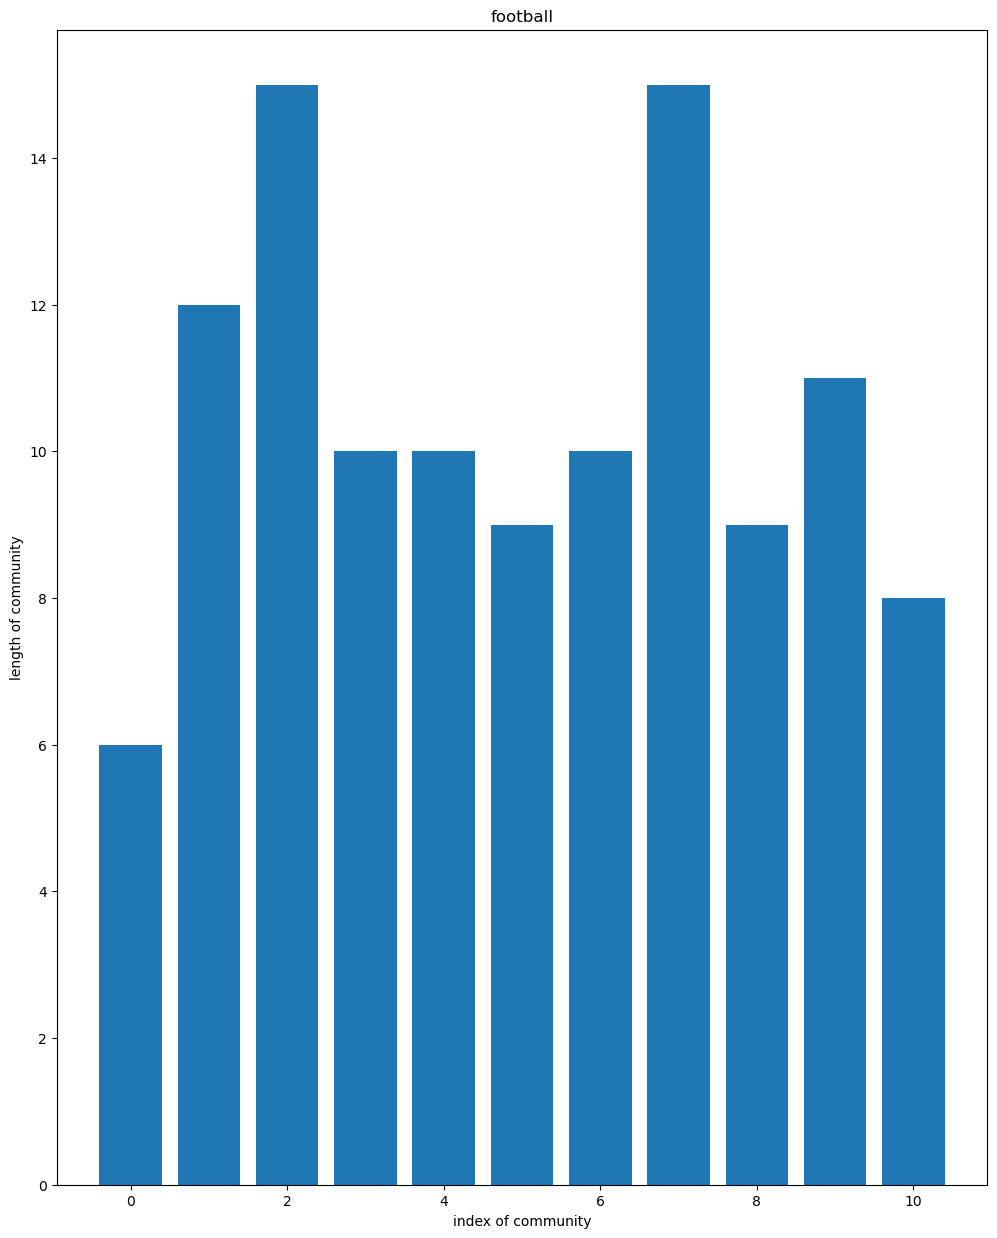

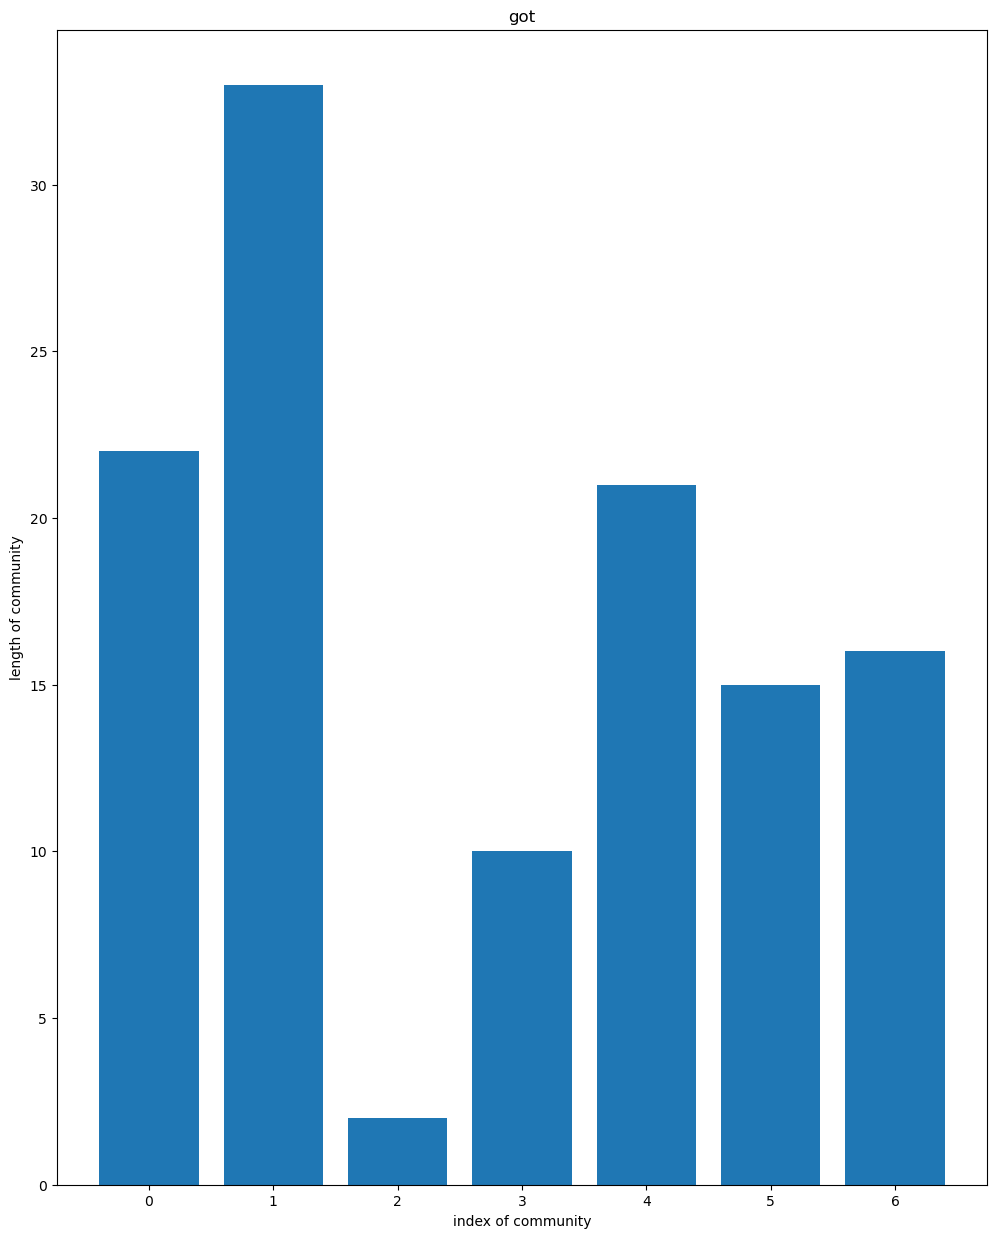

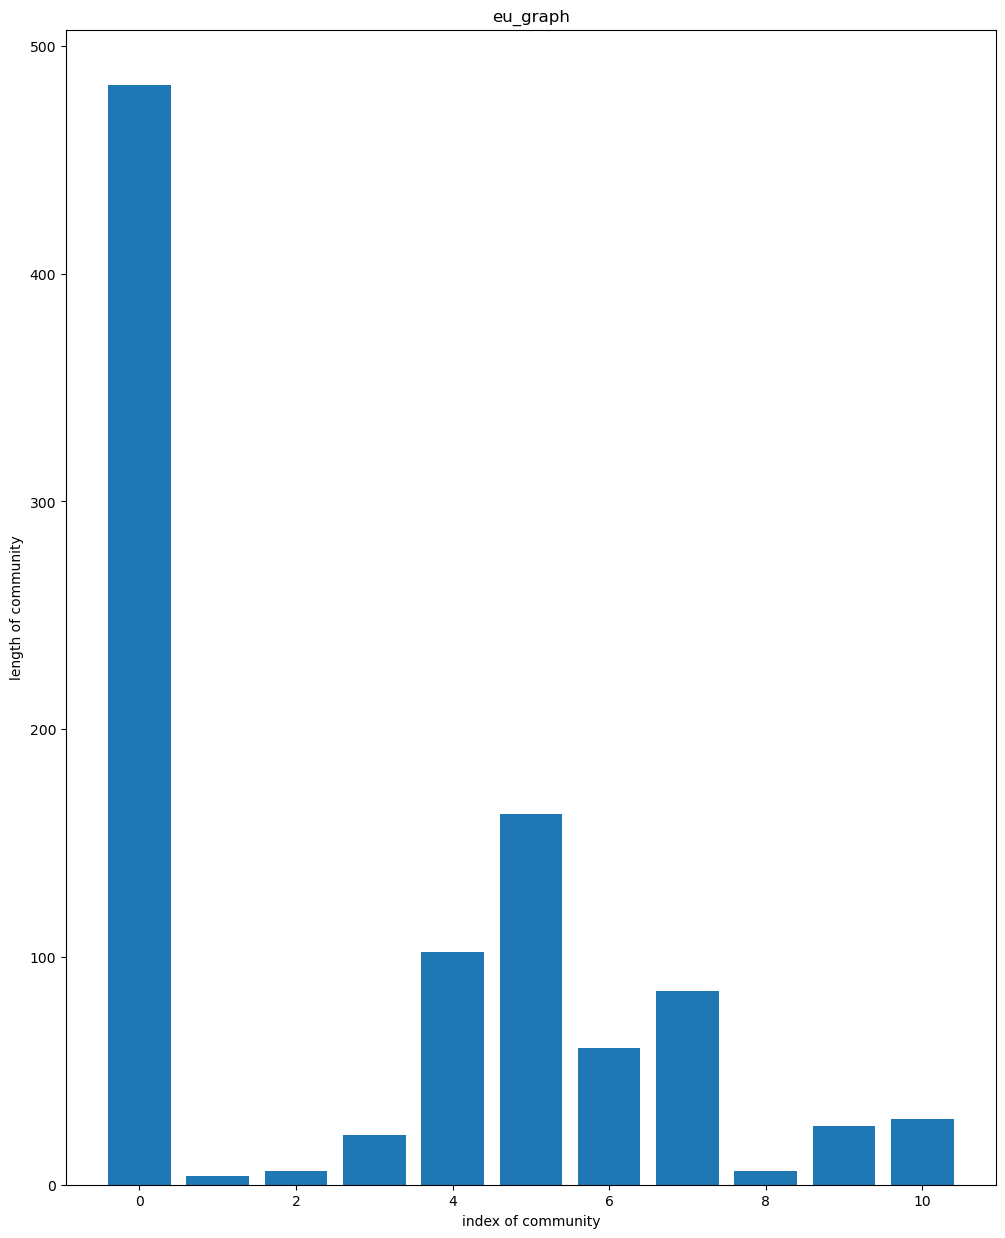

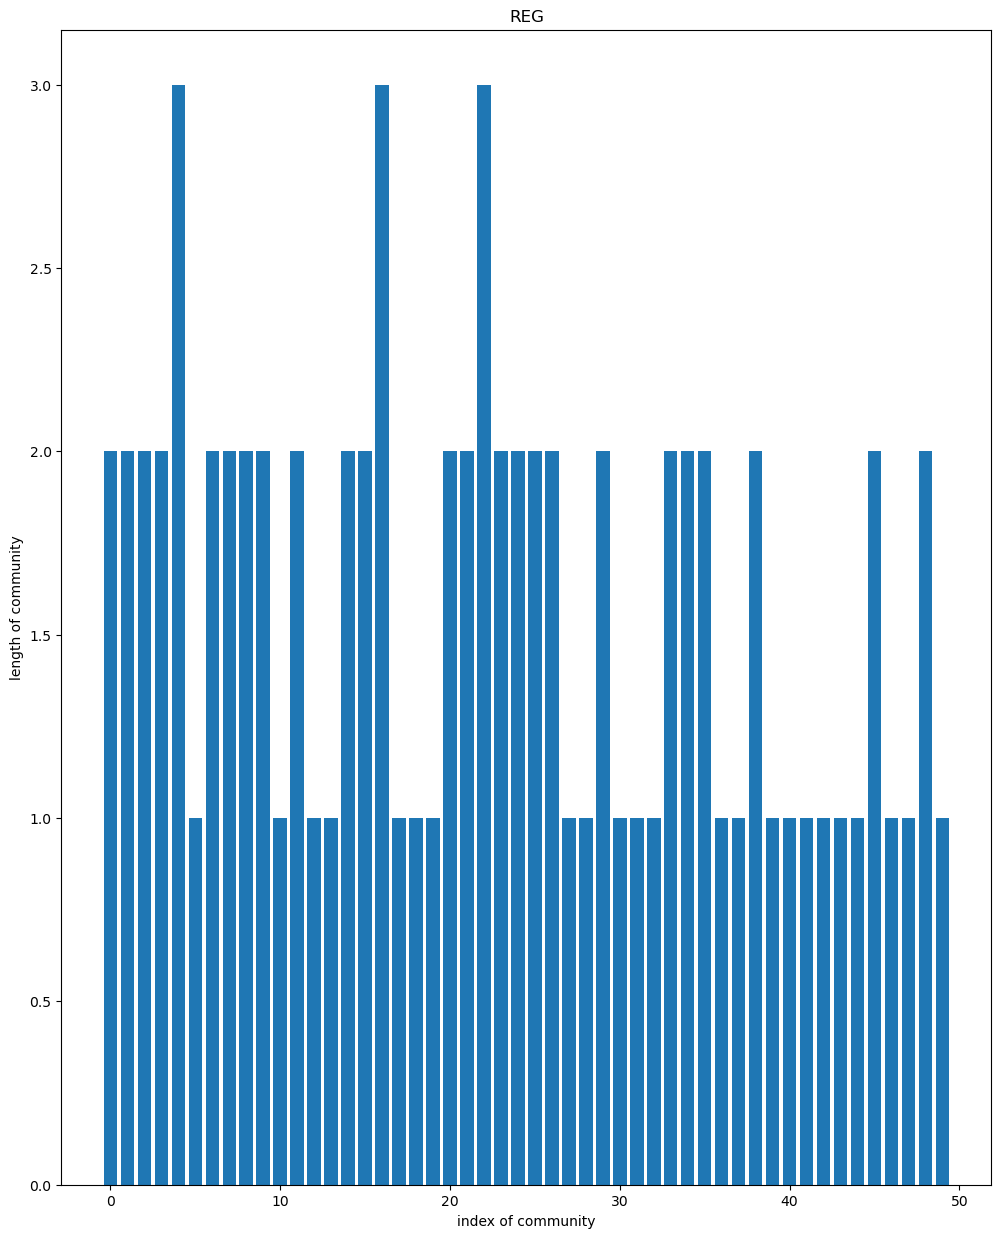

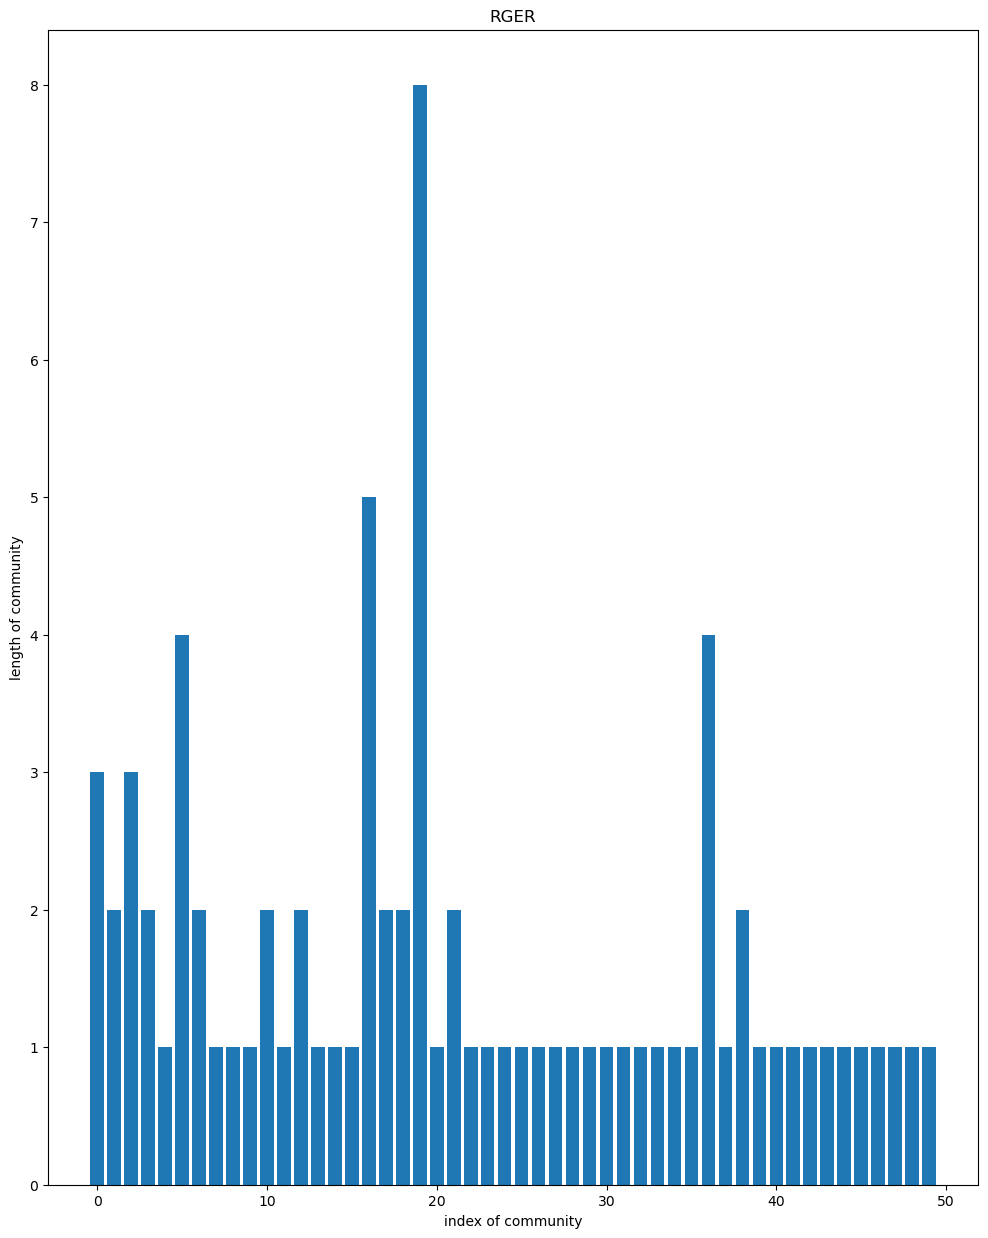

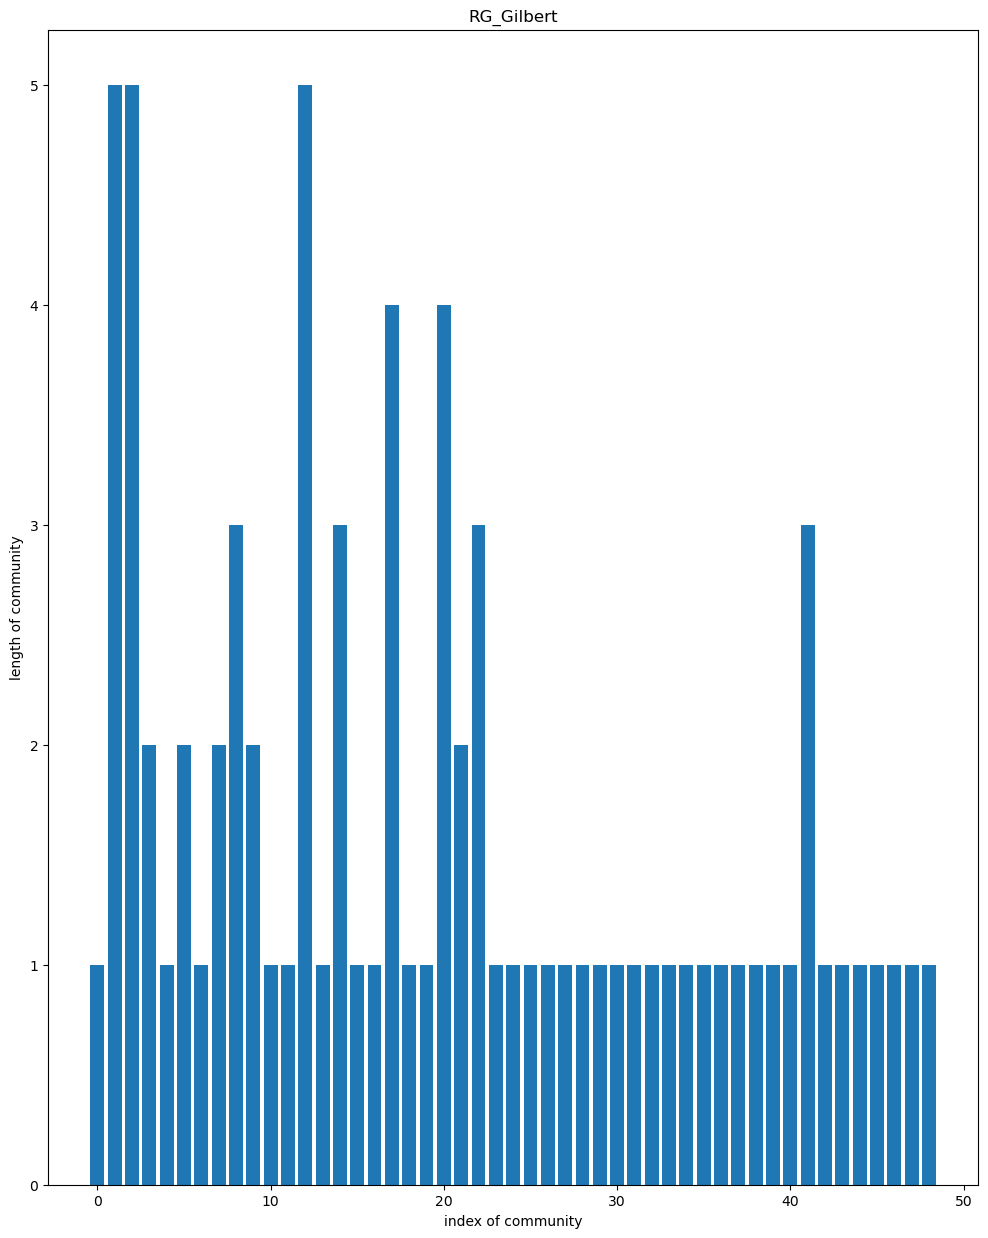

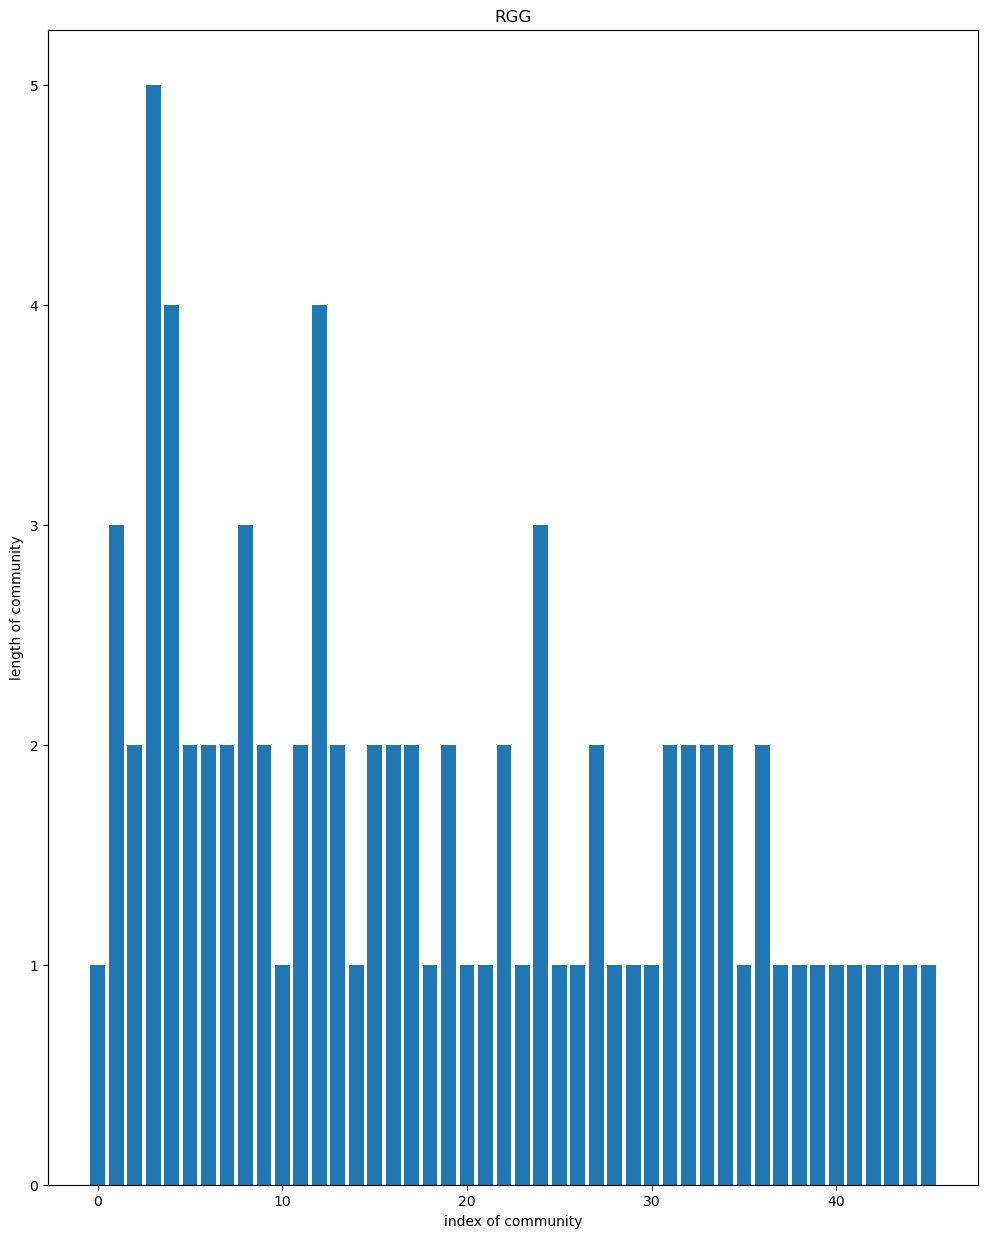

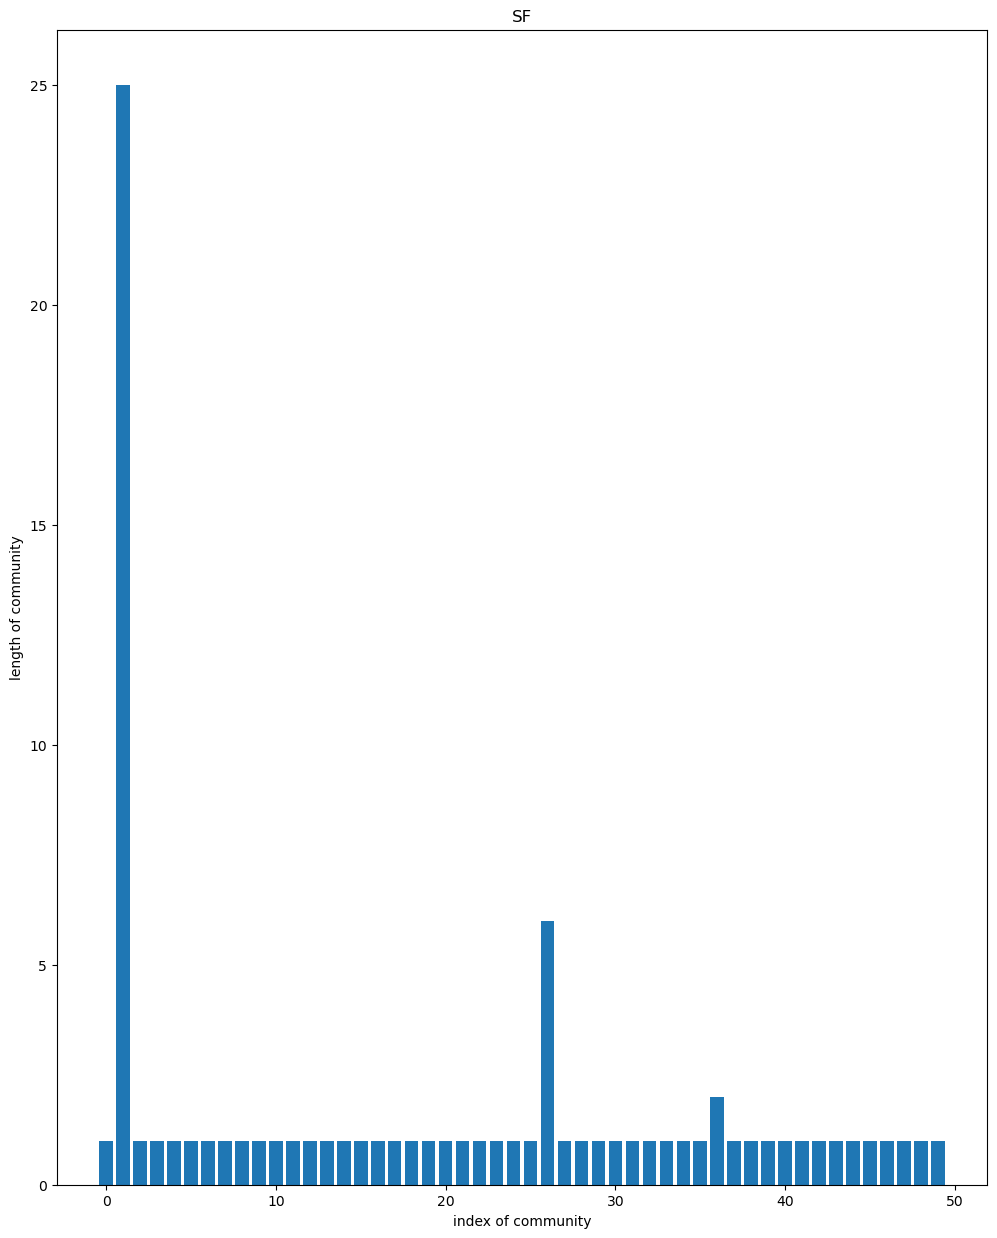

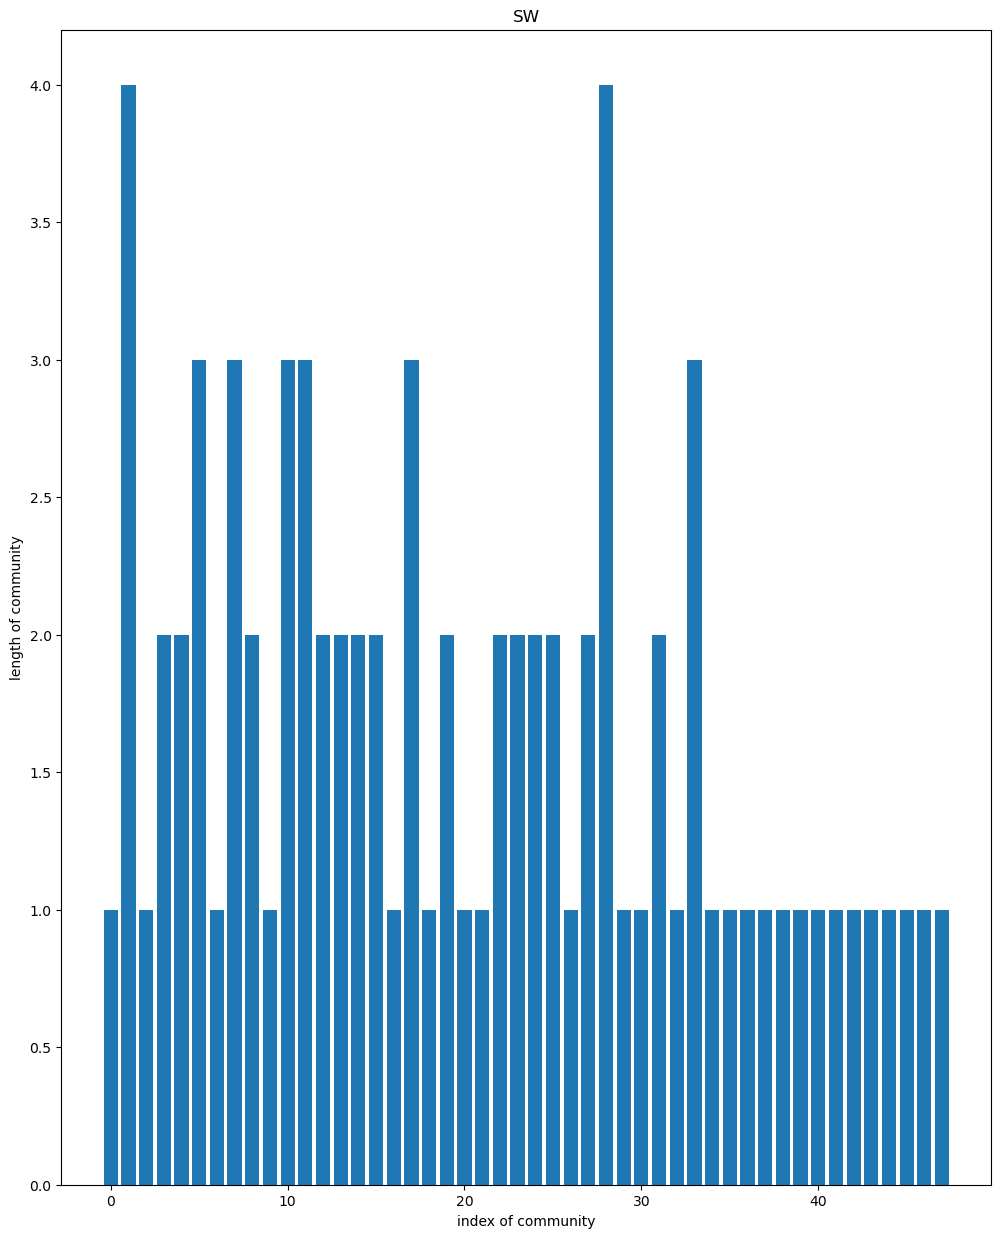

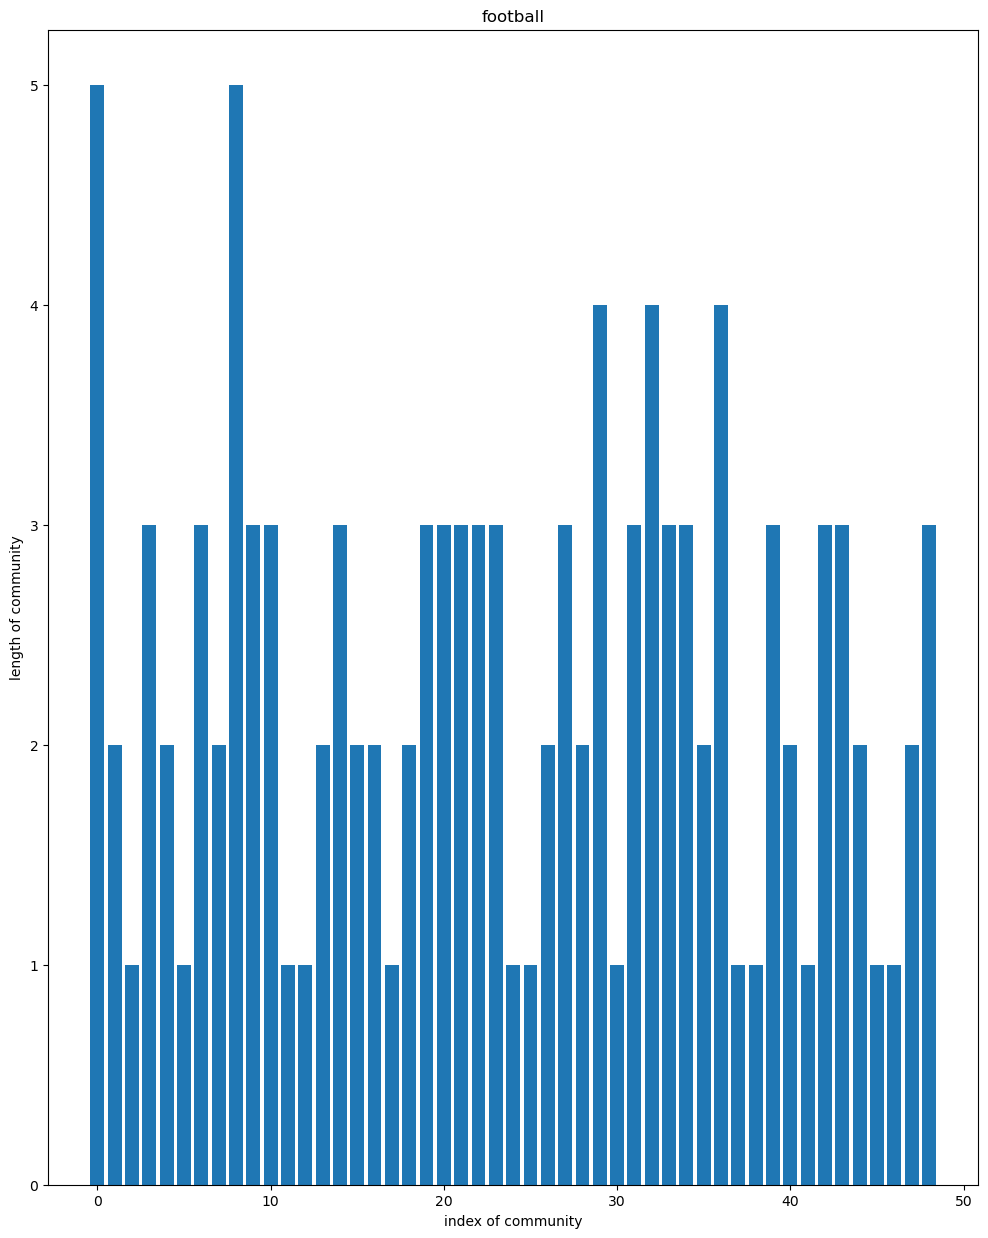

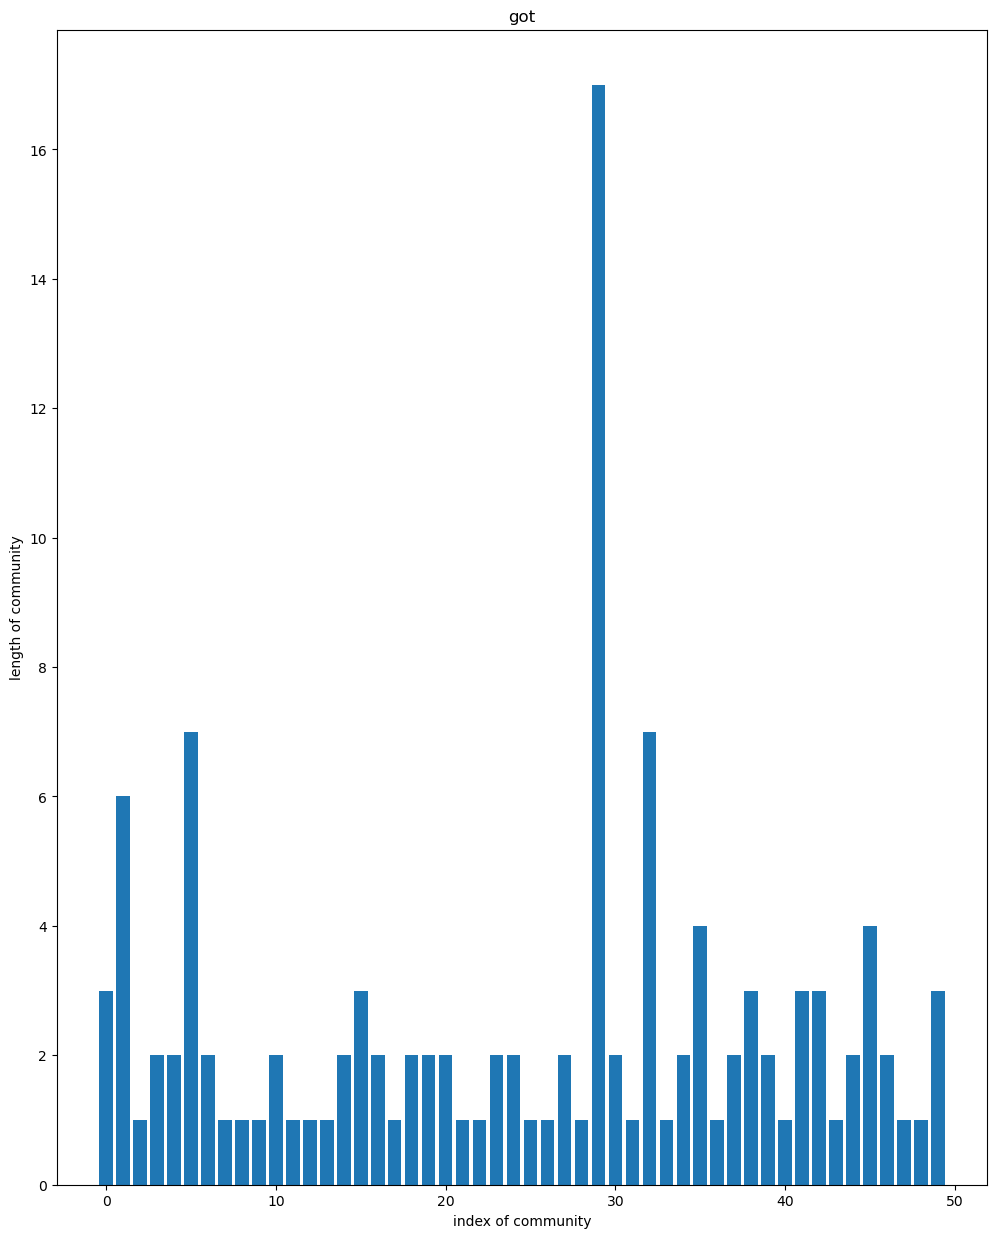

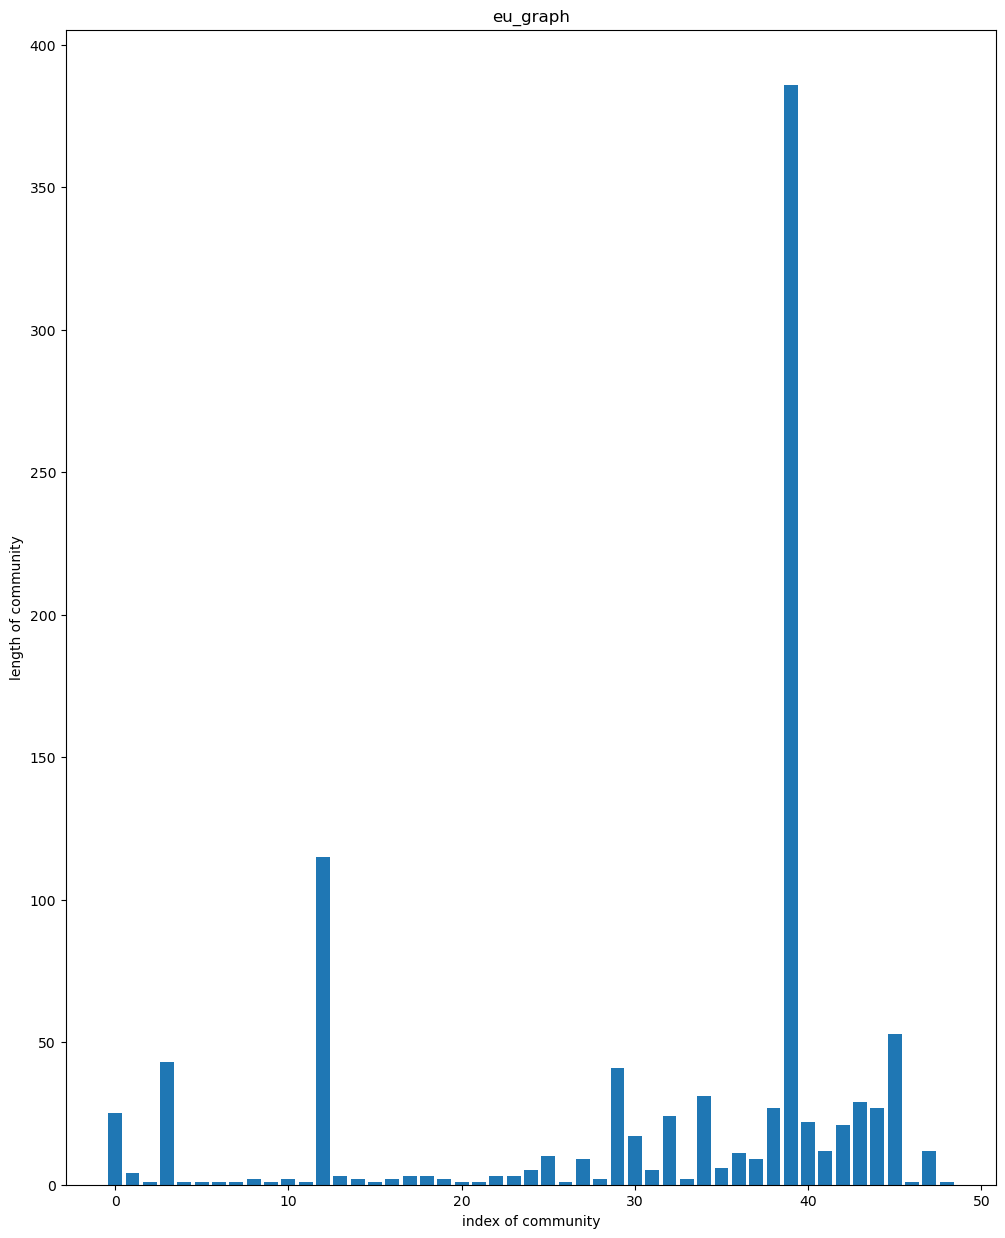

In [149]:
modularity_pick1=[]
performance_pick1=[]
for i in range(0,len(names)):
    modularity_pick1.append(eligible[i][modularity_index1[i]])
    performance_pick1.append(eligible[i][performance_index1[i]])
#αριθμός κοινοτητων ανα διαμέριση
#for i in range(0,len(names)):
#    communities_count=[]
#    for j in range(0,len(all_partitions1[i])):
#        communities_count.append(len(eligible[i][j]))
#    plt.title(names[i])
#    plt.xlabel("number of partition")
#    plt.ylabel("communities")
#    plt.bar(range(len(eligible[i])),communities_count)
#    plt.show()
#μέγεθος κοινοτητων ανα γράφο για διαμερίσεις με μέγιστο modularity score και performance score 
communities_length_for_maximum_modularity_partitions1=[]
for i in range(0,len(names)):
    length1=[]
    for j in range(0,len(modularity_pick1[i])):
        length1.append(len(modularity_pick1[i][j]))
    communities_length_for_maximum_modularity_partitions1.append(length1)
    plt.title(names[i])
    plt.xlabel("index of community")
    plt.ylabel("length of community")
    plt.bar(range(len(modularity_pick1[i])),communities_length_for_maximum_modularity_partitions1[i])
    plt.show()
    
communities_length_for_maximum_performance_partitions1=[]
for i in range(0,len(names)):
    length1=[]
    for j in range(0,len(performance_pick1[i])):
        length1.append(len(performance_pick1[i][j]))
    communities_length_for_maximum_performance_partitions1.append(length1)
    plt.title(names[i])
    plt.xlabel("index of community")
    plt.ylabel("length of community")
    plt.bar(range(len(performance_pick1[i])),communities_length_for_maximum_performance_partitions1[i])
    plt.show()

### Διαμέριση ground-truth 

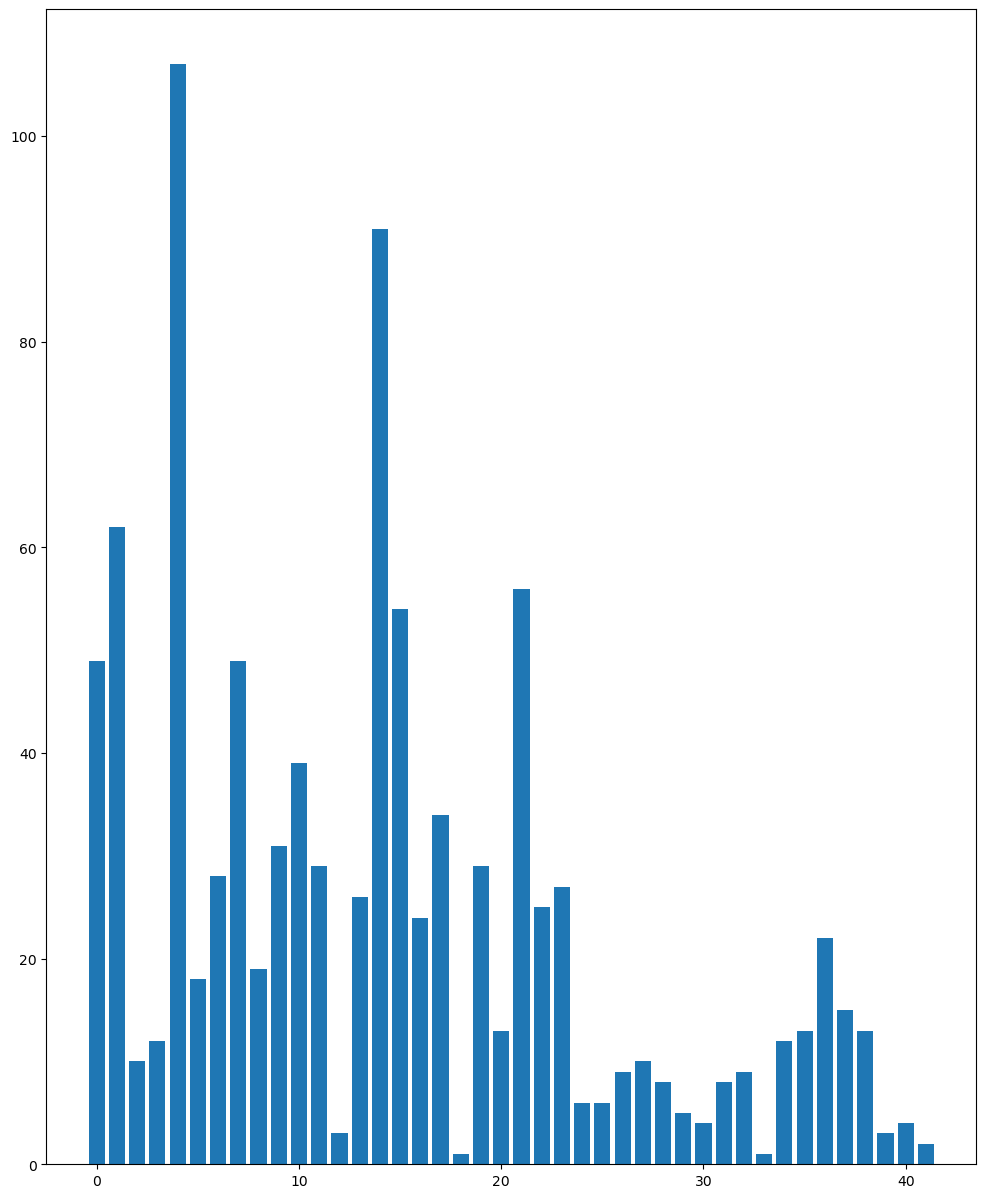

In [150]:
file=[]
with open('email-Eu-core-department-labels.txt') as f:
    lines = f.readlines()
    for line in lines:
        file.append(line)

for i in range(0,len(file)):
    file[i]=file[i].split(' ')
    file[i][1]=file[i][1].replace('\n','')
    file[i][0]=int(file[i][0])
    file[i][1]=int(file[i][1])

nodes_left=list(nodes_left)
for j in range(0,len(nodes_left)):
    nodes_left[j]=int(nodes_left[j])
nodes_left=sorted(nodes_left)


temp=[]
nodes=[]
for i in range(0,len(file)):
    value=file[i][0]
    if value in nodes_left:
        temp.append(file[i])
        nodes.append(file[i][0])
    else:
        continue

for i in range(0,len(nodes)):
    nodes[i]=i

for i in range(0,len(temp)):
    temp[i][0]=nodes[i]
file=temp
dictionary={}
for i in range(0,42):
    dictionary[i]=[]

for i in range(0,len(file)):
    dictionary[file[i][1]].append(file[i][0])

final_partition=[]    
nodes_=[]
for i in range(0,42):
    final_partition.append(sorted(dictionary[i]))

mod=modularity(graphs[8],final_partition)
per=partition_quality(graphs[8],final_partition)
length=[]
for i in range(0,len(final_partition)):
    length.append(len(final_partition[i]))
    
plt.bar(range(0,len(length)),length)
plt.show()

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

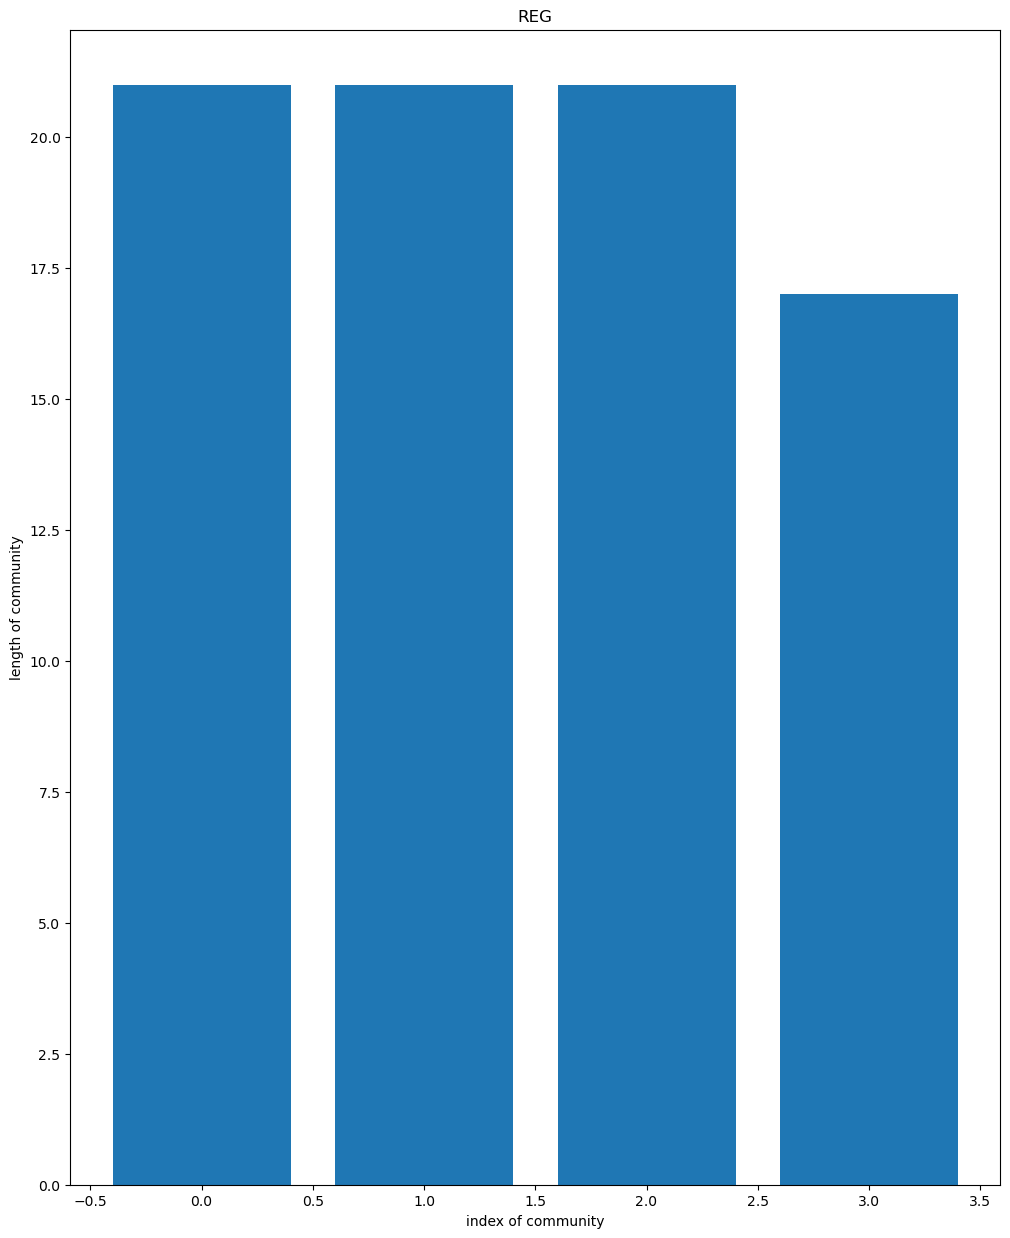

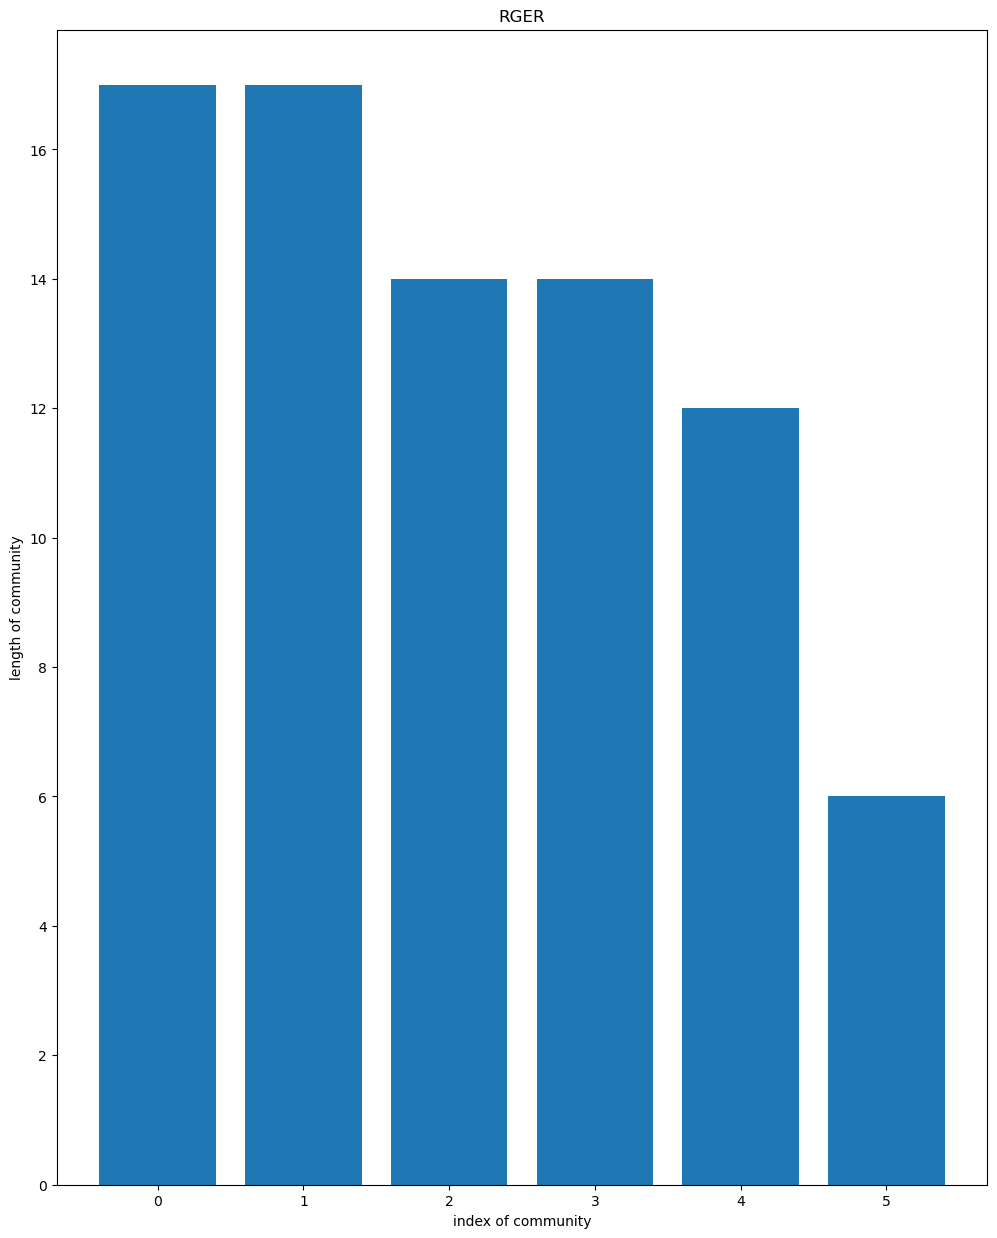

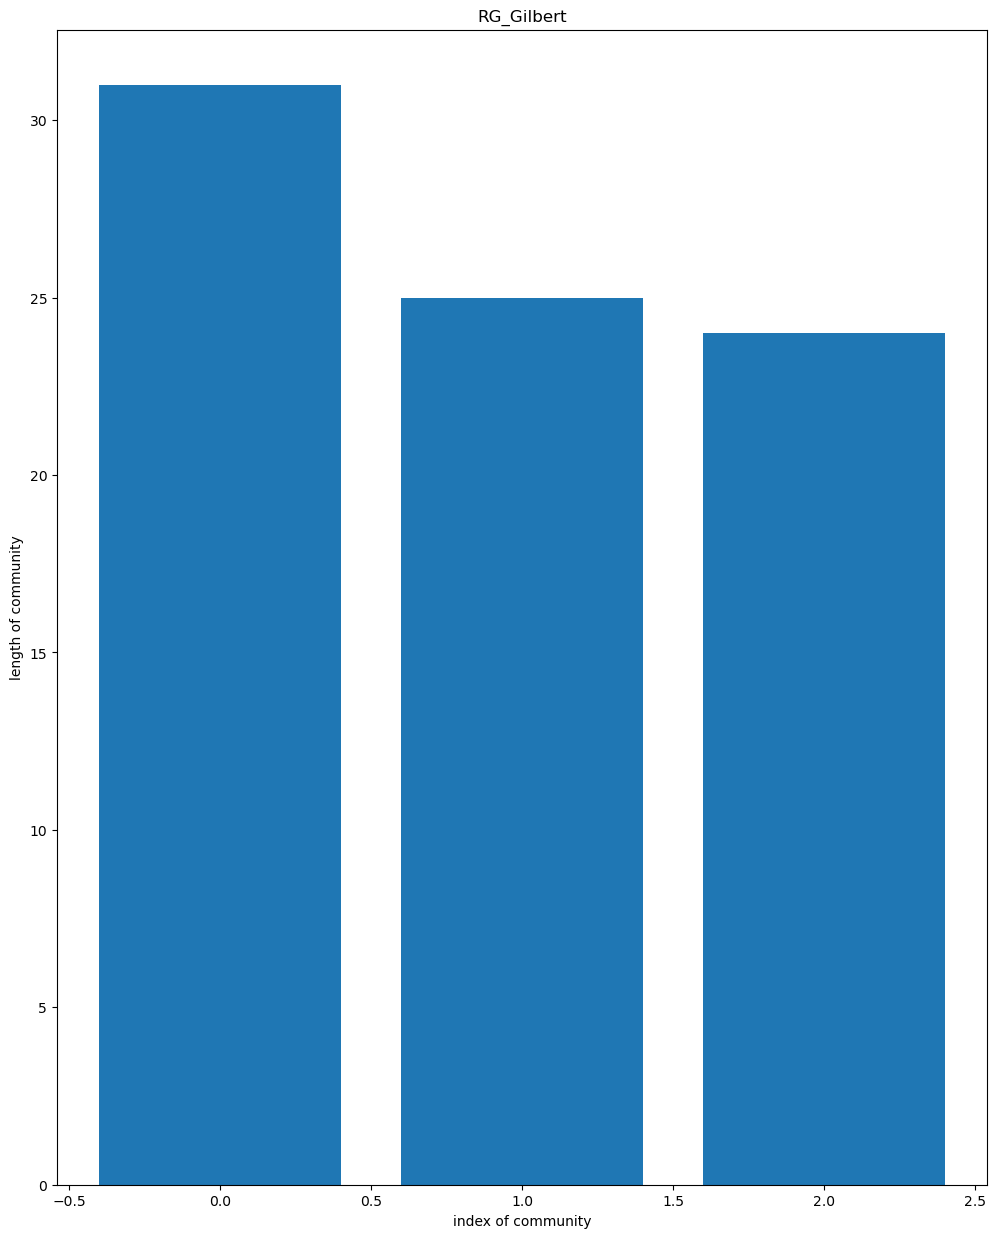

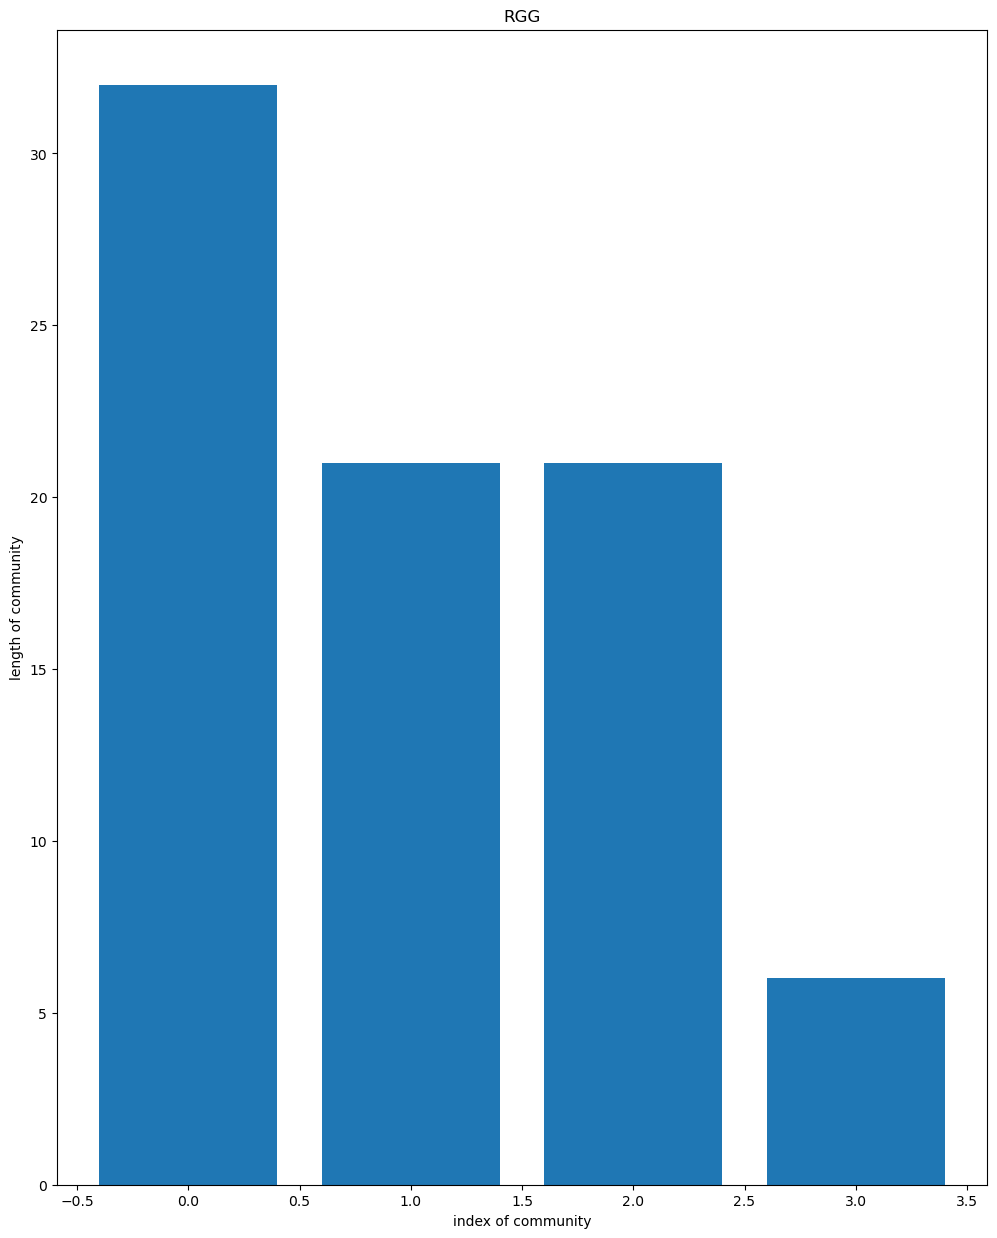

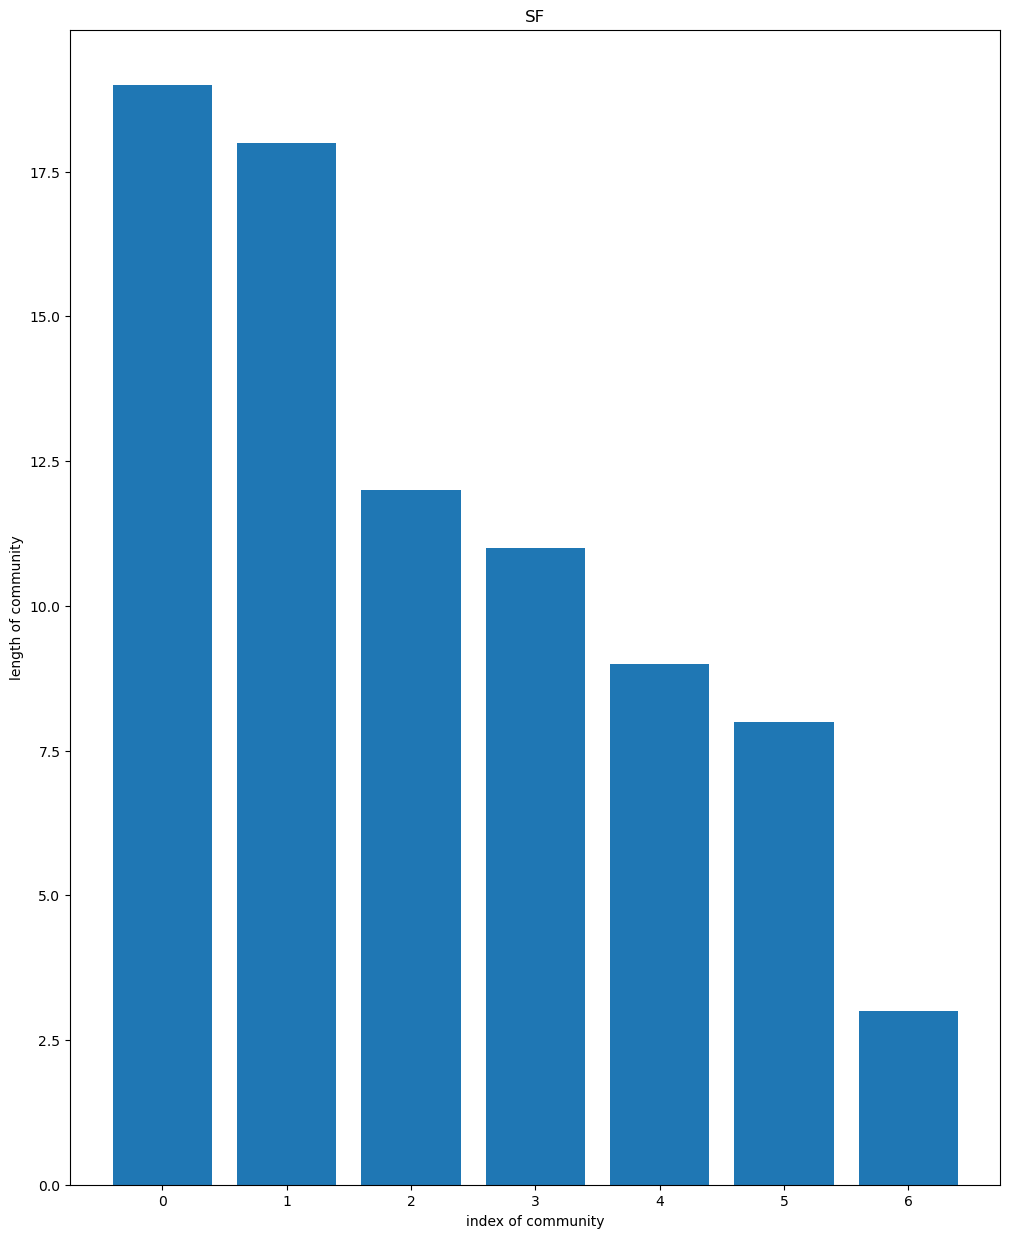

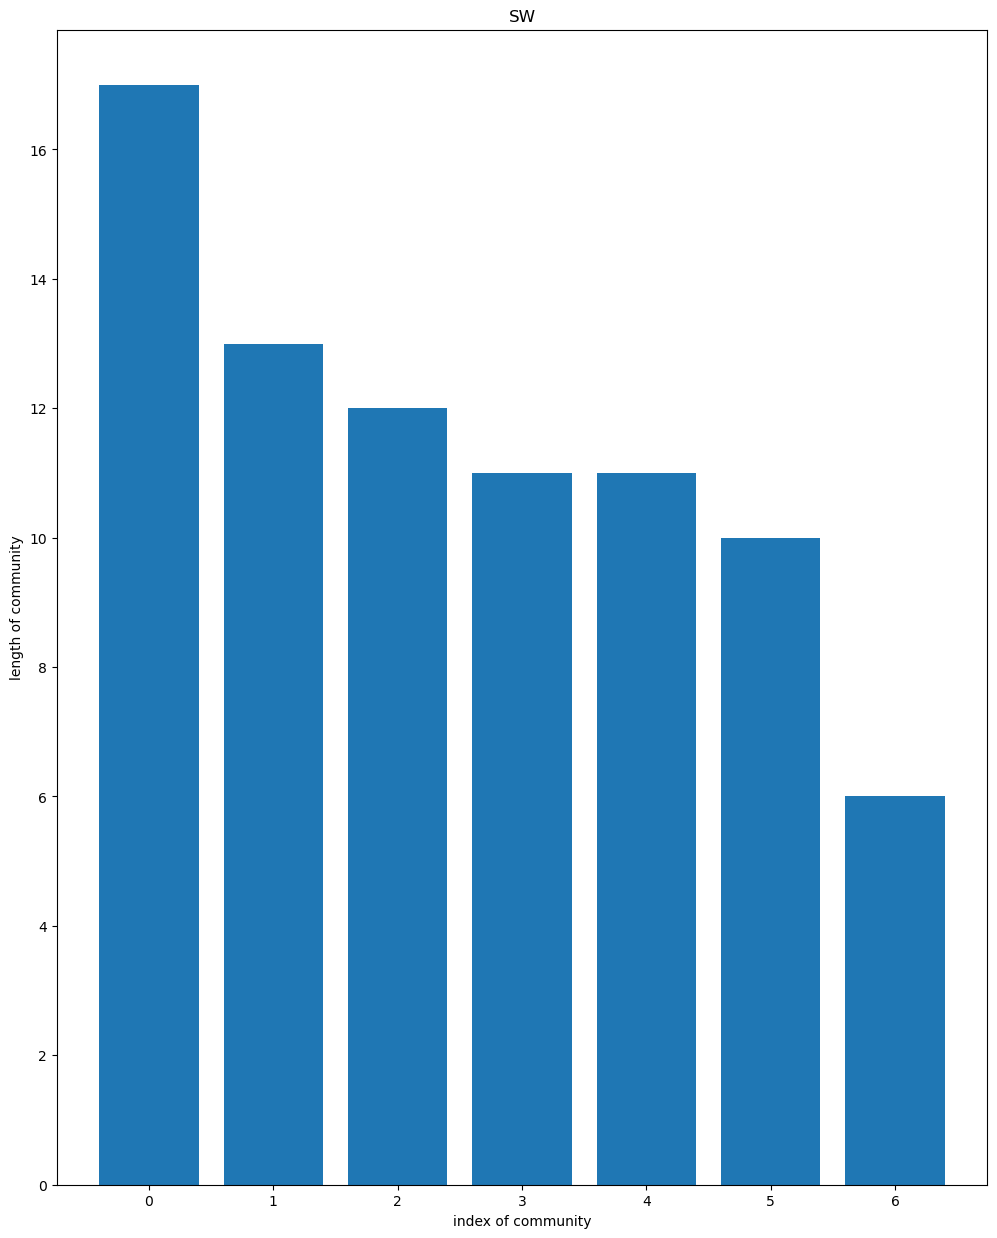

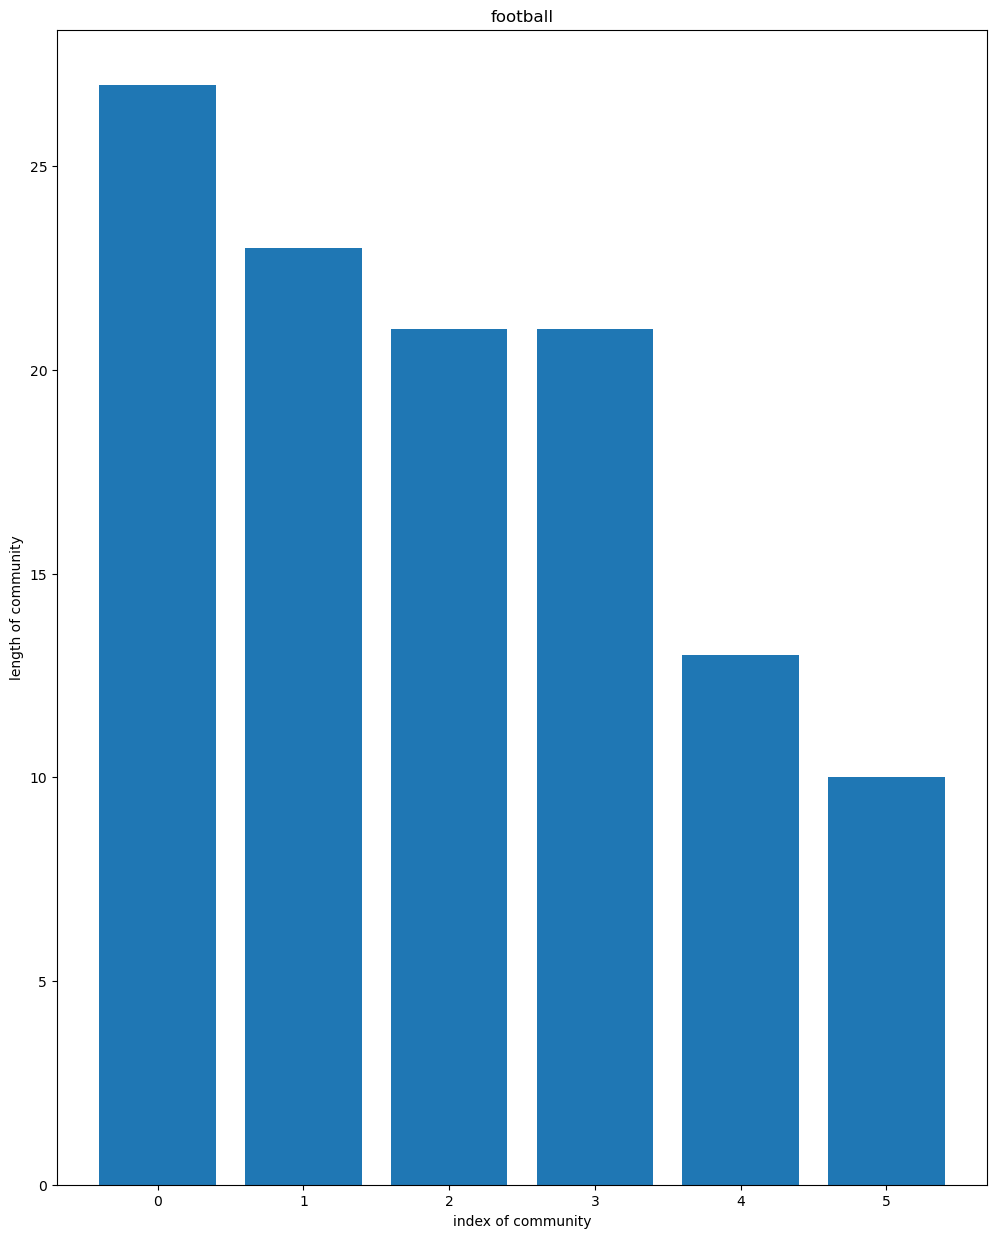

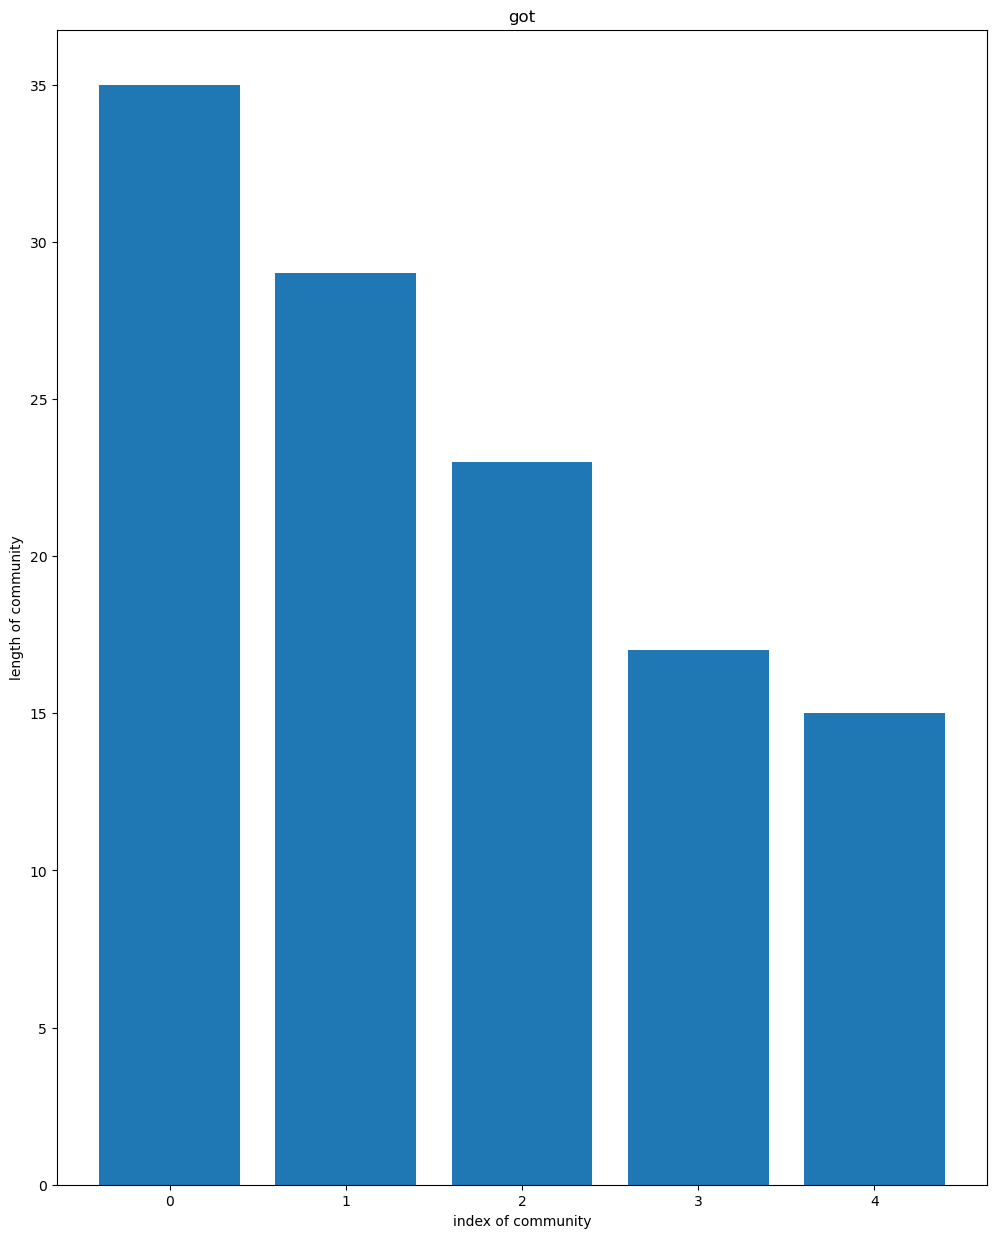

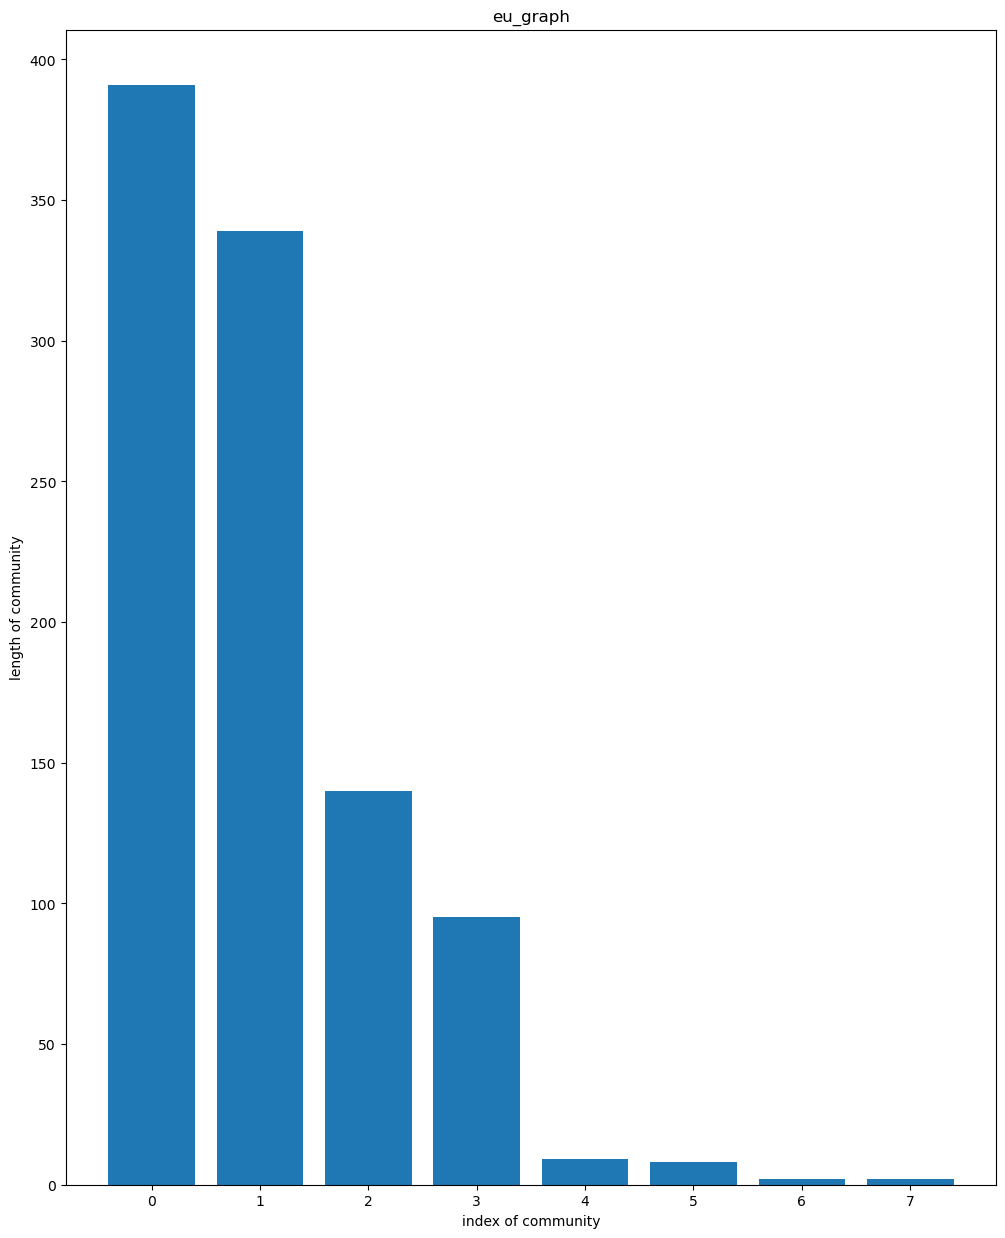

In [151]:
all_partitions2=[]
performances2=[]
modularities2=[]
total_partition_time2=[]
for i in range(0,len(names)):
    a=[]
    start_time=time.time()
    b=greedy_modularity_communities(graphs[i], weight=None, resolution=1)
    partition_time=time.time()-start_time
    total_partition_time2.append(partition_time)
    for j in range(0,len(b)):
        a.append(list(b[j]))
    all_partitions2.append(a)
    
for i in range(0,len(names)):
    modularities2.append(modularity(graphs[i],all_partitions2[i]))
    a=partition_quality(graphs[i],all_partitions2[i])
    performances2.append(a[1])
communities_length_for_maximum_partitions2=[]
for i in range(0,len(names)):
    length1=[]
    for j in range(0,len(all_partitions2[i])):
        length1.append(len(all_partitions2[i][j]))
    communities_length_for_maximum_partitions2.append(length1)
    plt.title(names[i])
    plt.xlabel("index of community")
    plt.ylabel("length of community")
    plt.bar(range(len(all_partitions2[i])),communities_length_for_maximum_partitions2[i])
    plt.show()

### Συνάρτηση οπτικοποιήσης 

In [152]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 15)})
def vis(G,partition):
    pos= nx.spring_layout(G)
    for j in range(0,len(partition)):
         nx.draw_networkx_nodes(G, pos, nodelist=partition[j],node_size=100, alpha=0.7,node_color=colors[j])
    nx.draw_networkx_edges(G,pos)
    ax = plt.gca()
    ax.margins(0.00)
    plt.axis("off")
    plt.show()

#### Οπτικοποίηση κοινοτήτων American College Football

In [ ]:
plt.title('newman-girvan_football')
vis(graphs[6],modularity_pick[6])

plt.title('spectral clustering_football')
vis(graphs[6],modularity_pick1[6])

plt.title('newman-girvan_football_performance')
vis(graphs[6],performance_pick[6])

plt.title('spectral clustering_football_performance')
vis(graphs[6],performance_pick1[6])

plt.title('greedy_football')
vis(graphs[6],all_partitions2[6])

### Σύγκριση αριθμού κοινοτήτων,χρόνου,modularity score και performance score ανά αλγόριθμο

In [153]:
print('newman_girvan')
print('max modularity score :',modularities[6][modularity_index[6]])
print('number of communities :',len(all_partitions[6][modularity_index[6]]))
print('max performance score :',performances[6][performance_index[6]])
print('number of communities:',len(all_partitions[6][performance_index[6]]))
print('total time :',total_time_per_graph[6])
print('\n')
print('spectral_clustering')
print('max modularity score :',modularities1[6][modularity_index1[6]])
print('number of communities :',len(eligible[6][modularity_index1[6]]))
print('max performance score :',performances1[6][performance_index1[6]])
print('number of communities :',len(eligible[6][performance_index1[6]]))
print('total time :',total_time_per_graph1[6])
print('\n')
print('greedy')
print('max modularity score :',modularities2[6])
print('performance :',performances2[6])
print('number of communities :',len(all_partitions2[6]))
print('total_time :',total_partition_time2[6])

newman_girvan
max modularity score : 0.5996290274077957
number of communities : 10
max performance score : 0.9581998474446987
number of communities: 17
total time : 7.789658546447754


spectral_clustering
max modularity score : 0.6022010863056824
number of communities : 11
max performance score : 0.9139588100686499
number of communities : 49
total time : 6.432458162307739


greedy
max modularity score : 0.5497406651426807
performance : 0.8681922196796339
number of communities : 6
total_time : 0.047937870025634766


#### Οπτικοποίηση κοινοτήτων Game of Thrones

In [ ]:
plt.title('newman-girvan_got')
vis(graphs[7],all_partitions[7][modularity_index[7]])

plt.title('spectral-clustering_got')
vis(graphs[7],eligible[7][modularity_index1[7]])

plt.title('newman-girvan_got_performance')
vis(graphs[7],all_partitions[7][performance_index[7]])

plt.title('spectral-clustering_got_perfomance')
vis(graphs[7],eligible[7][performance_index1[7]])

plt.title('greedy_got')
vis(graphs[7],all_partitions2[7])

### Σύγκριση αριθμού κοινοτήτων,χρόνου,modularity score και performance score ανά αλγόριθμο

In [154]:
print('newman_girvan')
print('max modularity score :',modularities[7][modularity_index[7]])
print('number of communities :',len(all_partitions[7][modularity_index[7]]))
print('max performance score :',performances[7][performance_index[7]])
print('number of communities:',len(all_partitions[7][performance_index[7]]))
print('total time :',total_time_per_graph[7])
print('\n')
print('spectral_clustering')
print('max modularity score :',modularities1[7][modularity_index1[7]])
print('number of communities :',len(eligible[7][modularity_index1[7]]))
print('max performance score :',performances1[7][performance_index1[7]])
print('number of communities :',len(eligible[7][performance_index1[7]]))
print('total time :',total_time_per_graph1[7])
print('\n')
print('greedy')
print('max modularity score :',modularities2[7])
print('performance :',performances2[7])
print('number of communities :',len(all_partitions2[7]))
print('total_time :',total_partition_time2[7])

newman_girvan
max modularity score : 0.6681205999387817
number of communities : 8
max performance score : 0.96425010682239
number of communities: 50
total time : 2.510784864425659


spectral_clustering
max modularity score : 0.665416794204673
number of communities : 7
max performance score : 0.9414613302948298
number of communities : 50
total time : 6.4981019496917725


greedy
max modularity score : 0.660477884909703
performance : 0.829796325309785
number of communities : 5
total_time : 0.031244993209838867


#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

In [ ]:
plt.title('newman-girvan_eu')
vis(graphs[8],all_partitions[8][modularity_index[8]])

plt.title('spectral-clustering_eu')
vis(graphs[8],eligible[8][modularity_index1[8]])

plt.title('newman-girvan_eu_performance')
vis(graphs[8],all_partitions[8][performance_index[8]])

plt.title('spectral-clustering_eu_performance')
vis(graphs[8],eligible[8][performance_index1[8]])

plt.title('greedy_eu')
vis(graphs[8],all_partitions2[8])

plt.title('ground-truth_eu')
vis(graphs[8],final_partition)

### Σύγκριση αριθμού κοινοτήτων,χρόνου,modularity score και performance score ανά αλγόριθμο

In [155]:
print('newman_girvan')
print('max modularity score :',modularities[8][modularity_index[8]])
print('number of communities :',len(all_partitions[8][modularity_index[8]]))
print('max performance score :',performances[8][performance_index[8]])
print('number of communities:',len(all_partitions[8][performance_index[8]]))
print('total time :',total_time_per_graph[8])
print('\n')
print('spectral_clustering')
print('max modularity score :',modularities1[8][modularity_index1[8]])
print('number of communities :',len(eligible[8][modularity_index1[8]]))
print('max performance score :',performances1[8][performance_index1[8]])
print('number of communities :',len(eligible[8][performance_index1[8]]))
print('total time :',total_time_per_graph1[8])
print('\n')
print('greedy')
print('max modularity score :',modularities2[8])
print('performance :',performances2[8])
print('number of communities :',len(all_partitions2[8]))
print('total_time :',total_partition_time2[8])
print('\n')
print('ground_truth')
print("modularity score :",mod)
print('performance score :',per[1])
print('number of communities :',len(final_partition))

newman_girvan
max modularity score : 0.0006218821799455388
number of communities : 2
max performance score : 0.13940548388093205
number of communities: 50
total time : 532.5794129371643


spectral_clustering
max modularity score : 0.3410479797071672
number of communities : 11
max performance score : 0.8256237065104355
number of communities : 49
total time : 20.671854972839355


greedy
max modularity score : 0.3471325650460906
performance : 0.7078716240565892
number of communities : 8
total_time : 4.08085560798645


ground_truth
modularity score : 0.2880131886237422
performance score : 0.9428136036490563
number of communities : 42


#### Οπτικοποίηση κοινοτήτων REG

In [ ]:
plt.title('newman-girvan_REG_modularity')
vis(graphs[0],all_partitions[0][modularity_index[0]])

plt.title('spectral clustering_REG_modularity')
vis(graphs[0],eligible[0][modularity_index1[0]])

plt.title('newman-girvan_REG_performance')
vis(graphs[0],all_partitions[0][performance_index[0]])

plt.title('spectral clustering_REG_performance')
vis(graphs[0],eligible[0][performance_index1[0]])

plt.title('greedy_REG')
vis(graphs[0],all_partitions2[0])

### Σύγκριση αριθμού κοινοτήτων,χρόνου,modularity score και performance score ανά αλγόριθμο

In [156]:
print('newman_girvan')
print('max modularity score :',modularities[0][modularity_index[0]])
print('number of communities :',len(all_partitions[0][modularity_index[0]]))
print('max performance score :',performances[0][performance_index[0]])
print('number of communities:',len(all_partitions[0][performance_index[0]]))
print('total time :',total_time_per_graph[0])
print('\n')
print('spectral_clustering')
print('max modularity score :',modularities1[0][modularity_index1[0]])
print('number of communities :',len(eligible[0][modularity_index1[0]]))
print('max performance score :',performances1[0][performance_index1[0]])
print('number of communities :',len(eligible[0][performance_index1[0]]))
print('total time :',total_time_per_graph1[0])
print('\n')
print('greedy')
print('max modularity score :',modularities2[0])
print('performance :',performances2[0])
print('number of communities :',len(all_partitions2[0]))
print('total_time :',total_partition_time2[0])

newman_girvan
max modularity score : 0.7249999999999999
number of communities : 8
max performance score : 0.9696202531645569
number of communities: 16
total time : 0.4609675407409668


spectral_clustering
max modularity score : 0.7253125
number of communities : 7
max performance score : 0.9579113924050633
number of communities : 50
total time : 5.274759292602539


greedy
max modularity score : 0.673125
performance : 0.8006329113924051
number of communities : 4
total_time : 0.011963605880737305


#### Οπτικοποίηση κοινοτήτων RGER

In [ ]:
plt.title('newman-girvan_RGER_modularity')
vis(graphs[1],all_partitions[1][modularity_index[1]])

plt.title('spectral clustering_RGER_modularity')
vis(graphs[1],eligible[1][modularity_index1[1]])

plt.title('newman-girvan_RGER_performance')
vis(graphs[1],all_partitions[1][performance_index[1]])

plt.title('spectral clustering_RGER_performance')
vis(graphs[1],eligible[1][performance_index1[1]])

plt.title('greedy_RGER')
vis(graphs[1],all_partitions2[1])

### Σύγκριση αριθμού κοινοτήτων,χρόνου,modularity score και performance score ανά αλγόριθμο

In [157]:
print('newman_girvan')
print('max modularity score :',modularities[1][modularity_index[1]])
print('number of communities :',len(all_partitions[1][modularity_index[1]]))
print('max performance score :',performances[1][performance_index[1]])
print('number of communities:',len(all_partitions[1][performance_index[1]]))
print('total time :',total_time_per_graph[1])
print('\n')
print('spectral_clustering')
print('max modularity score :',modularities1[1][modularity_index1[1]])
print('number of communities :',len(eligible[1][modularity_index1[1]]))
print('max performance score :',performances1[1][performance_index1[1]])
print('number of communities :',len(eligible[1][performance_index1[1]]))
print('total time :',total_time_per_graph1[1])
print('\n')
print('greedy')
print('max modularity score :',modularities2[1])
print('performance :',performances2[1])
print('number of communities :',len(all_partitions2[1]))
print('total_time :',total_partition_time2[1])

newman_girvan
max modularity score : 0.2193666666666667
number of communities : 23
max performance score : 0.920253164556962
number of communities: 35
total time : 3.121485948562622


spectral_clustering
max modularity score : 0.3027444444444444
number of communities : 5
max performance score : 0.9060126582278482
number of communities : 50
total time : 4.979414463043213


greedy
max modularity score : 0.31774444444444444
performance : 0.8319620253164557
number of communities : 6
total_time : 0.025940656661987305


#### Οπτικοποίηση κοινοτήτων RGG

In [ ]:
plt.title('newman-girvan_RGG_modularity')
vis(graphs[3],all_partitions[3][modularity_index[3]])

plt.title('spectral clustering_RGG_modularity')
vis(graphs[3],eligible[3][modularity_index1[3]])

plt.title('newman-girvan_RGG_performance')
vis(graphs[3],all_partitions[3][performance_index[3]])

plt.title('spectral clustering_RGG_performance')
vis(graphs[3],eligible[3][performance_index1[3]])

plt.title('greedy_RGG')
vis(graphs[3],all_partitions2[3])

### Σύγκριση αριθμού κοινοτήτων,χρόνου,modularity score και performance score ανά αλγόριθμο

In [158]:
print('newman_girvan')
print('max modularity score :',modularities[3][modularity_index[3]])
print('number of communities :',len(all_partitions[3][modularity_index[3]]))
print('max performance score :',performances[3][performance_index[3]])
print('number of communities:',len(all_partitions[3][performance_index[3]]))
print('total time :',total_time_per_graph[3])
print('\n')
print('spectral_clustering')
print('max modularity score :',modularities1[3][modularity_index1[3]])
print('number of communities :',len(eligible[3][modularity_index1[3]]))
print('max performance score :',performances1[3][performance_index1[3]])
print('number of communities :',len(eligible[3][performance_index1[3]]))
print('total time :',total_time_per_graph1[3])
print('\n')
print('greedy')
print('max modularity score :',modularities2[3])
print('performance :',performances2[3])
print('number of communities :',len(all_partitions2[3]))
print('total_time :',total_partition_time2[3])

newman_girvan
max modularity score : 0.538760259217718
number of communities : 7
max performance score : 0.9240506329113924
number of communities: 19
total time : 3.155758857727051


spectral_clustering
max modularity score : 0.534046805177233
number of communities : 7
max performance score : 0.8648734177215189
number of communities : 46
total time : 4.967926502227783


greedy
max modularity score : 0.5186245971977426
performance : 0.8129746835443038
number of communities : 4
total_time : 0.02393960952758789


#### Οπτικοποίηση κοινοτήτων SW

In [ ]:
plt.title('newman-girvan_SW_modularity')
vis(graphs[4],all_partitions[4][modularity_index[4]])

plt.title('spectral clustering_SW_modularity')
vis(graphs[4],eligible[4][modularity_index1[4]])

plt.title('newman-girvan_SW_performance')
vis(graphs[4],all_partitions[4][performance_index[4]])

plt.title('spectral clustering_SW_performance')
vis(graphs[4],eligible[4][performance_index1[4]])


plt.title('greedy_SW')
vis(graphs[4],all_partitions2[4])

### Σύγκριση αριθμού κοινοτήτων,χρόνου,modularity score και performance score ανά αλγόριθμο

In [159]:
print('newman_girvan')
print('max modularity score :',modularities[4][modularity_index[4]])
print('number of communities :',len(all_partitions[4][modularity_index[4]]))
print('max performance score :',performances[4][performance_index[4]])
print('number of communities:',len(all_partitions[4][performance_index[4]]))
print('total time :',total_time_per_graph[4])
print('\n')
print('spectral_clustering')
print('max modularity score :',modularities1[4][modularity_index1[4]])
print('number of communities :',len(eligible[4][modularity_index1[4]]))
print('max performance score :',performances1[4][performance_index1[4]])
print('number of communities :',len(eligible[4][performance_index1[4]]))
print('total time :',total_time_per_graph1[4])
print('\n')
print('greedy')
print('max modularity score :',modularities2[4])
print('performance :',performances2[4])
print('number of communities :',len(all_partitions2[4]))
print('total_time :',total_partition_time2[4])

newman_girvan
max modularity score : 0.22739027873961215
number of communities : 8
max performance score : 0.9174050632911392
number of communities: 37
total time : 3.4403538703918457


spectral_clustering
max modularity score : 0.2515365304709141
number of communities : 8
max performance score : 0.8518987341772152
number of communities : 50
total time : 5.533862352371216


greedy
max modularity score : 0.2731615737534626
performance : 0.830379746835443
number of communities : 7
total_time : 0.012078285217285156


#### Οπτικοποίηση κοινοτήτων SF

In [ ]:
plt.title('newman-girvan_SF')
vis(graphs[5],all_partitions[5][modularity_index[5]])

plt.title('spectral clustering_SF')
vis(graphs[5],eligible[5][modularity_index1[5]])

plt.title('newman-girvan_SF_performance')
vis(graphs[5],all_partitions[5][performance_index[5]])

plt.title('spectral clustering_SF_performance')
vis(graphs[5],eligible[5][performance_index1[5]])


plt.title('greedy_SF')
vis(graphs[5],all_partitions2[5])

### Σύγκριση αριθμού κοινοτήτων,χρόνου,modularity score και performance score ανά αλγόριθμο

In [160]:
print('newman_girvan')
print('max modularity score :',modularities[5][modularity_index[5]])
print('number of communities :',len(all_partitions[5][modularity_index[5]]))
print('max performance score :',performances[5][performance_index[5]])
print('number of communities:',len(all_partitions[5][performance_index[5]]))
print('total time :',total_time_per_graph[5])
print('\n')
print('spectral_clustering')
print('max modularity score :',modularities1[5][modularity_index1[5]])
print('number of communities :',len(eligible[5][modularity_index1[5]]))
print('max performance score :',performances1[5][performance_index1[5]])
print('number of communities :',len(eligible[5][performance_index1[5]]))
print('total time :',total_time_per_graph1[5])
print('\n')
print('greedy')
print('max modularity score :',modularities2[5])
print('performance :',performances2[5])
print('number of communities :',len(all_partitions2[5]))
print('total_time :',total_partition_time2[5])

newman_girvan
max modularity score : 0.5228710937500001
number of communities : 8
max performance score : 0.9639240506329114
number of communities: 30
total time : 0.8722889423370361


spectral_clustering
max modularity score : 0.51638671875
number of communities : 10
max performance score : 0.9582278481012658
number of communities : 48
total time : 6.035099983215332


greedy
max modularity score : 0.5280859375
performance : 0.8759493670886076
number of communities : 7
total_time : 0.015645980834960938
